<a href="https://colab.research.google.com/github/Beastwham/Learning-Projects/blob/main/EDA%20-%20Credit%20Case%20Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 1000)

In [5]:
#Download application_data.csv
!gdown "19aXRf7N68ZLyibpG4fVGg3hwZY9N6HeA&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=19aXRf7N68ZLyibpG4fVGg3hwZY9N6HeA&confirm=t
To: /content/application_data.csv
100% 166M/166M [00:04<00:00, 36.3MB/s]


# application_data.csv

### Approach:

#### Columns Removed:
    •FLAG_DOCUMENT columns were removed as in most of the cases all of the documents except document 3 were missing. Whether document 3 was submitted or not didn’t have any impact on the target variable.
    •AMT_REQ columns were removed as they indicate number of requests made to credit bureau. They do not have any link to the target variable.
    •WEEKDAY_APPR and HOUR_APPR columns were removed as they indicate on which day and at which hour did the application process start.
    •Columns with more than 45% null values were removed as due to a lot of missing data, these wouldn’t have been useful. These columns were primarily related to housing.
#### Missing Value Imputation:
    •EXT_SOURCE_3: No outliers present, therefore missing values were imputed using mean
    •EXT_SOURCE_2: No outliers present, therefore missing values were imputed using mean
    •Social Circle Columns: Data seemed to have some values beyond the IQR, thus median was used to impute missing values
    •AMT_GOODS_PRICE: Data seemed to have some values beyond the IQR, thus median was used to impute missing values
#### Column Manipulation:
    •DAYS Columns were converted into YEARS.
    •YEARS_BIRTH was further transformed into AGE_BUCKET by binning.
    •YEARS_REGISTRATION and YEARS_ID_PUBLISH columns didn’t make sense as median was close to 10 years. Why would anyone change their registration or change the identity document 10 years before applying for the loan? These columns were dropped.
    •YEARS_EMPLOYED had some values of 1000.65 years. These were imputed using median values of their respective age bucket categories, i.e., if an applicant was in the age bucket of 20-30 then the median value of YEARS_EMPLOYED for that age bucket was used for imputation. A single value could not have been used as that would’ve skewed the results.
    •YEARS_EMPLOYED was further transformed into EMPLOYED_BUCKET by binning.
    •ORGANIZATION_TYPE was used to create another variable ORGANIZATION_GROUP in which sub-category variables such as Industry: type 7 would all fall under the same bracket Industry.
    •AMT_INCOME_TOTAL was used to create INCOME_GROUP by binning.


### Results of the Analysis:
    •The data is highly imbalanced as only 8% of total applicants are defaulters, rest of the 92% are non-defaulters.
    •Income Type trends show that applicants who are unemployed or on maternity leave have extremely high default rates as compared to those who are working or are pensioners.
    •Education Type trends show that applicants with lower secondary or secondary education have higher default rates and that default rates decrease with how educated an applicant is.
    •Housing Type trends show that applicants who live with parents or in a rented apartment have higher default rates.
    •Occupation Type trends show applicants such as low-skill laborers or drivers, security staff have higher default rates.
    •Organization Group trends show that applicants who are working in cleaning, construction, agriculture, restaurant, realtor industries or are self employed have higher default rates.
    •Age Bucket trends show that default rate decreases with increase in age. 20-30 bucket has the highest default rate of 11.45%.
    •Employed Bucket trends show that default rate decreases with increase in time spent at current job. 0-10 bucket has the highest default rate of 8.64%.


In [6]:
appdata = pd.read_csv('application_data.csv')
appdata.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loans           F           

In [7]:
appdata.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## Dropping unwanted columns

All documents except Document 3 are missing in most of the cases and whether document 3 was submitted or not doesn't seem to have any impact on target variable, therefore all of the FLAG_DOCUMENT columns can be removed


AMT_REQ Columns indicate number of requests made to credit bureau. They won't impact our analysis and thus, can be removed.

WEEKDAY_APPR AND HOUR_APPR columns indicate on which day and at which hour did the application process start. They won't impact our analysis and thus, can be removed

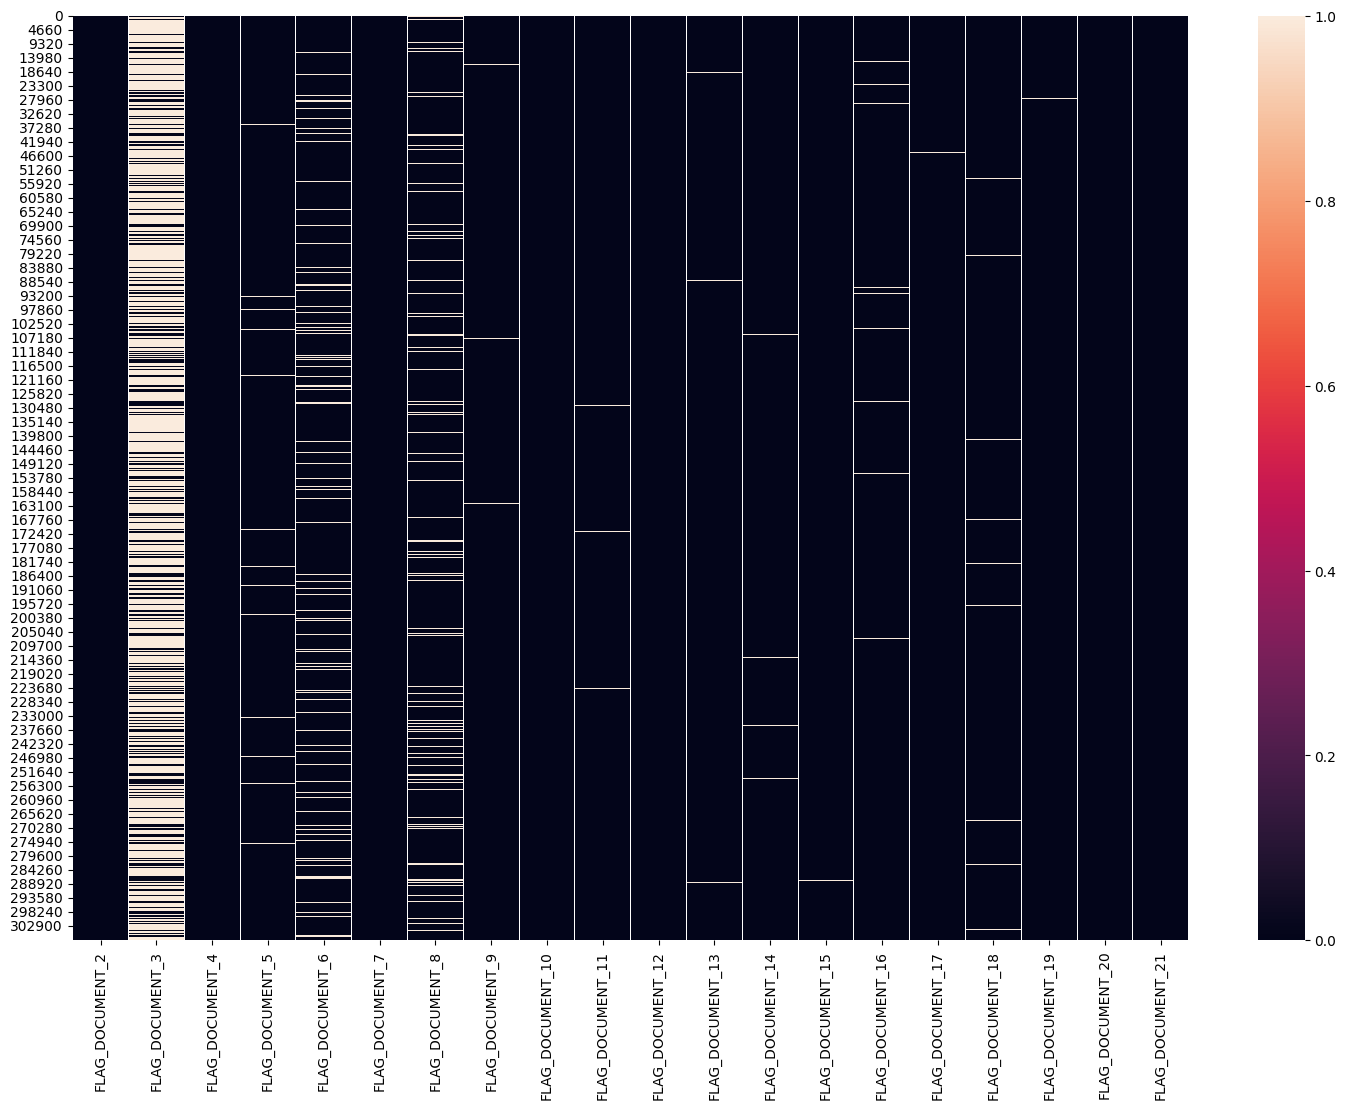

In [8]:
#Flag Document Columns
plt.figure(figsize=(18,12))
sns.heatmap(appdata.iloc[:,96:116])
plt.show()

Text(0.5, 1.0, 'Document 3 Not Submitted -> Non-Defaulters vs Defaulters')

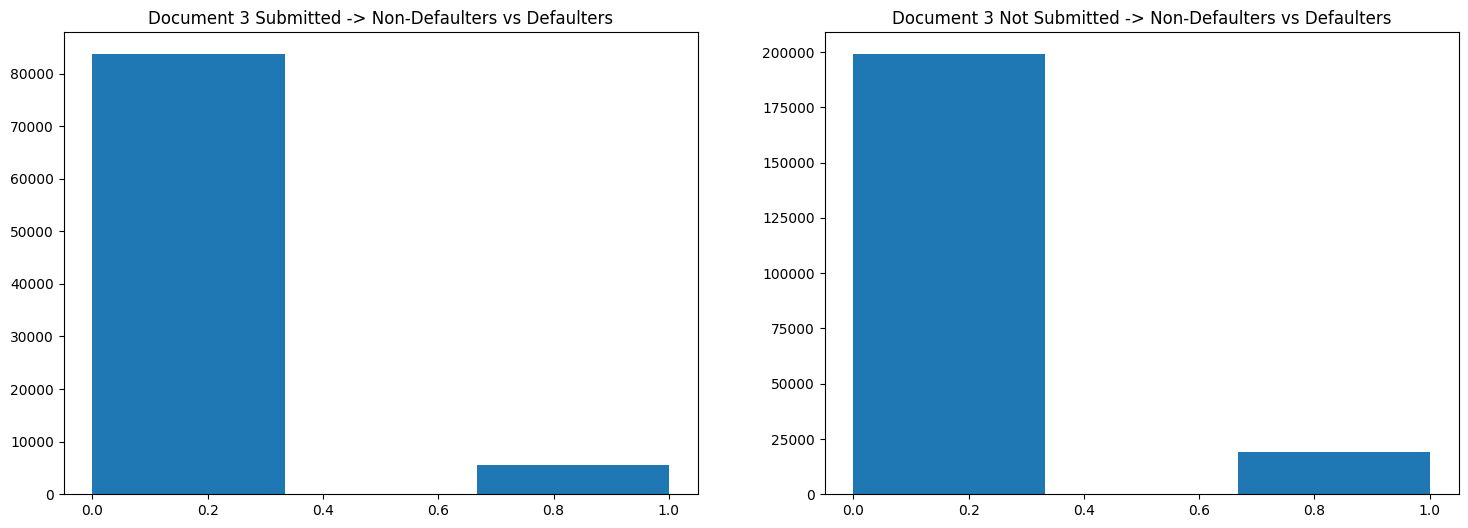

In [9]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (18,6))

ax[0].hist(appdata[appdata["FLAG_DOCUMENT_3"] == 0]["TARGET"], bins = 3)
ax[0].set_title('Document 3 Submitted -> Non-Defaulters vs Defaulters')

ax[1].hist(appdata[appdata["FLAG_DOCUMENT_3"] == 1]["TARGET"], bins = 3)
ax[1].set_title('Document 3 Not Submitted -> Non-Defaulters vs Defaulters')

All documents except Document 3 are missing in most of the cases and whether document 3 was submitted or not doesn't seem to have any impact on target variable, therefore all of these columns can be removed

In [10]:
for i in range(2,22):
    appdata.drop('FLAG_DOCUMENT_'+str(i), inplace = True, axis = 1)

In [11]:
#AMT_REQ Columns
appdata.drop(["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_QRT" , "AMT_REQ_CREDIT_BUREAU_MON" , "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY" , "AMT_REQ_CREDIT_BUREAU_HOUR"], inplace = True, axis = 1)

In [12]:
#WEEKDAY_APPR and HOUR_APPR
appdata.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'], axis = 1, inplace = True)

## Missing Values

Columns with more than 45% missing values have been dropped

In [13]:
#What percent of total values are missing?
x = round(100*appdata.isnull().sum()/appdata.shape[0], 2).sort_values(ascending = False)
x

COMMONAREA_MODE                 69.87
COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_AVG               55.18
NONLIVINGAREA_MODE              55.18
NONLIVINGARE

In [14]:
#Dropping Columns with more than 45% Null values
appdata.drop(list(x[x>45].index),inplace = True, axis = 1)

In [15]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [16]:
x = round(100*appdata.isnull().sum()/appdata.shape[0], 2).sort_values(ascending = False)
x

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
NAME_TYPE_SUITE                 0.42
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
REG_REGION_NOT_WORK_REGION      0.00
FLAG_EMAIL                      0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
SK_ID_CURR                      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_LIVE_CITY          0.00
REG_CITY_NOT_WORK_CITY          0.00
FLAG_CONT_MOBILE                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
ORGANIZATION_TYPE               0.00
FLAG_PHONE                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
NAME_INCOME_TYPE                0.00
NAME_CONTRACT_TYPE              0.00
C

### Imputing Missing Values

In [17]:
#Creating a new category unknown for null values in OCCUPATION_TYPE
appdata.OCCUPATION_TYPE[appdata.OCCUPATION_TYPE.isnull()] = 'unknown'

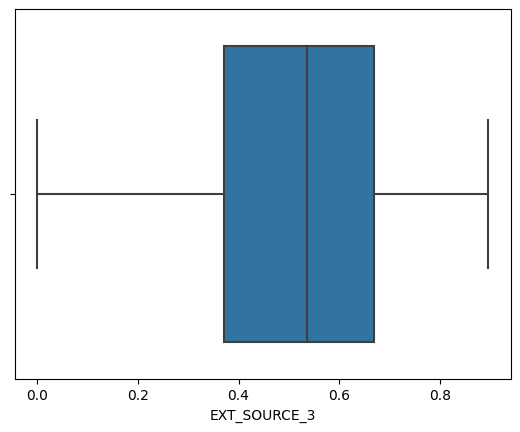

In [18]:
#EXT_SOURCE_3
sns.boxplot(appdata.EXT_SOURCE_3)
plt.show()

In [19]:
#No outliers, therefore we can impute using mean
appdata.EXT_SOURCE_3[appdata.EXT_SOURCE_3.isnull()] = appdata.EXT_SOURCE_3.mean()

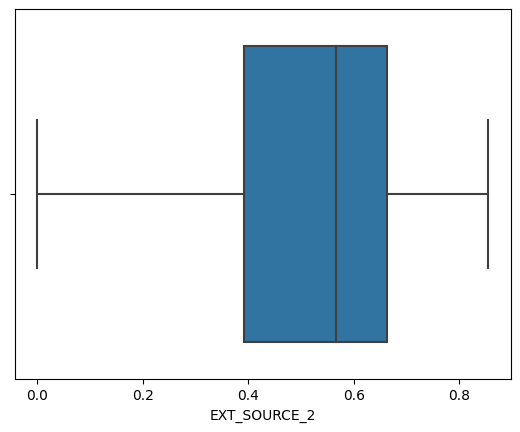

In [20]:
#EXT_SOURCE_2
sns.boxplot(appdata.EXT_SOURCE_2)
plt.show()

In [21]:
#No outliers, therefore we can impute using mean
appdata.EXT_SOURCE_2[appdata.EXT_SOURCE_2.isnull()] = appdata.EXT_SOURCE_2.mean()

In [22]:
#NAME_TYPE_SUITE
appdata['NAME_TYPE_SUITE'].fillna(appdata['NAME_TYPE_SUITE'].mode()[0], inplace = True)

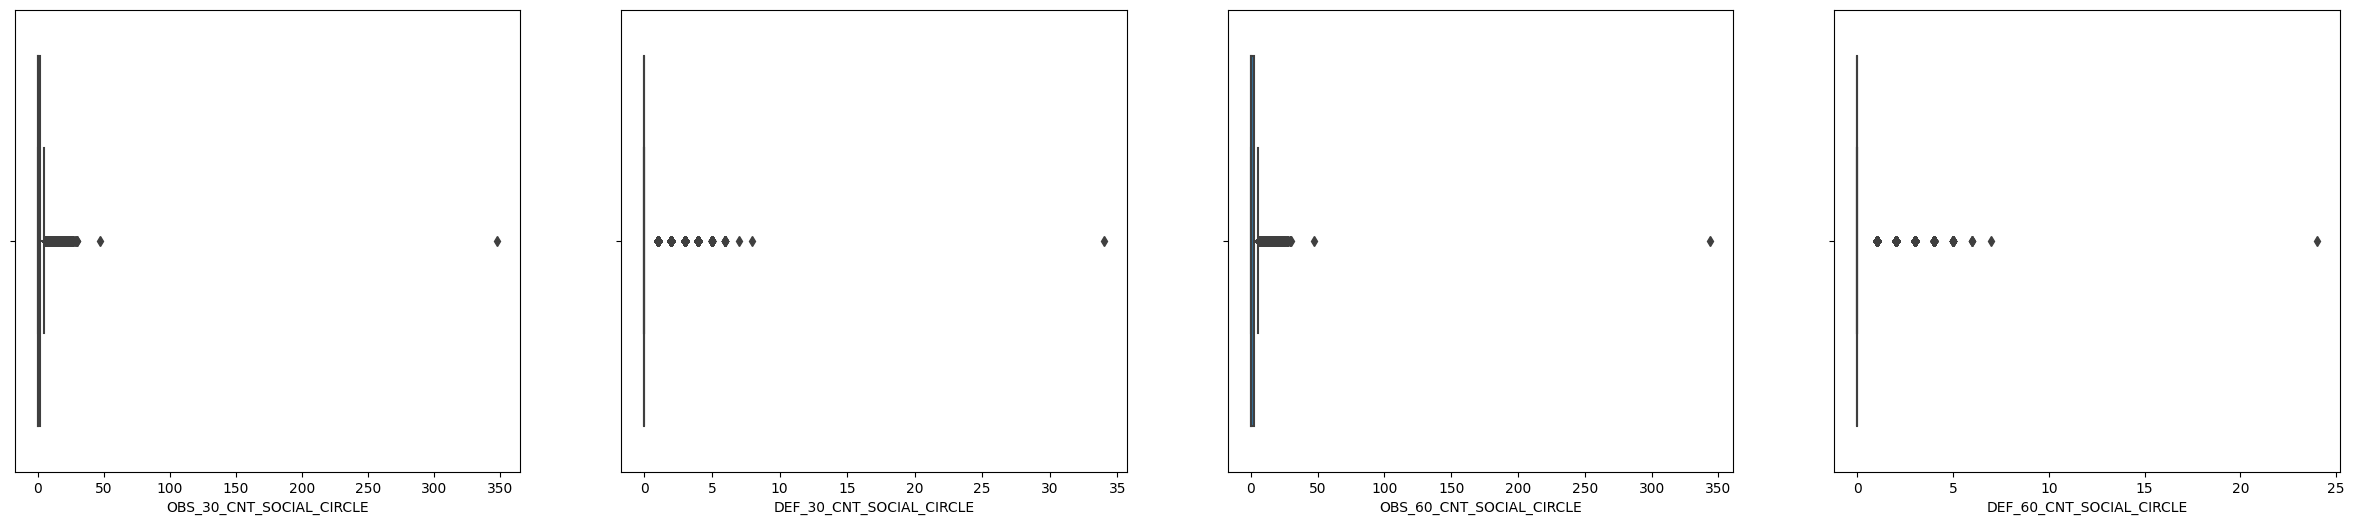

In [23]:
#Social Circle Columns
fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize = (30,6))

sns.boxplot(appdata.OBS_30_CNT_SOCIAL_CIRCLE, ax = ax[0])
sns.boxplot(appdata.DEF_30_CNT_SOCIAL_CIRCLE, ax = ax[1])
sns.boxplot(appdata.OBS_60_CNT_SOCIAL_CIRCLE, ax = ax[2])
sns.boxplot(appdata.DEF_60_CNT_SOCIAL_CIRCLE, ax = ax[3])

plt.show()

In [24]:
#Outliers are present in all of them, therefore we'll impute using median
appdata.OBS_30_CNT_SOCIAL_CIRCLE[appdata.OBS_30_CNT_SOCIAL_CIRCLE.isnull()] = appdata.OBS_30_CNT_SOCIAL_CIRCLE.median()
appdata.DEF_30_CNT_SOCIAL_CIRCLE[appdata.DEF_30_CNT_SOCIAL_CIRCLE.isnull()] = appdata.DEF_30_CNT_SOCIAL_CIRCLE.median()
appdata.OBS_60_CNT_SOCIAL_CIRCLE[appdata.OBS_60_CNT_SOCIAL_CIRCLE.isnull()] = appdata.OBS_60_CNT_SOCIAL_CIRCLE.median()
appdata.DEF_60_CNT_SOCIAL_CIRCLE[appdata.DEF_60_CNT_SOCIAL_CIRCLE.isnull()] = appdata.DEF_60_CNT_SOCIAL_CIRCLE.median()

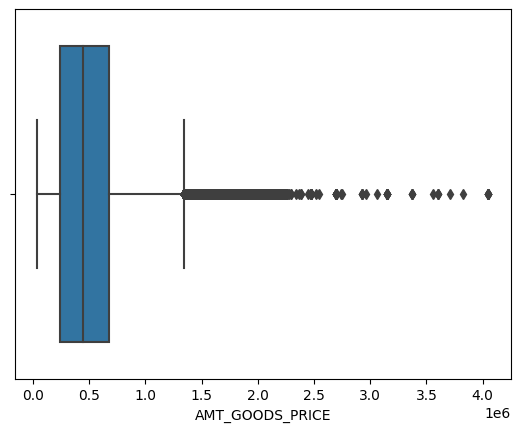

In [25]:
#AMT_GOODS_PRICE
sns.boxplot(appdata.AMT_GOODS_PRICE)
plt.show()

In [26]:
#Outliers are present. We'll impute using median
appdata.AMT_GOODS_PRICE[appdata.AMT_GOODS_PRICE.isnull()] = appdata.AMT_GOODS_PRICE.median()

In [27]:
x = round(100*appdata.isnull().sum()/appdata.shape[0], 2).sort_values(ascending = False)
x

SK_ID_CURR                     0.0
FLAG_WORK_PHONE                0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
FLAG_CONT_MOBILE               0.0
FLAG_EMP_PHONE                 0.0
TARGET                         0.0
FLAG_MOBIL                     0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY     

## Fixing Columns

DAYS Columns: We'll be converting these into YEARS and bin them into buckets

    YEARS_REGISTRATION and YEARS_ID_PUBLISH don't make sense as why would anyone change their registration or change the Identity document around 10 years (close to median) before the application. We'll drop these columns as we can't use them for our analysis

    YEARS_EMPLOYED has outliers. Nobody can be employed for 1000 years before applying for the loan. We'll impute them using median of their respective age bucket categories
    
Organization Type: Too many categories, therefore we'll convert them into organization groups for better categorical analysis

Amount Income Total: We'll bin this into Very Low, Low, Medium, High and Very high

In [28]:
appdata['YEARS_BIRTH'] = abs(appdata['DAYS_BIRTH']/365)
appdata['YEARS_EMPLOYED'] = abs(appdata['DAYS_EMPLOYED']/365)
appdata['YEARS_REGISTRATION'] = abs(appdata['DAYS_REGISTRATION']/365)
appdata['YEARS_ID_PUBLISH'] = abs(appdata['DAYS_ID_PUBLISH']/365)

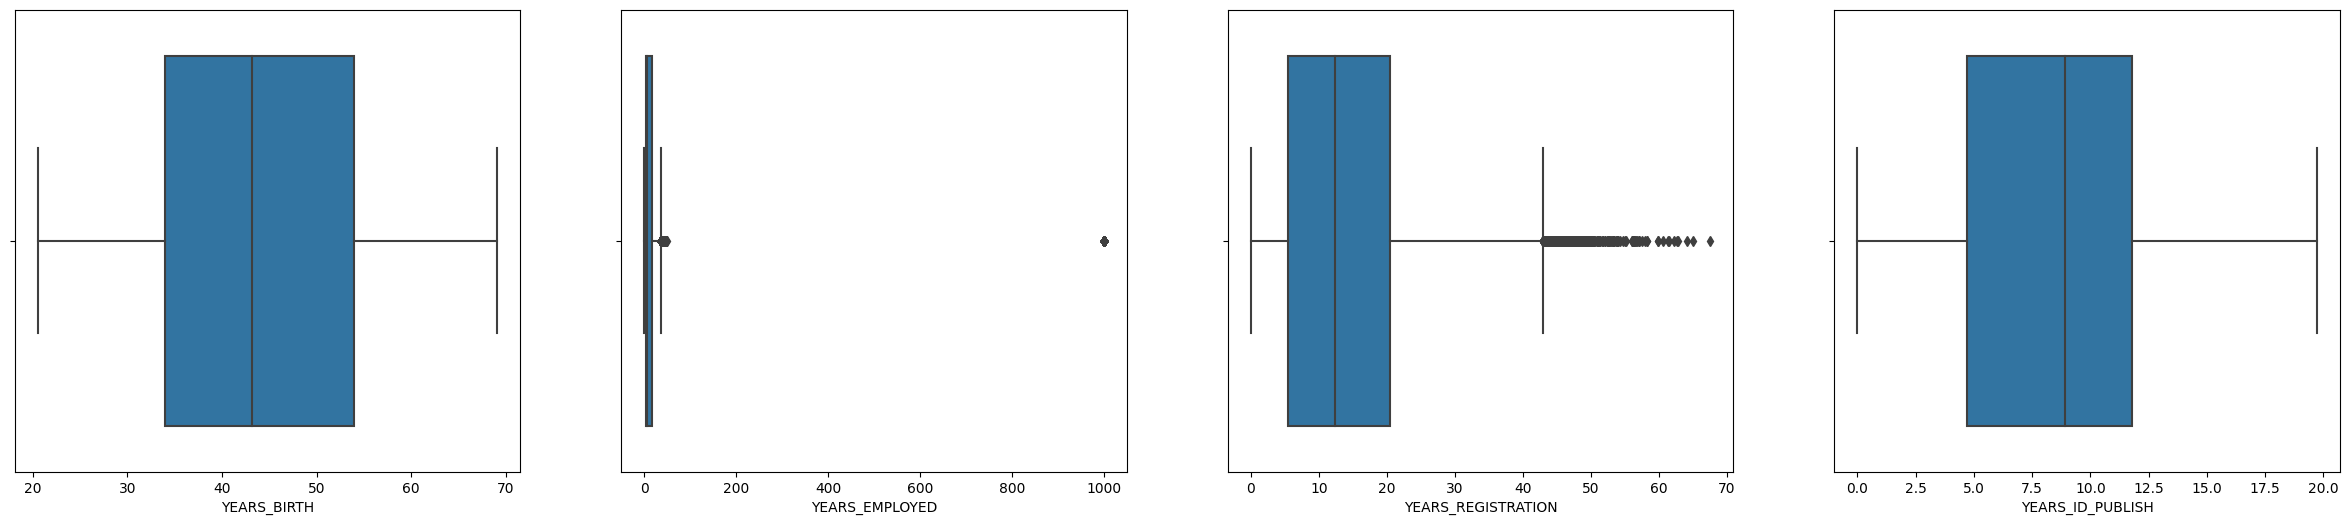

In [29]:
#Checking for outliers
fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize = (30,6))

sns.boxplot(appdata.YEARS_BIRTH, ax = ax[0])
sns.boxplot(appdata.YEARS_EMPLOYED, ax = ax[1])
sns.boxplot(appdata.YEARS_REGISTRATION, ax = ax[2])
sns.boxplot(appdata.YEARS_ID_PUBLISH, ax = ax[3])

plt.show()

In [30]:
appdata['AGE_BUCKET'] = pd.cut(appdata.YEARS_BIRTH, [20,30,40,50,60,70,80], labels =["20-30", '30-40', '40-50', '50-60', '60-70', '70+'])

In [31]:
appdata.YEARS_EMPLOYED.describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: YEARS_EMPLOYED, dtype: float64

In [32]:
appdata[appdata.YEARS_EMPLOYED>1000]['AGE_BUCKET'].value_counts()

60-70    29578
50-60    23335
40-50     1823
30-40      502
20-30      136
70+          0
Name: AGE_BUCKET, dtype: int64

In [33]:
agebucketforimputation = appdata[appdata.YEARS_EMPLOYED<1000].groupby('AGE_BUCKET')['YEARS_EMPLOYED'].agg(['mean', 'median'])
agebucketforimputation

mean    median
AGE_BUCKET                     
20-30        3.170565  2.632877
30-40        5.518226  4.375342
40-50        7.520699  5.550685
50-60        9.421997  6.613699
60-70       11.642625  7.909589
70+               NaN       NaN

In [34]:
l = appdata[appdata.YEARS_EMPLOYED>1000][['SK_ID_CURR', 'AGE_BUCKET', 'YEARS_EMPLOYED']].index
for i in l:
    appdata.iloc[i, 46] = agebucketforimputation.loc[appdata.iloc[i, 49], 'median']

In [35]:
#Seems about right now
appdata.YEARS_EMPLOYED.describe()

count    307511.000000
mean          6.659617
std           5.817123
min           0.000000
25%           2.556164
50%           5.917808
75%           7.909589
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

In [36]:
appdata['EMPLOYED_BUCKET'] = pd.cut(appdata.YEARS_EMPLOYED, [0,10,20,30,40,50], labels =["0-10", '10-20', '20-30', '30-40', '40-50'])

In [37]:
#ORGANIZATION_TYPE
appdata.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [38]:
def organization_group(x):
    if 'Entity' in x:
        return (x.split('Entity')[0].strip())
    elif ':' in x:
        return (x.split(':')[0].strip())
    else:
        return x
    
appdata['ORGANIZATION_GROUP'] = appdata.ORGANIZATION_TYPE.apply(organization_group)

In [39]:
#AMT_INCOME_TOTAL
appdata['INCOME_GROUP'] = pd.qcut(appdata['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

## Analysis

### Data Imbalance
Only 8% of total data represents those applicants who defaulted

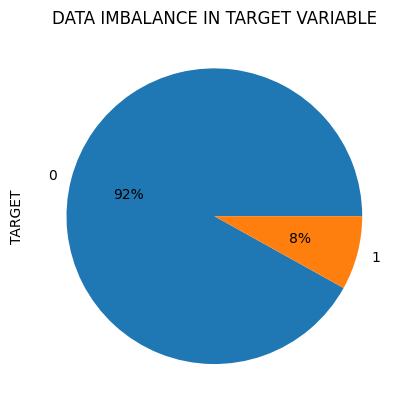

In [40]:
plt.title('DATA IMBALANCE IN TARGET VARIABLE')
appdata.TARGET.value_counts(normalize = True).plot.pie(autopct = "%1.0f%%")
plt.show()

### Defining Functions for analysis

Categorical Variable Analysis

    We've used countplot to show us how data is distributed across different categories. Data is further seperated into Target = 0 and Target = 1
    
    Horizontal bar plot has been used along with groupby function to see which category has higher default rates
    
Continuous Variable Analysis
    
    We've used a distribution plot to show us how different distribution is for Target = 0 and Target = 1

We've used columns description file as well. While plotting the graph, these functions also print description of the column which makes it easy to interpret

In [42]:
#Downloading columns_description.csv
!gdown "1ZAsB0Q1oikA7swQBEUP_bgG7iZb1Vpvi&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ZAsB0Q1oikA7swQBEUP_bgG7iZb1Vpvi&confirm=t
To: /content/columns_description.csv
100% 28.3k/28.3k [00:00<00:00, 27.4MB/s]


In [43]:
columns_description = pd.read_csv('columns_description.csv', encoding = 'cp1252')

In [44]:
def categorical_analysis(df, name):
    
    
    
    print(" Plotting the Distribution for "+str(name))
    try:
        print("Description -> "+(column_description[(column_description.Row == name) & (column_description.Table == 'application_data')]['Description'].iloc[0]))
    except:
        None
    print()
    
    plt.figure(figsize = (18,6))
    sns.countplot(x = name, hue = 'TARGET', data = df)
    plt.title("Distribution of "+name)
    plt.xticks(rotation = 90)

    plt.show()
    print()

    plt.figure(figsize = (18,6))
    df.groupby(name)['TARGET'].mean().plot.barh()
    plt.title("Defaulter Percentage as per different categories of "+name)
    plt.show()
    
    print()
    
    print(df.groupby(name)['TARGET'].mean()*100)
    
    print()
    
def continuous_analysis(df, name):
    try:
        print("Description -> "+(column_description[(column_description.Row == name) & (column_description.Table == 'application_data')]['Description'].iloc[0]))
    except:
        None
    
    print()

    plt.figure(figsize = (18,8))
    sns.distplot(df[df['TARGET']==0][name], label = "Target = 0")
    sns.distplot(df[df['TARGET']==1][name], label = "Target = 1")
    plt.title(" Distribution of "+name+" According to the Target")
    
    plt.legend()

    plt.show()

In [45]:
categorical_variables = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",                         
                        "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE",
                        "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "CNT_FAM_MEMBERS", "CNT_CHILDREN",
                        "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", 
                        "LIVE_CITY_NOT_WORK_CITY", 'ORGANIZATION_GROUP', "AGE_BUCKET", "EMPLOYED_BUCKET", "INCOME_GROUP"]

continuous_variables = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY",
                        "DAYS_LAST_PHONE_CHANGE","EXT_SOURCE_2","EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE",
                        "DEF_60_CNT_SOCIAL_CIRCLE"]

### Categorical Analysis

#### Inferences: 

•	NAME_CONTRACT_TYPE - Cash Loan or Revolving Loan

    o	Most of the loans are cash loans
    
    o	Cash loans have a higher default rate than Revolving loans 
    
•	Gender

    o	Female applicants are more than male applicants
    
    o	Defaulter percentage is higher for male applicants 
    
•	Own Car

    o	Most of the applicants do not own cars
    
    o	Applicants who do not own cars have a slightly higher default rate 
    
•	Own Reality

    o	Most of the applicants do not own realty
    
    o	Applicants who do not own realty have a slightly higher default rate 
    
•	Name_Type_Suite – Who was accompanying the client when he was applying for loan

    o	Most of the applicants went unaccompanied
    
    o	Applicants who were accompanied by Others (Other_B, Other_A) and a group of people had a slightly higher default rate
    
•	Income Type

    o	Most of the applicants are working professionals
    
    o	Applicants on Maternity leave and unemployed applicants have the highest percentage of defaulter
    
    o	Businessmen and Students have the lowest defaulter percentages, however, their numbers are very few in the dataset to contribute to in the analysis
    
•	Education Type

    o	Most of the applicants have completed secondary education
    
    o	Applicants with lower secondary education have the highest default rate
    
•	Family Status of the client

    o	Most applicants are married 
    
    o	Single or applicants in a civil marriage have higher default rates
    
•	Housing Type

    o	Most of the applicants have an apartment
    
    o	Applicants who live with parents or have a rented apartment have considerably higher default rate as compared to others
    
•	Occupation Type

    o	Most of the applicants, apart from those who didn’t specify their occupation type, are laborers.
    
    o	Low-skill laborers have a very high default rate (17%) as compared to other types
    
•	Flag Mobile - Most clients provided mobile number. This column is of not much use to us

•	Flag EMP_PHONE - Most clients provided work phone. This column is of not much use to us

•	Flag Work phone - Most clients did not provide home phone. This column is of not much use to us


•	Flag CONT_MOBILE - Most client’s mobile phone was reachable. This column is of not much use to us

•	FLAG Phone - Most clients did not provide home phone. This column is of not much use to us

•	Flag Email - Most clients did not provide email. This column is of not much use to us

•	Count of Children – Most of the applicants have no children. Values for children more than 4 are very less

•	Count of Family members – Most of the applicants live in families of 2. Values for family members more than 5 are very less

    •	Even though applicants with relatively a greater number of children and/or family members have higher default rates, we can’t derive any pattern from this as number of such applicants is very less

•	Most of the clients’ permanent address matches their contact address. For a very small percentage of applicants, it does not. Their default rate is considerably high.

•	of the clients’ permanent address matches their work address. For a very small percentage of applicants, it does not. Their default rate is considerably high.

•	Most of the applicants’ contact address and work address is in the same city. For a very small percentage of applicants, it is not. Their default rate is considerably high.

•	Region Rating, Region rating with city – Mostly 2. However, this column is not of much use to us as most of the data is centered around rating ‘2’ and thus we can’t decipher a pattern from 
it.

•	Organization Group

    o	Most of the applicants are involved in business or are self employed

    o	Default rates are highest (>10%) for those who are involved in the following sectors: Restaurants, Self-employed, realtor, construction, cleaning, agriculture

•	Income Group
    
    o	Most of the applicants fall into medium income group
    
    o	Default rate for medium income group is the highest
    
    o	Default rate for very high- and high-income groups is the lowest
       
    o	Default rate for very low-income group is lower than low-income group which is lower than medium income group

•	AGE_BUCKET
    
    o	People between the age of 20-30 have highest default rates. Default rates decrease with age.

•	EMPLOYED_BUCKET
    
    o	Most of the applicants started current employment 0-5 years before applying for the loan and such applicants have highest, and considerably higher default rates



 Plotting the Distribution for NAME_CONTRACT_TYPE



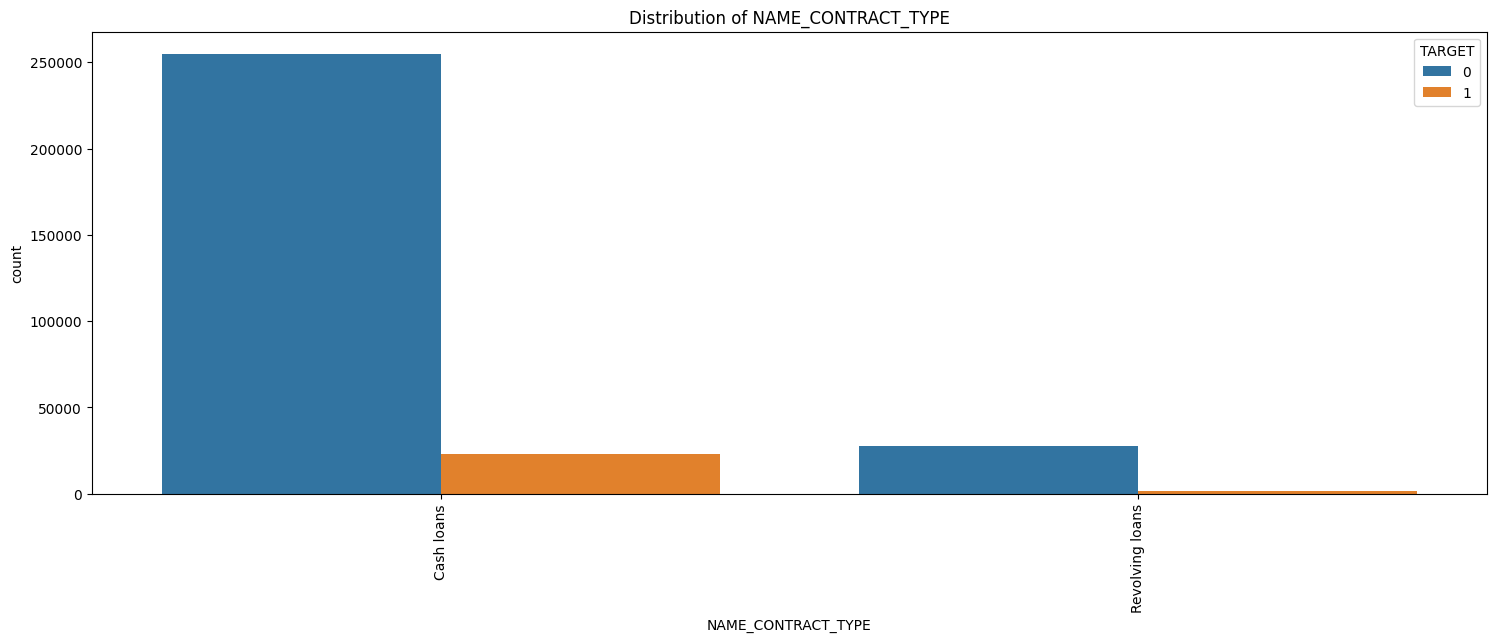

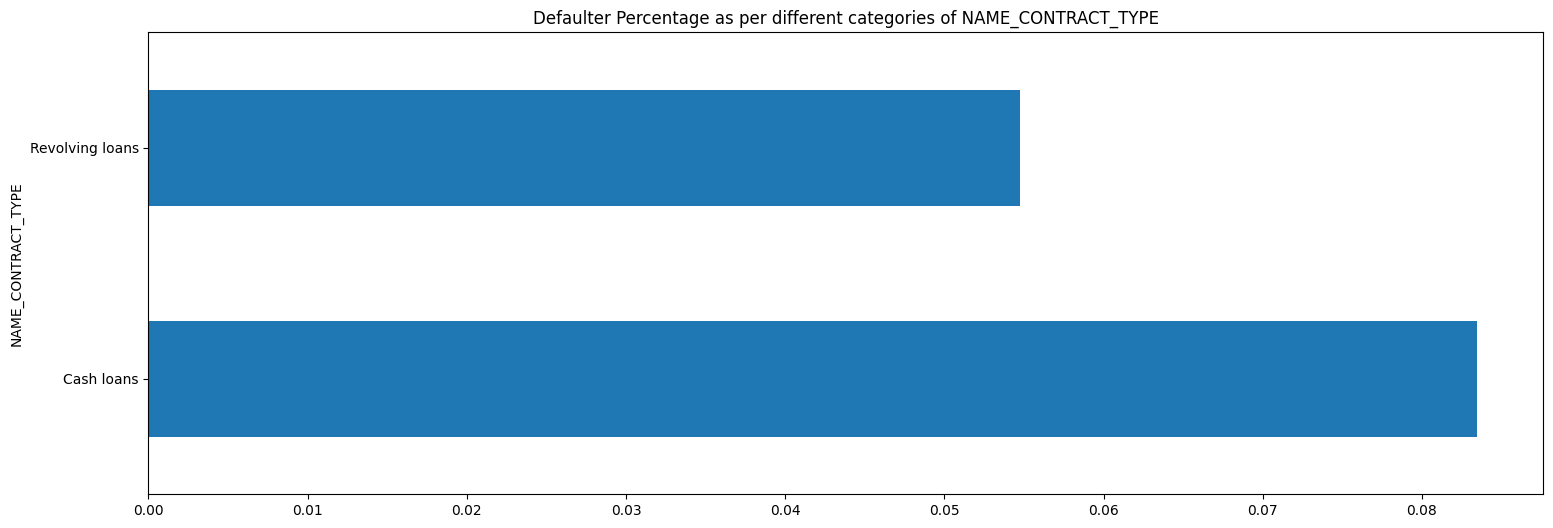


NAME_CONTRACT_TYPE
Cash loans         8.345913
Revolving loans    5.478329
Name: TARGET, dtype: float64

 Plotting the Distribution for CODE_GENDER



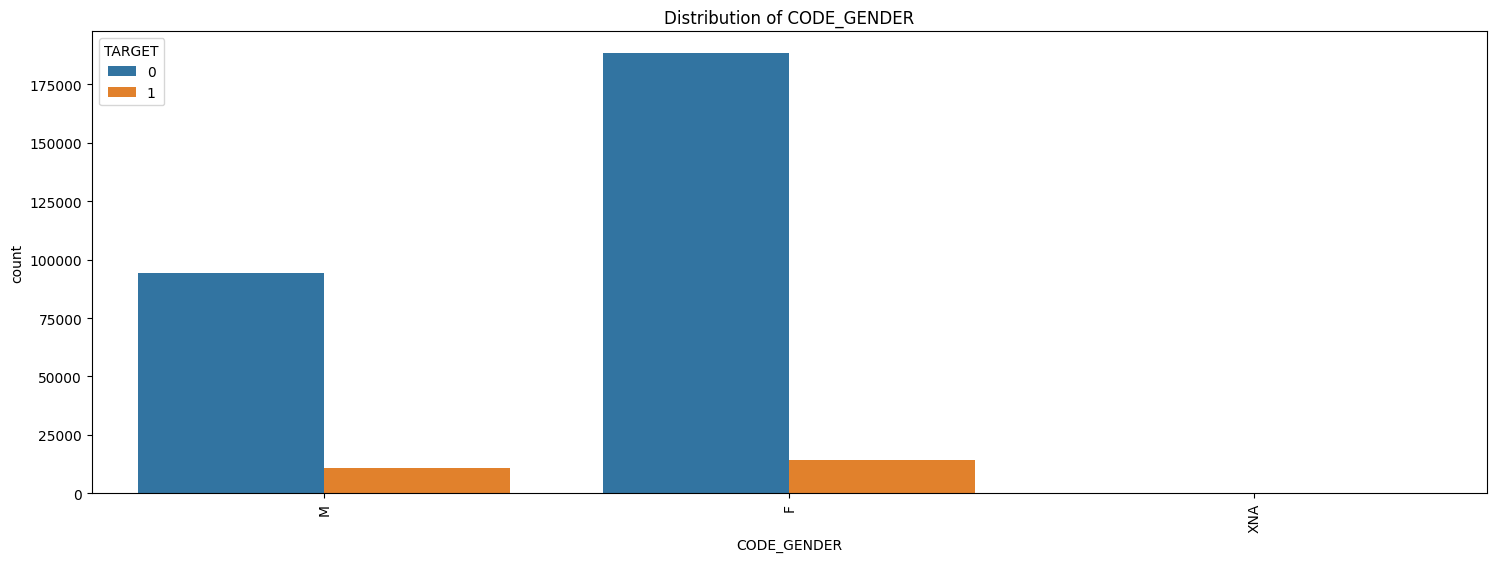

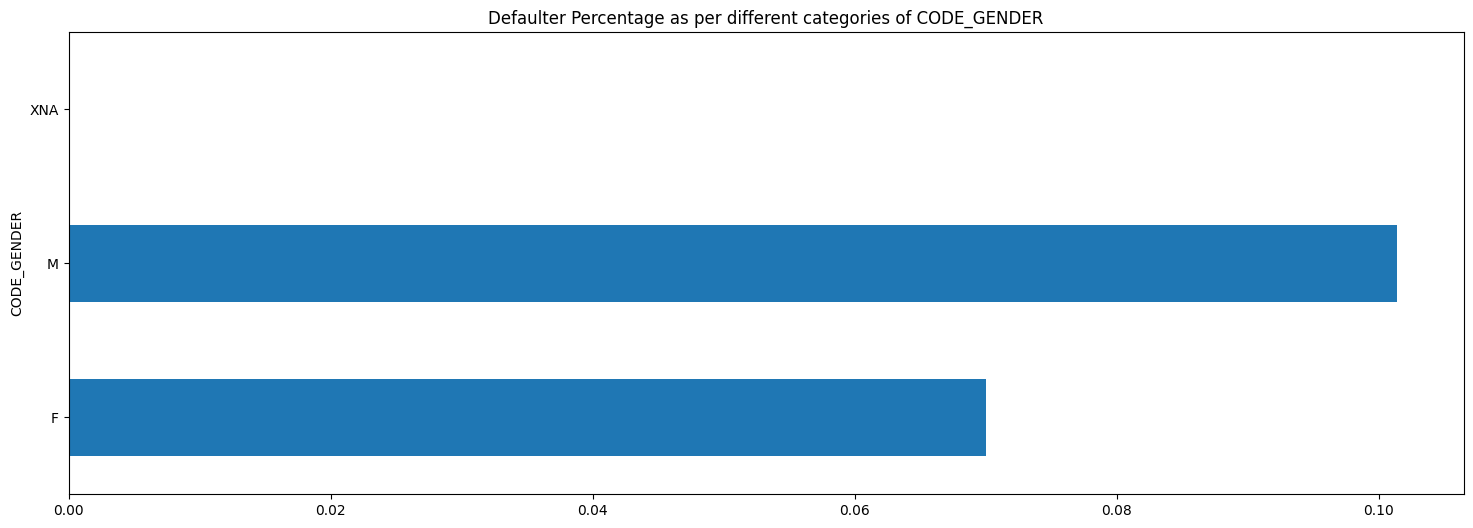


CODE_GENDER
F       6.999328
M      10.141920
XNA     0.000000
Name: TARGET, dtype: float64

 Plotting the Distribution for FLAG_OWN_CAR



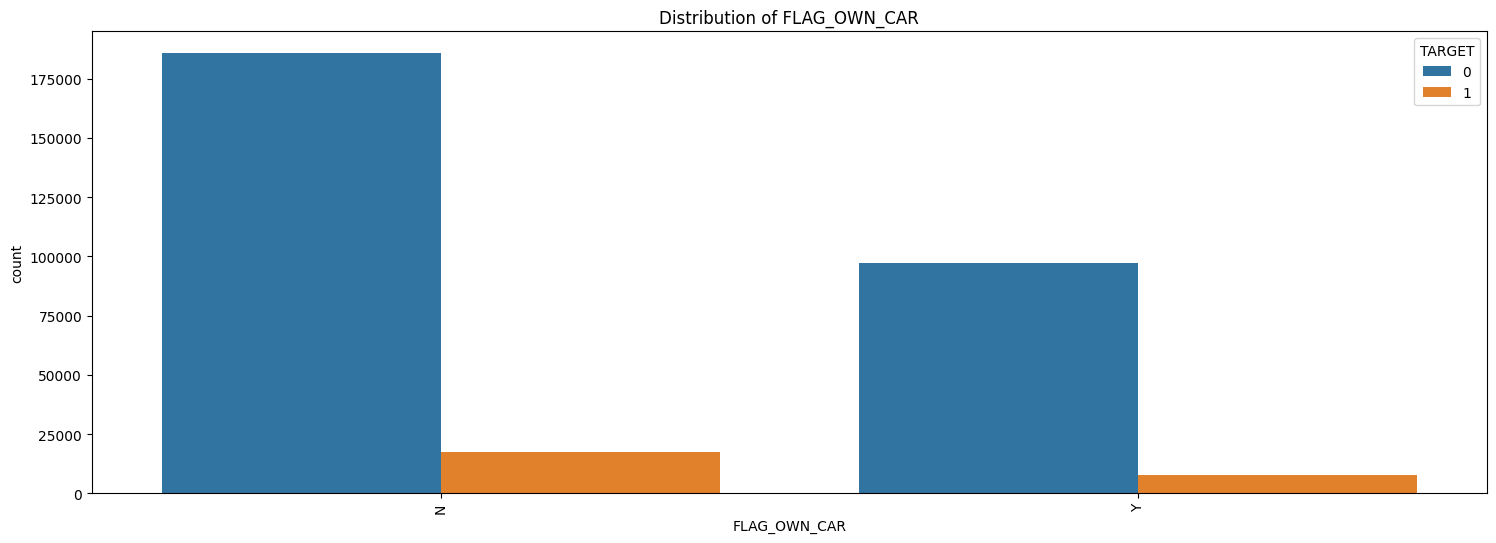

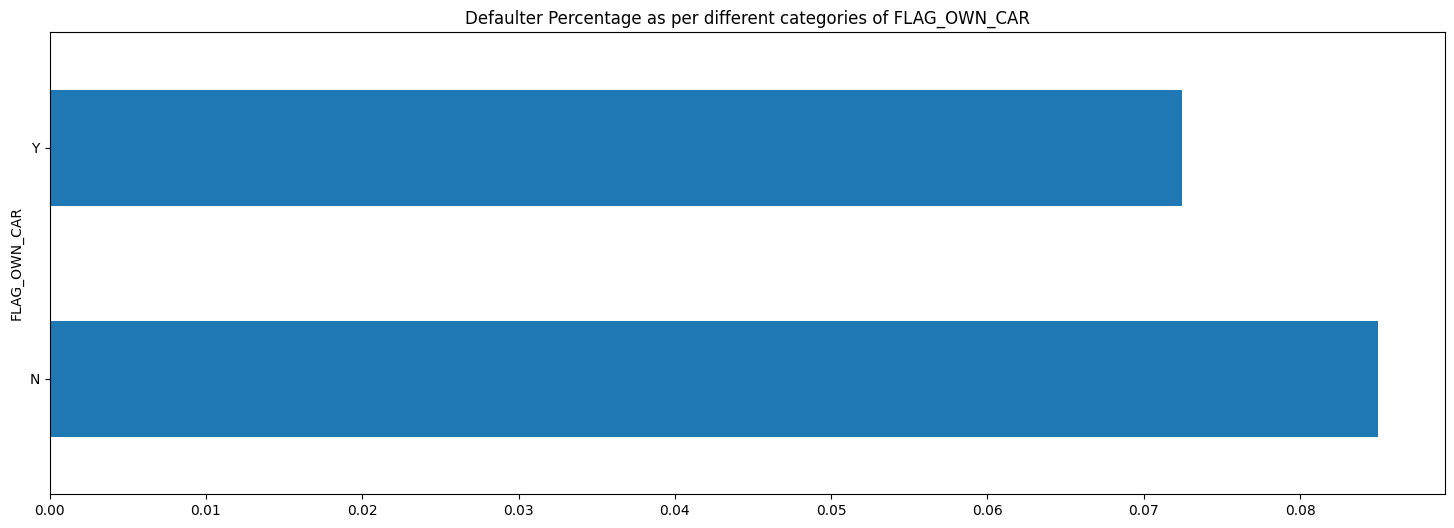


FLAG_OWN_CAR
N    8.500227
Y    7.243730
Name: TARGET, dtype: float64

 Plotting the Distribution for FLAG_OWN_REALTY



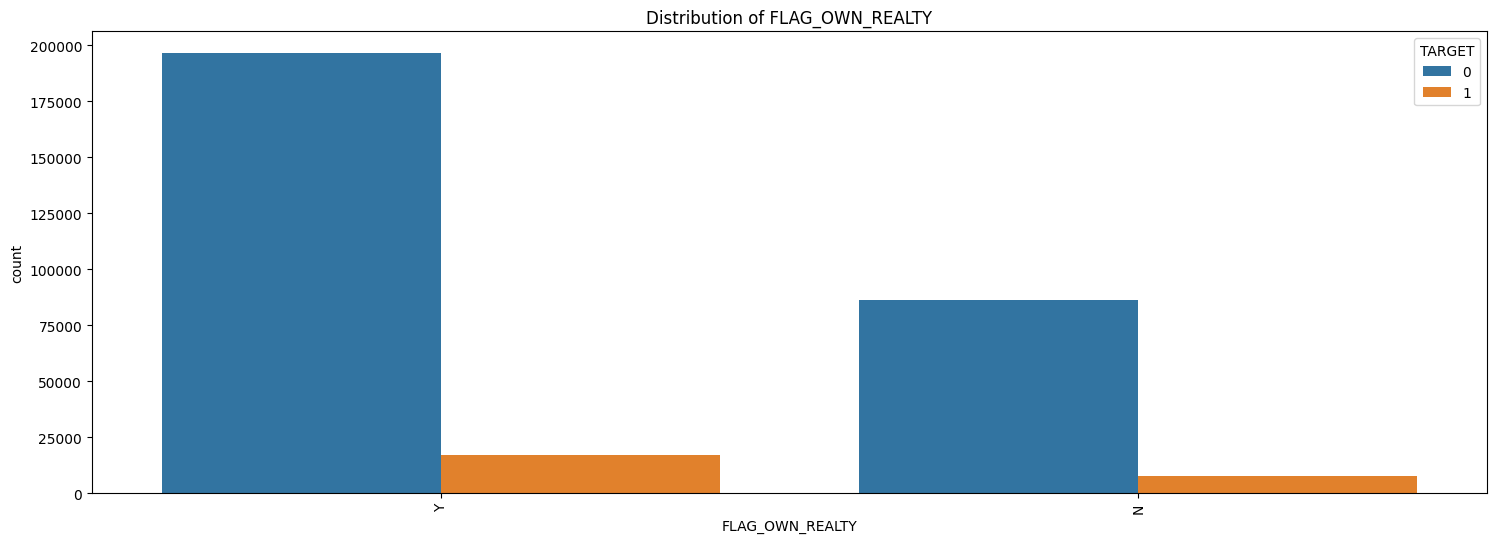

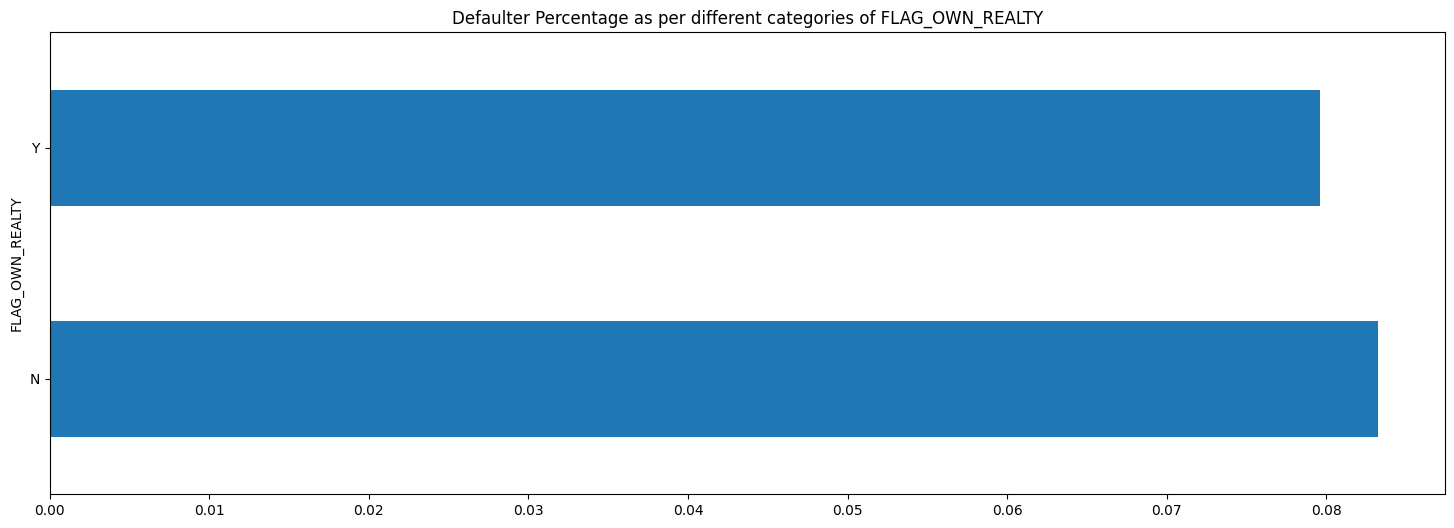


FLAG_OWN_REALTY
N    8.324929
Y    7.961577
Name: TARGET, dtype: float64

 Plotting the Distribution for NAME_TYPE_SUITE



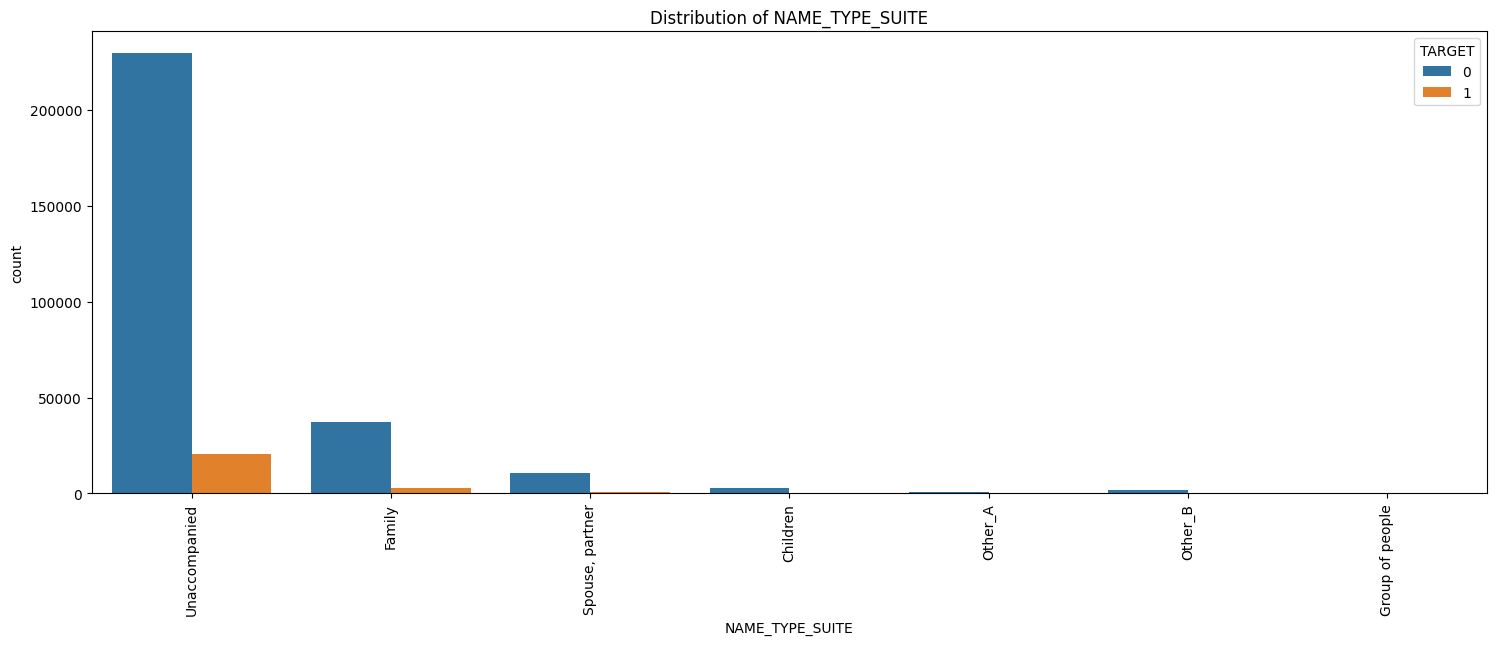

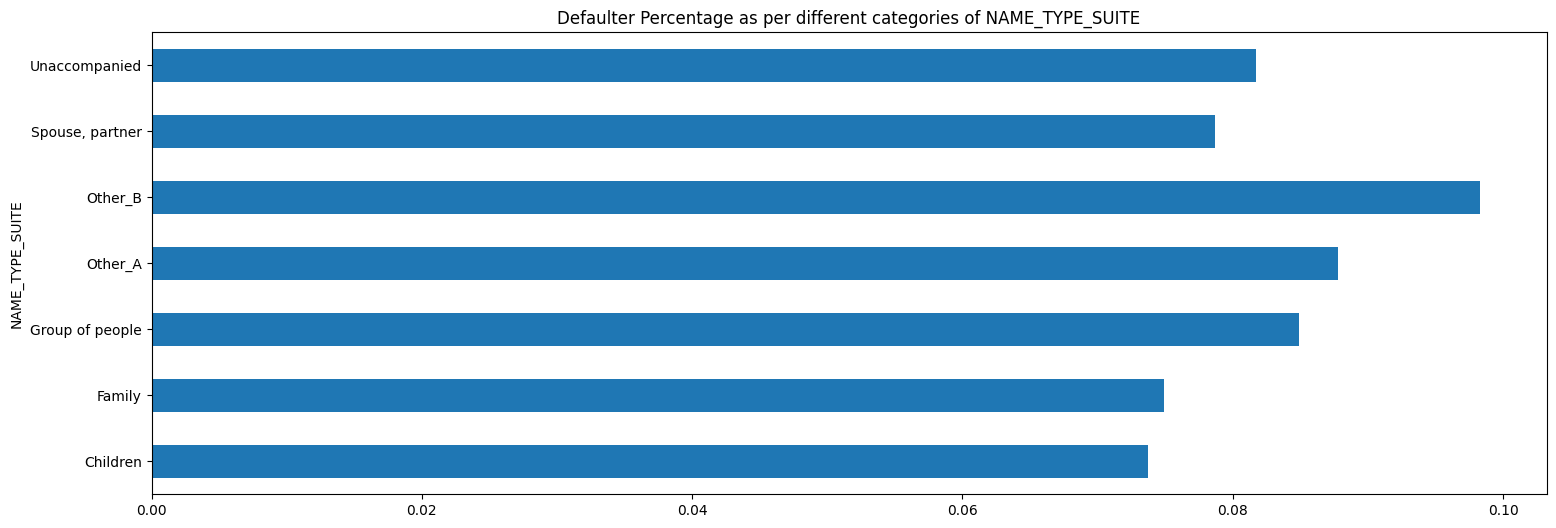


NAME_TYPE_SUITE
Children           7.376798
Family             7.494583
Group of people    8.487085
Other_A            8.775982
Other_B            9.830508
Spouse, partner    7.871592
Unaccompanied      8.168747
Name: TARGET, dtype: float64

 Plotting the Distribution for NAME_INCOME_TYPE



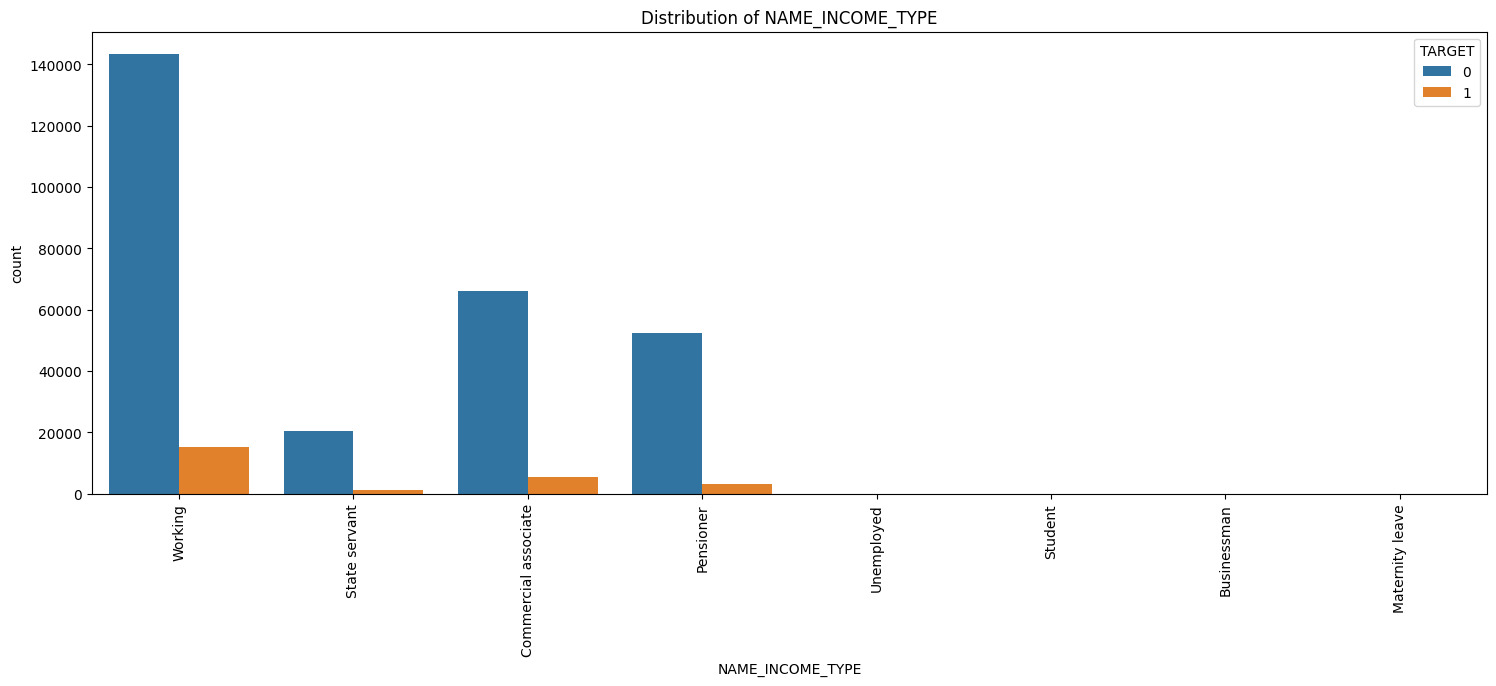

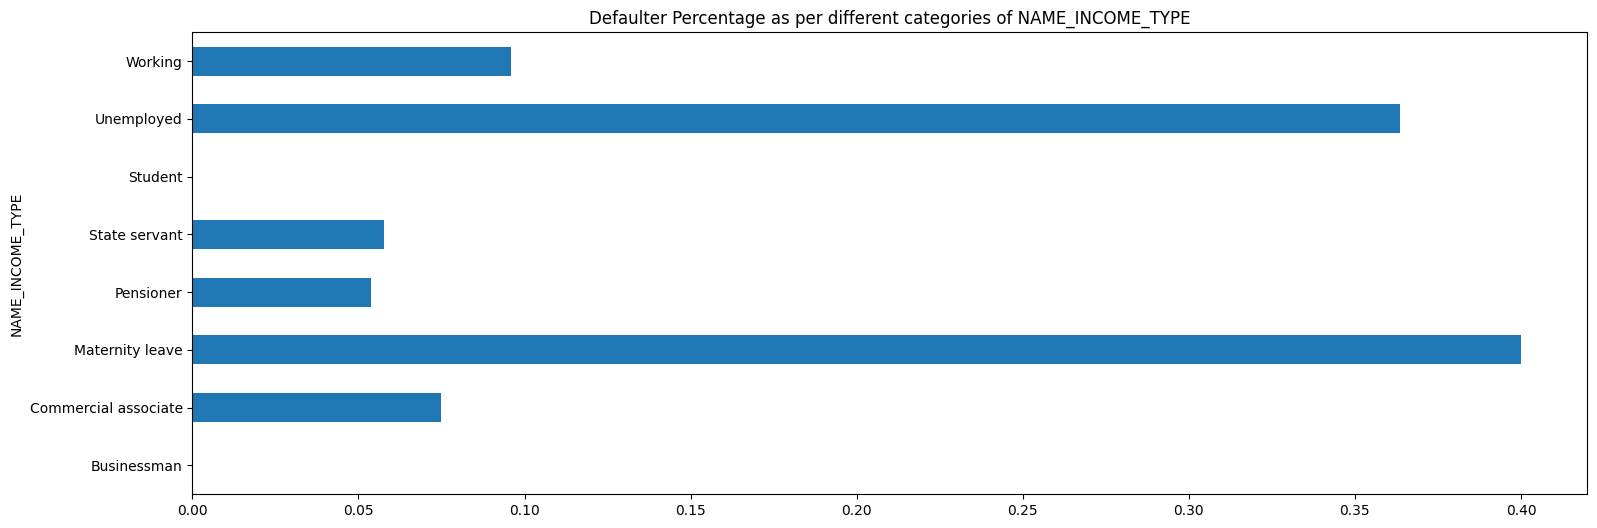


NAME_INCOME_TYPE
Businessman              0.000000
Commercial associate     7.484257
Maternity leave         40.000000
Pensioner                5.386366
State servant            5.754965
Student                  0.000000
Unemployed              36.363636
Working                  9.588472
Name: TARGET, dtype: float64

 Plotting the Distribution for NAME_EDUCATION_TYPE



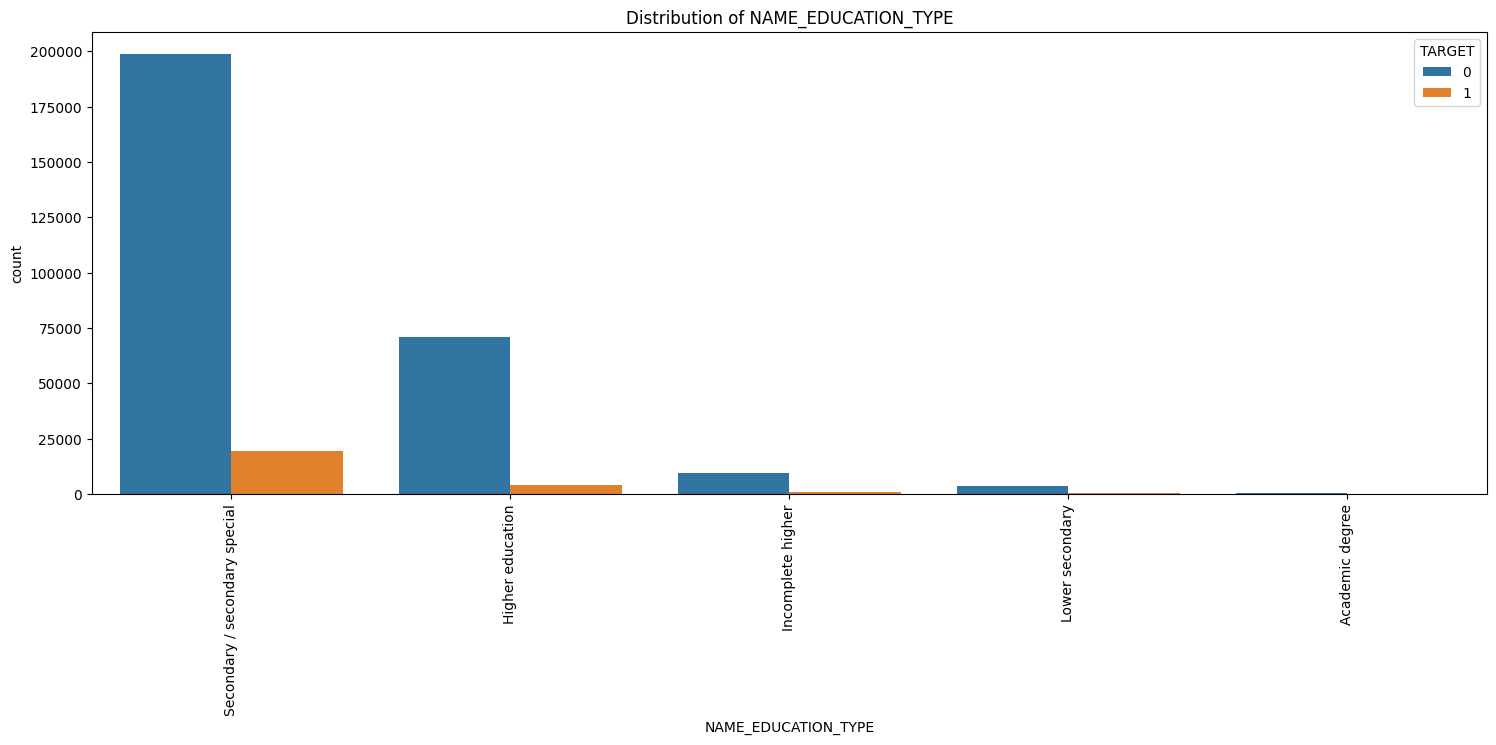

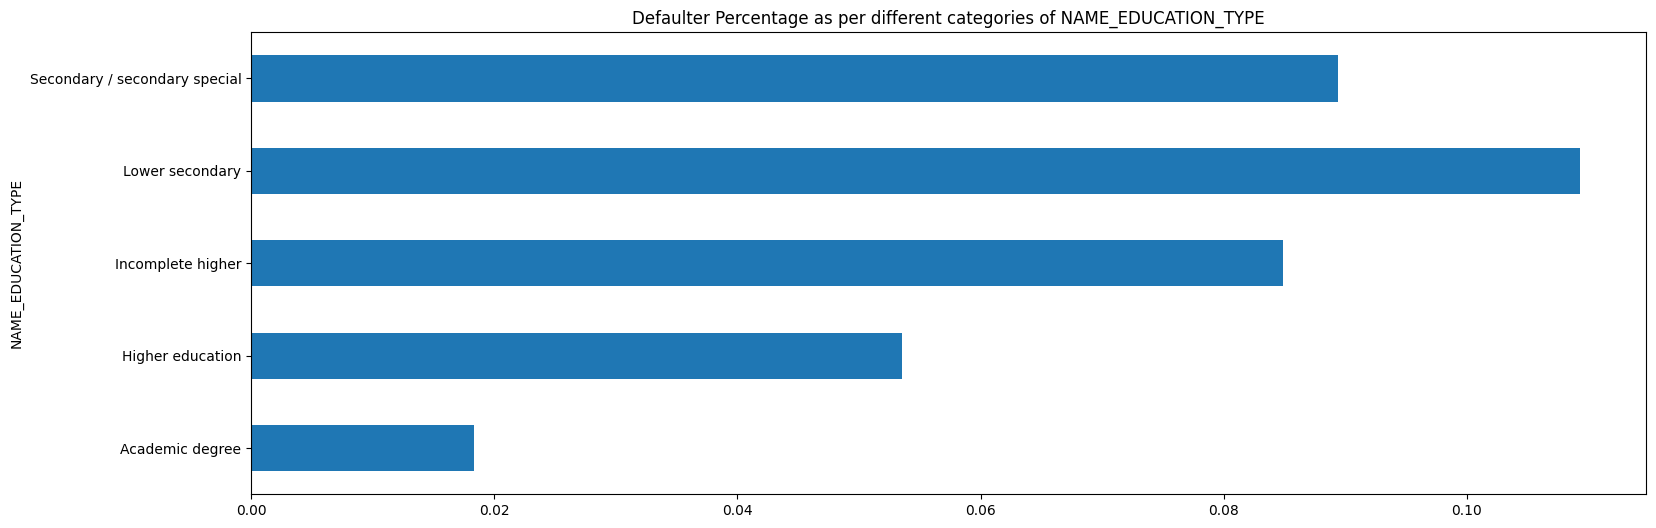


NAME_EDUCATION_TYPE
Academic degree                   1.829268
Higher education                  5.355115
Incomplete higher                 8.484966
Lower secondary                  10.927673
Secondary / secondary special     8.939929
Name: TARGET, dtype: float64

 Plotting the Distribution for NAME_FAMILY_STATUS



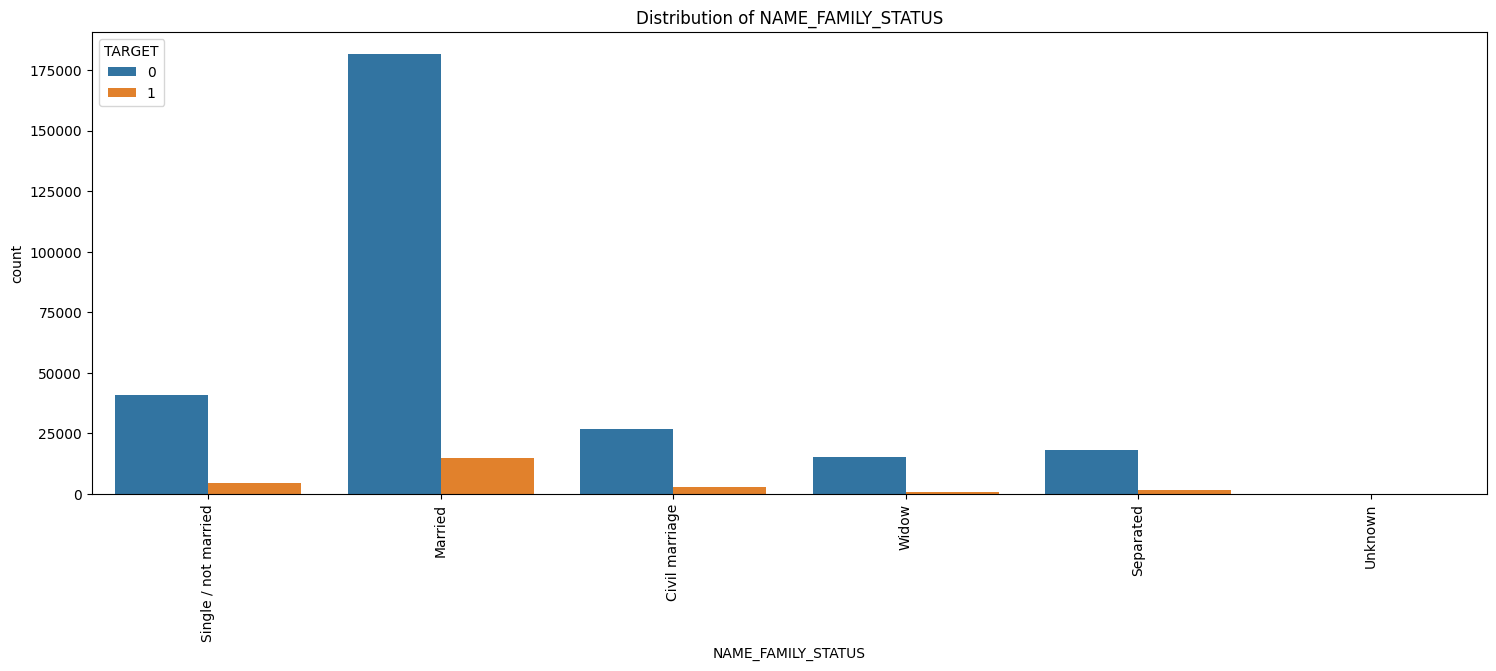

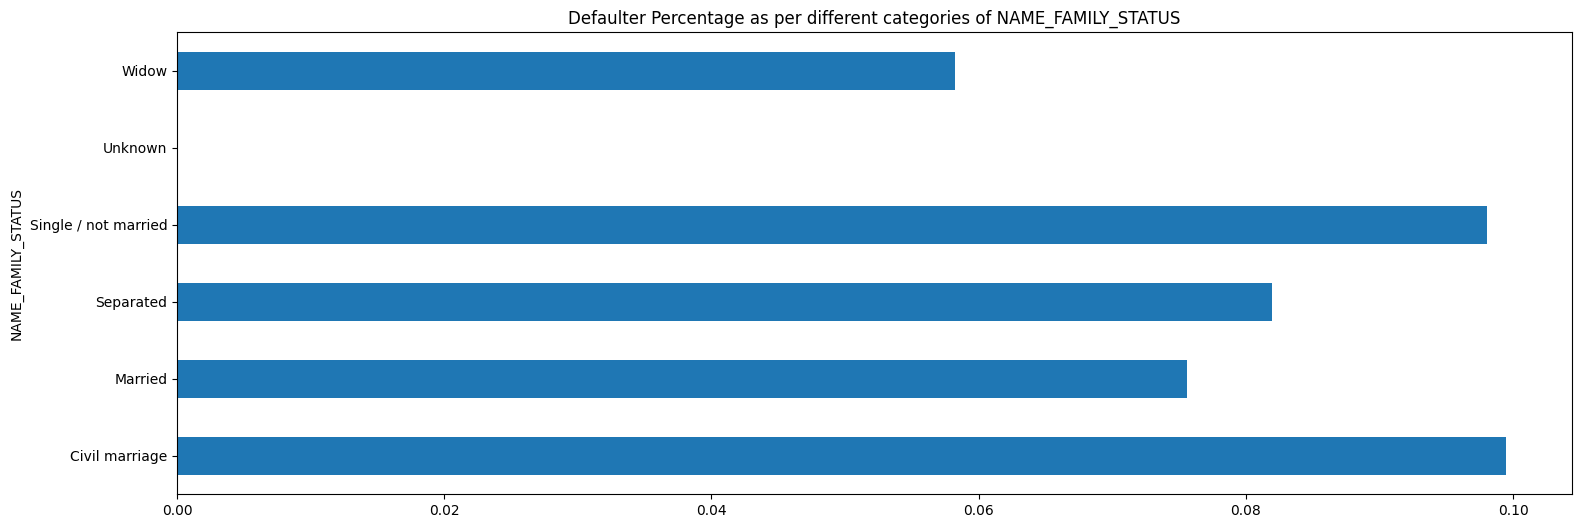


NAME_FAMILY_STATUS
Civil marriage          9.944584
Married                 7.559868
Separated               8.194234
Single / not married    9.807675
Unknown                 0.000000
Widow                   5.824217
Name: TARGET, dtype: float64

 Plotting the Distribution for NAME_HOUSING_TYPE



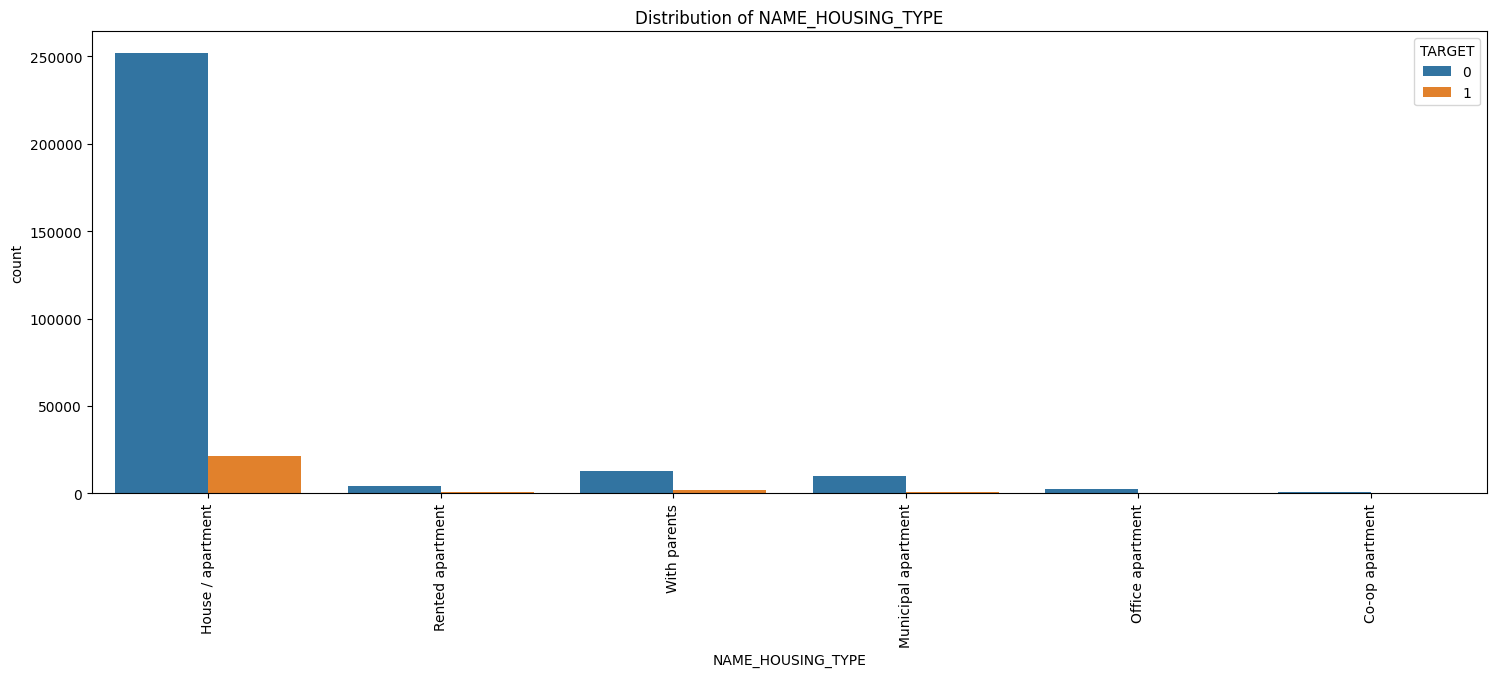

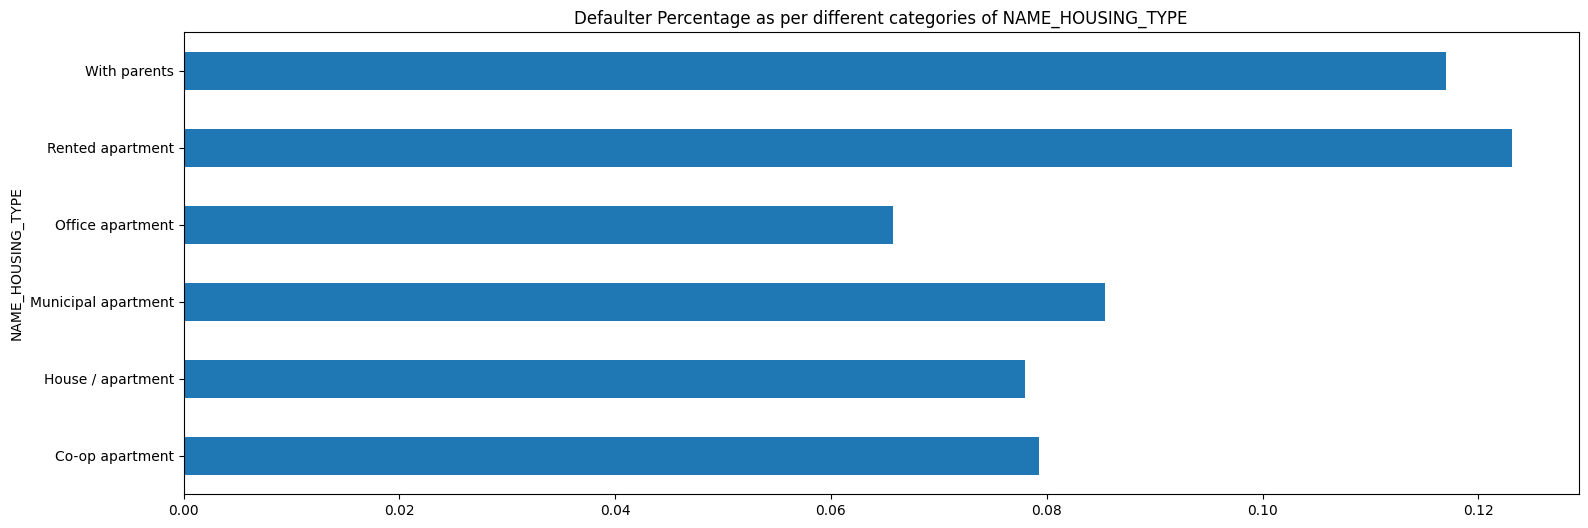


NAME_HOUSING_TYPE
Co-op apartment         7.932264
House / apartment       7.795711
Municipal apartment     8.539748
Office apartment        6.572411
Rented apartment       12.313051
With parents           11.698113
Name: TARGET, dtype: float64

 Plotting the Distribution for OCCUPATION_TYPE



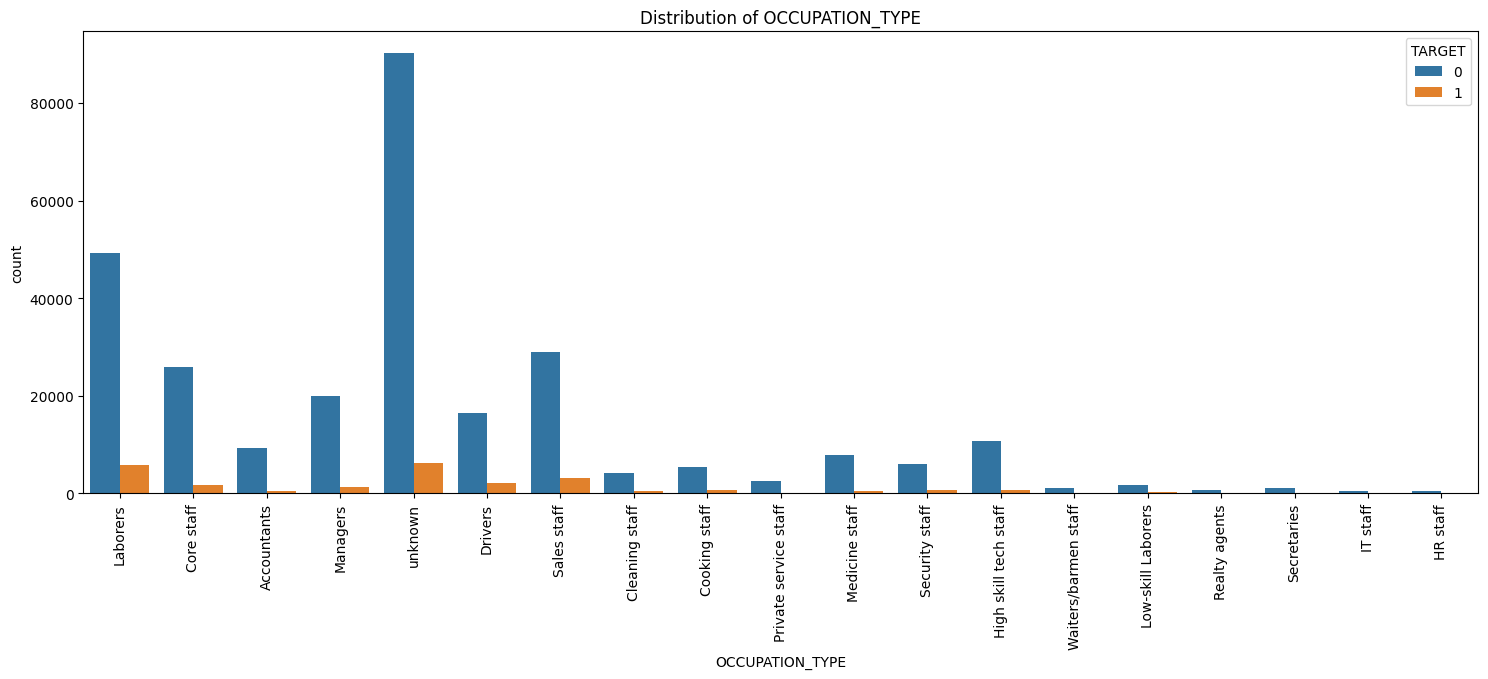

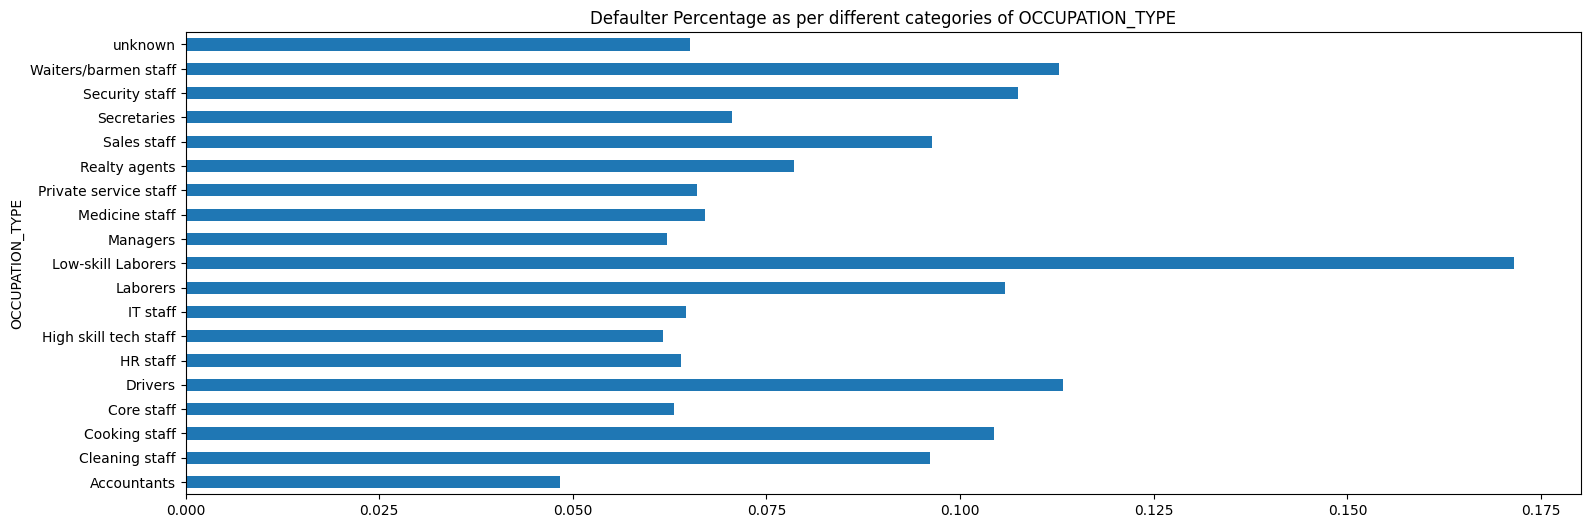


OCCUPATION_TYPE
Accountants               4.830327
Cleaning staff            9.606705
Cooking staff            10.443996
Core staff                6.303954
Drivers                  11.326130
HR staff                  6.394316
High skill tech staff     6.159930
IT staff                  6.463878
Laborers                 10.578770
Low-skill Laborers       17.152413
Managers                  6.214028
Medicine staff            6.700246
Private service staff     6.598793
Realty agents             7.856192
Sales staff               9.631799
Secretaries               7.049808
Security staff           10.742449
Waiters/barmen staff     11.275964
unknown                   6.513056
Name: TARGET, dtype: float64

 Plotting the Distribution for FLAG_MOBIL



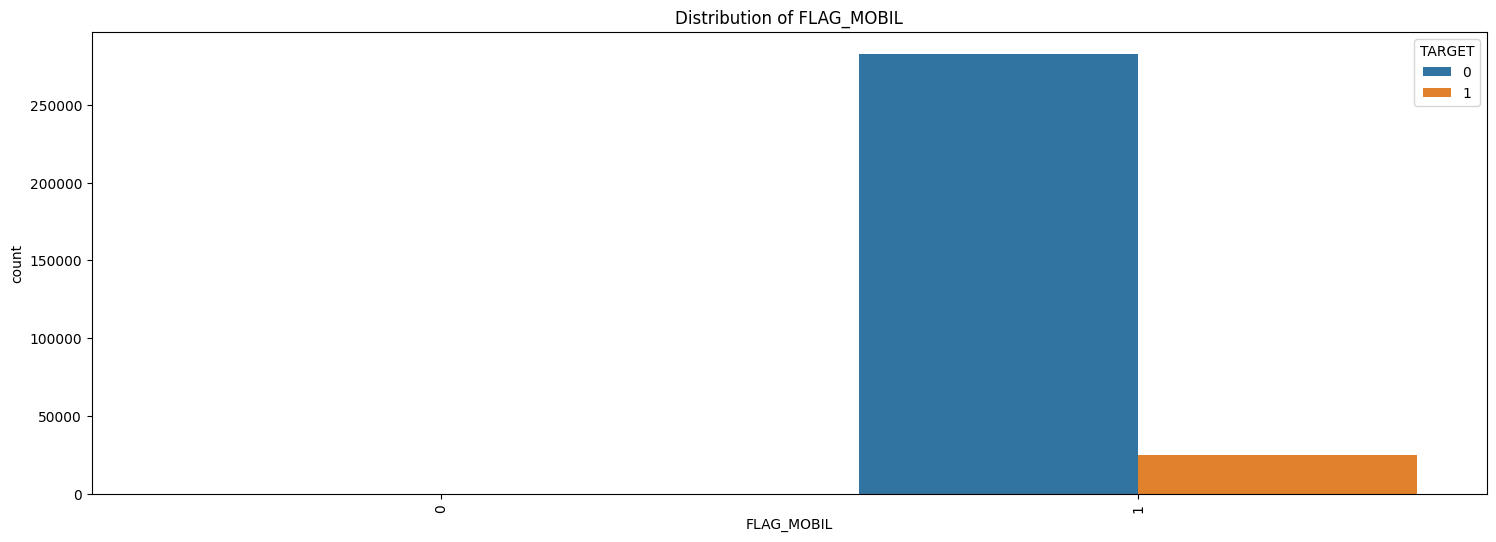

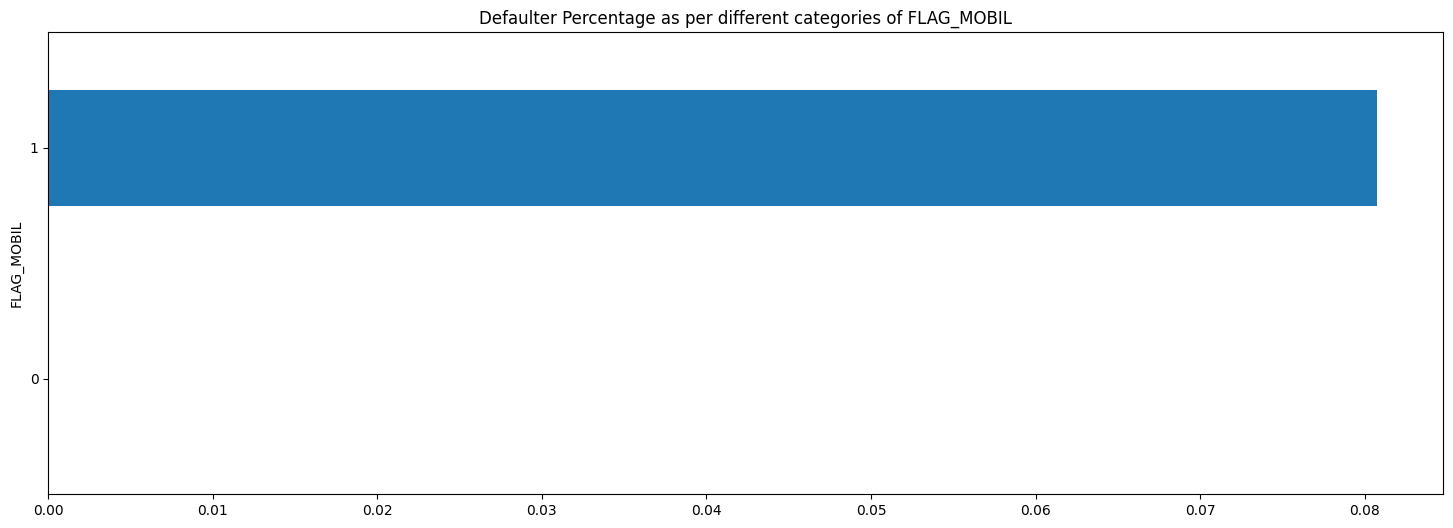


FLAG_MOBIL
0    0.000000
1    8.072908
Name: TARGET, dtype: float64

 Plotting the Distribution for FLAG_EMP_PHONE



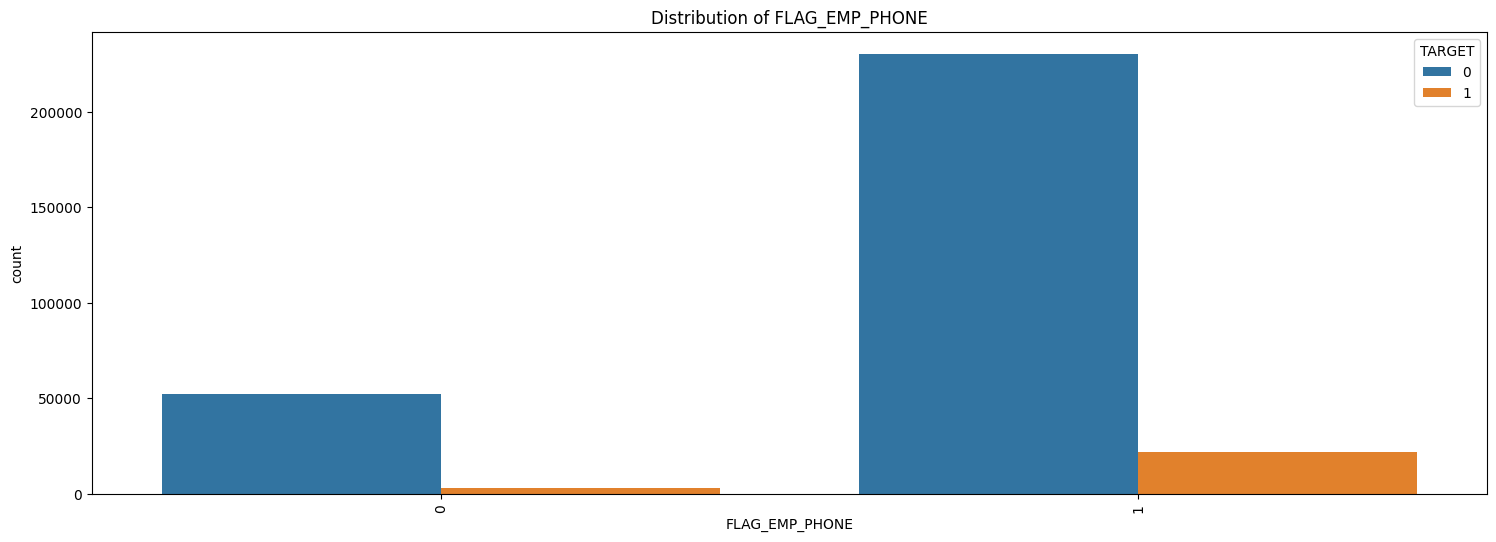

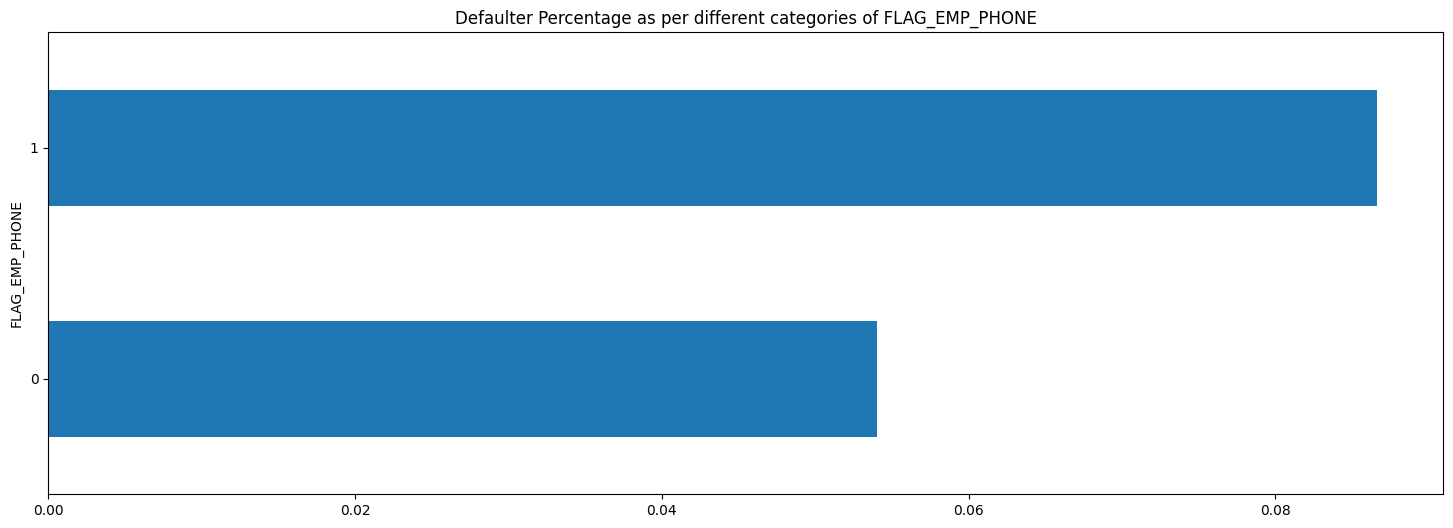


FLAG_EMP_PHONE
0    5.400282
1    8.659990
Name: TARGET, dtype: float64

 Plotting the Distribution for FLAG_WORK_PHONE



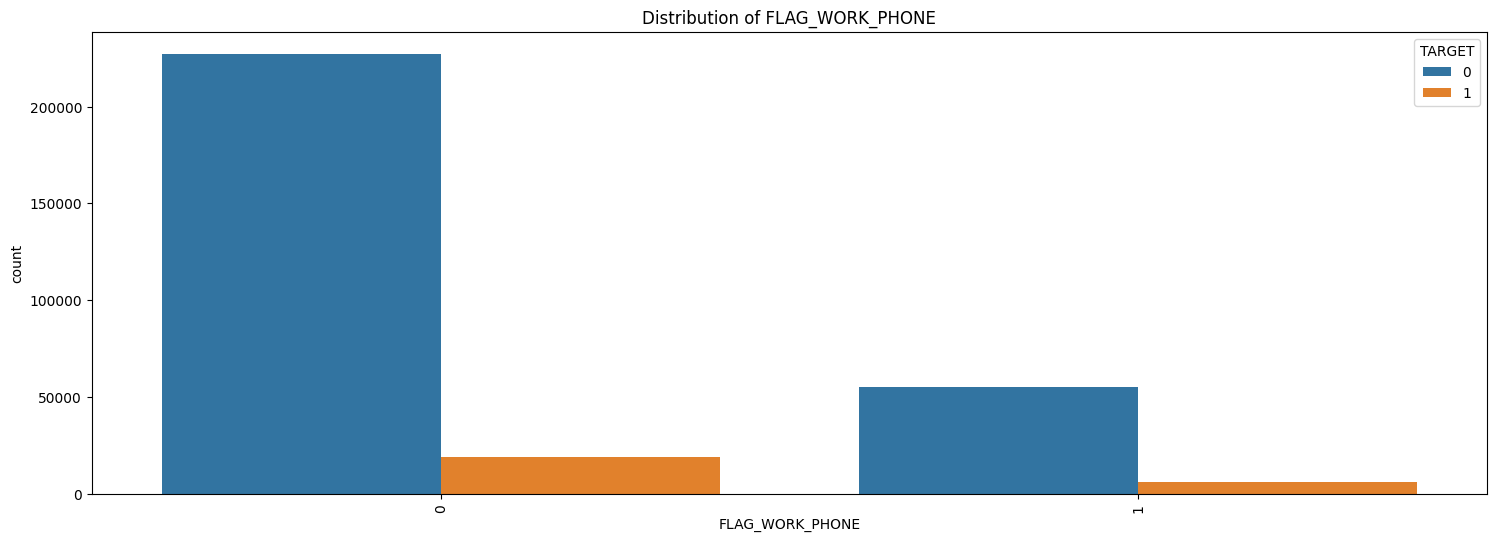

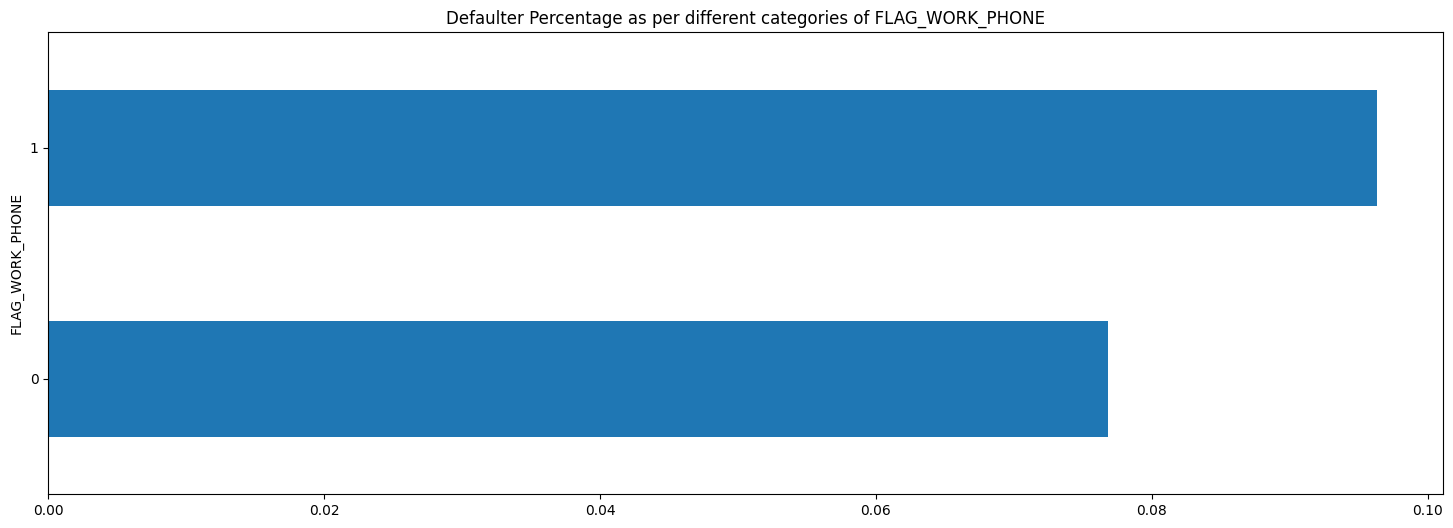


FLAG_WORK_PHONE
0    7.685122
1    9.630065
Name: TARGET, dtype: float64

 Plotting the Distribution for FLAG_CONT_MOBILE



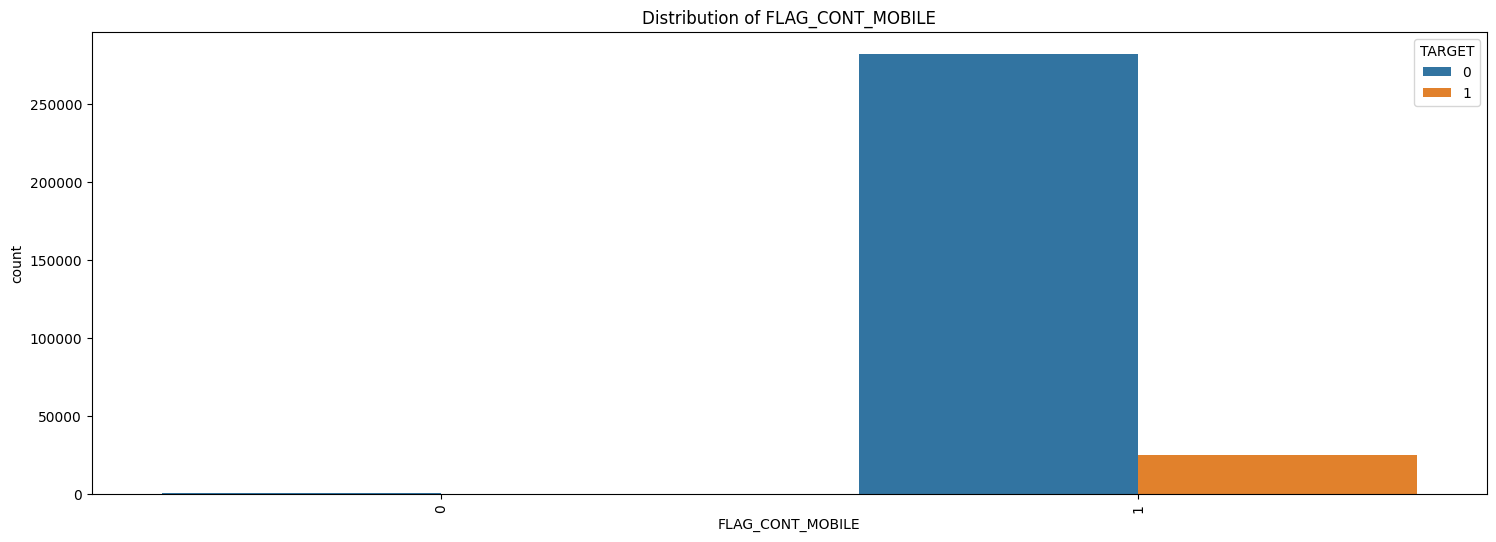

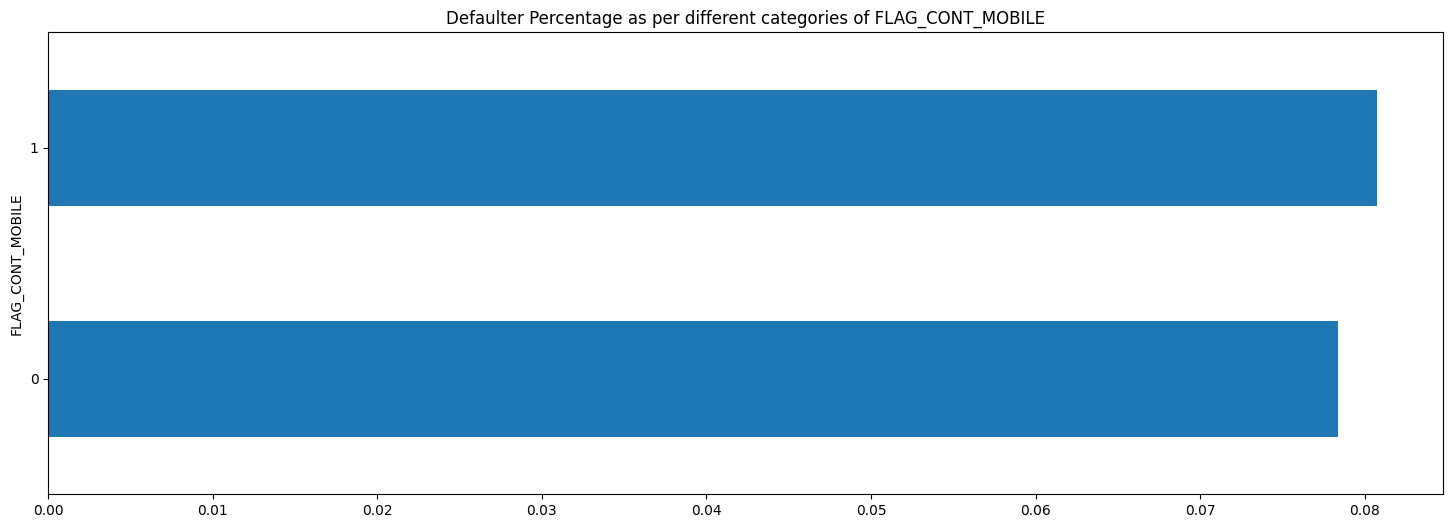


FLAG_CONT_MOBILE
0    7.839721
1    8.073318
Name: TARGET, dtype: float64

 Plotting the Distribution for FLAG_PHONE



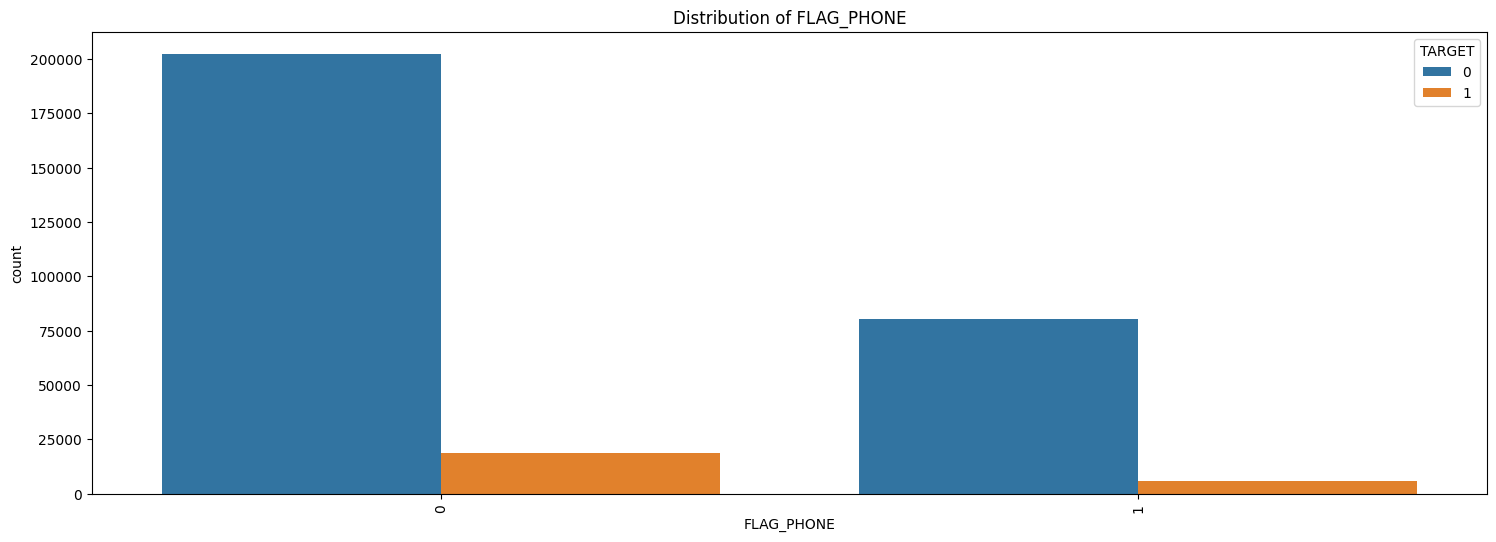

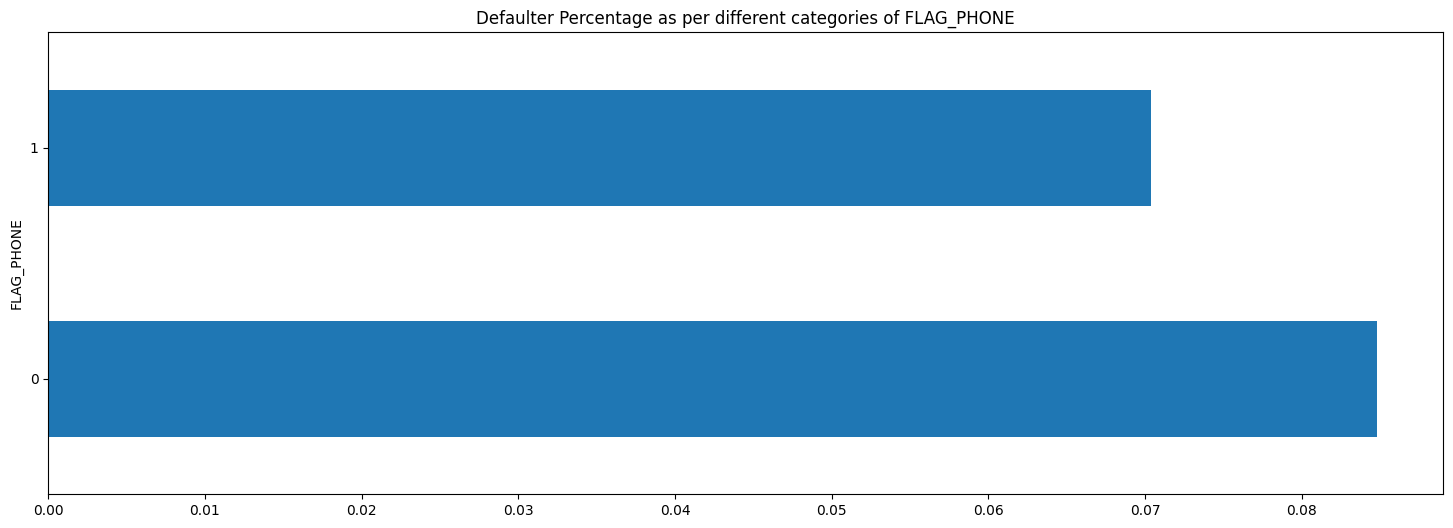


FLAG_PHONE
0    8.478379
1    7.035670
Name: TARGET, dtype: float64

 Plotting the Distribution for FLAG_EMAIL



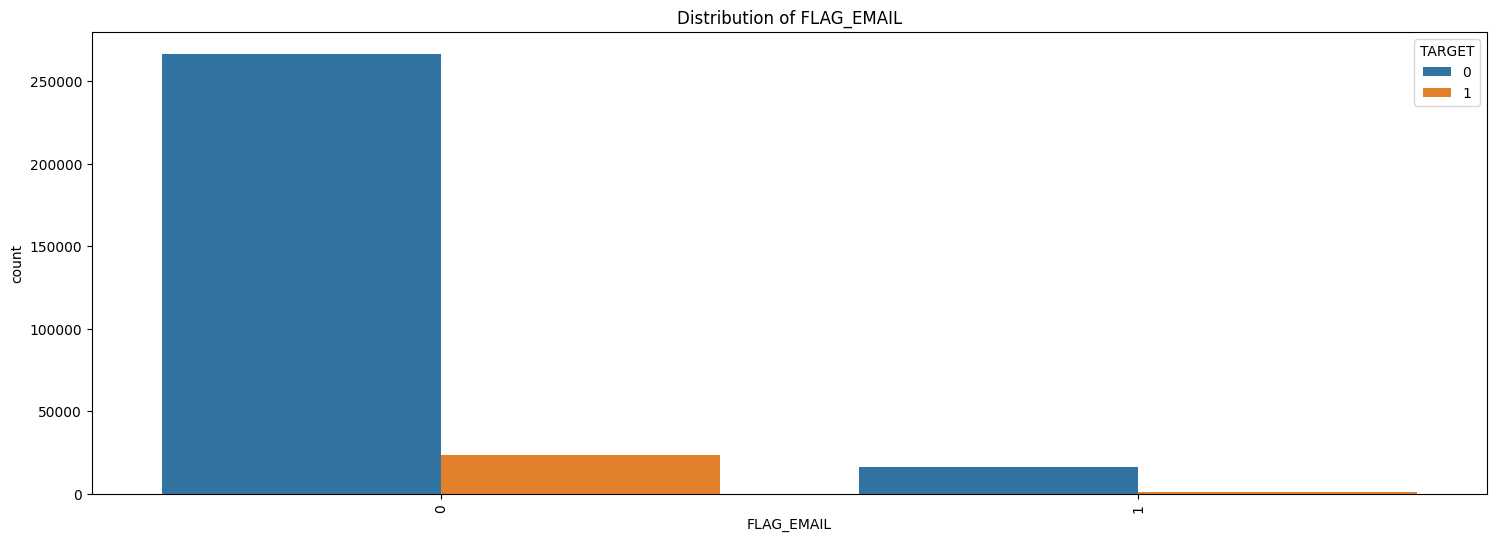

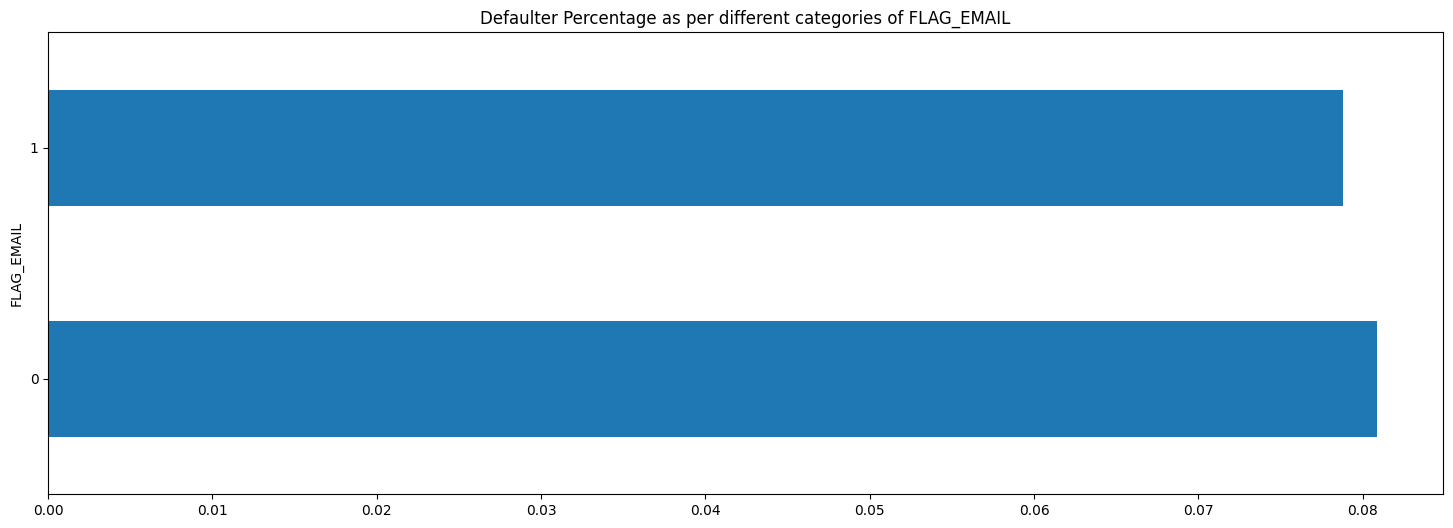


FLAG_EMAIL
0    8.084628
1    7.877537
Name: TARGET, dtype: float64

 Plotting the Distribution for CNT_FAM_MEMBERS



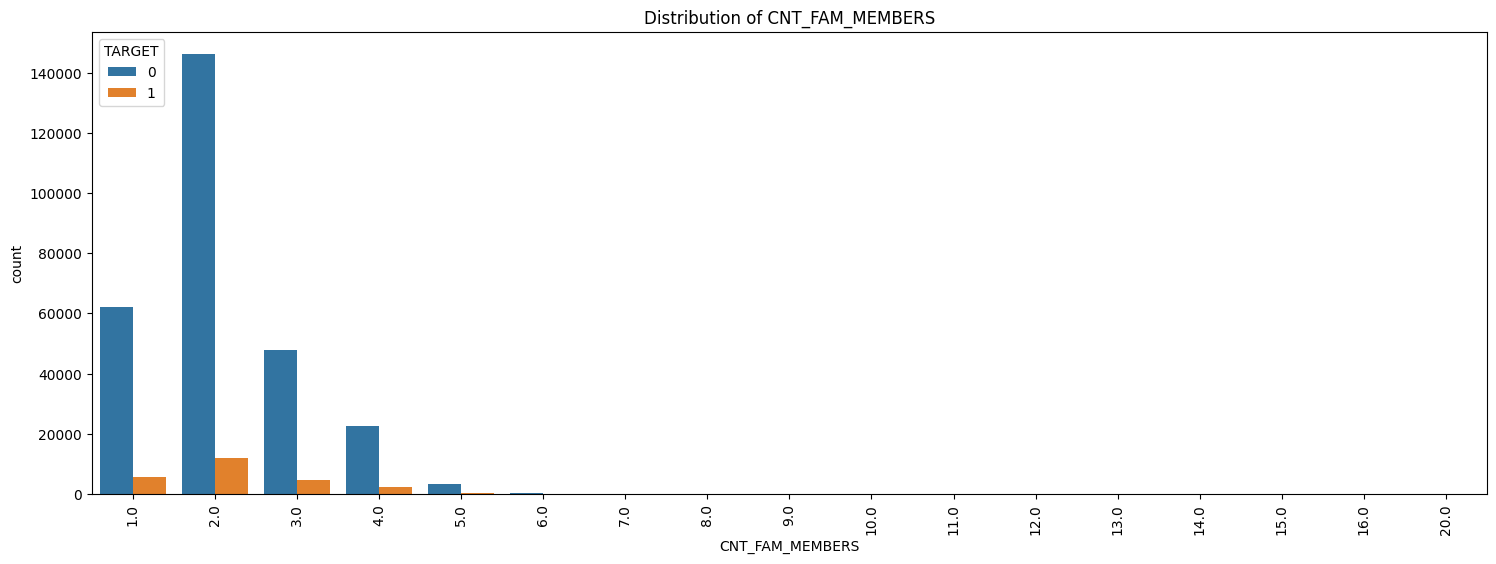

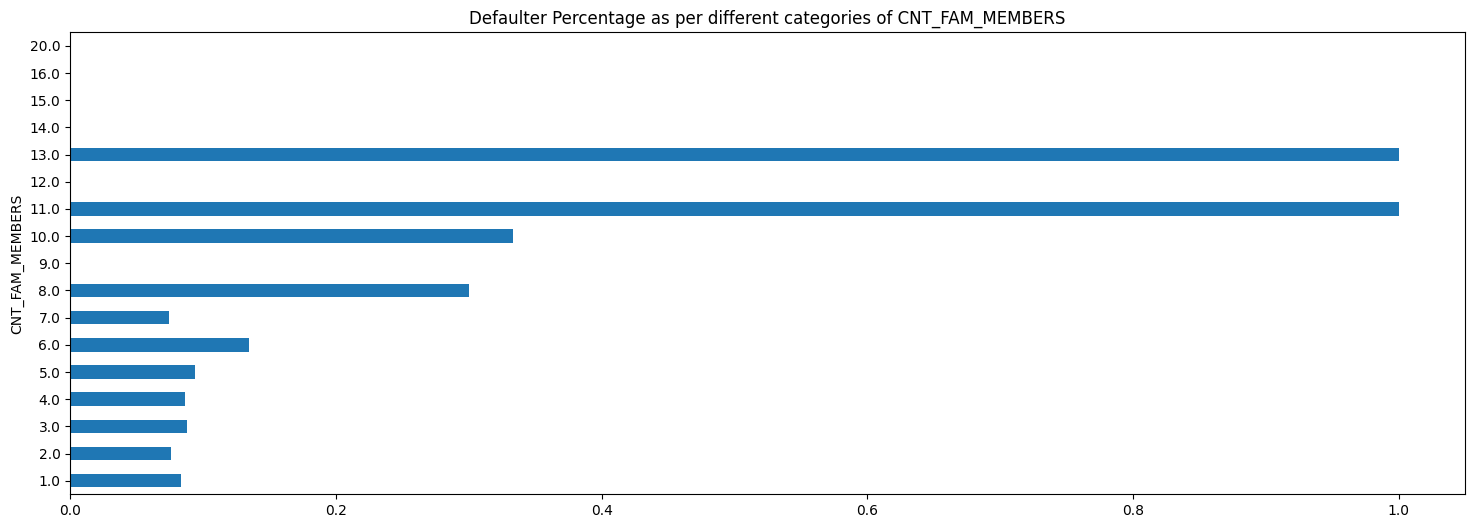


CNT_FAM_MEMBERS
1.0       8.364408
2.0       7.583498
3.0       8.760290
4.0       8.648824
5.0       9.401955
6.0      13.480392
7.0       7.407407
8.0      30.000000
9.0       0.000000
10.0     33.333333
11.0    100.000000
12.0      0.000000
13.0    100.000000
14.0      0.000000
15.0      0.000000
16.0      0.000000
20.0      0.000000
Name: TARGET, dtype: float64

 Plotting the Distribution for CNT_CHILDREN



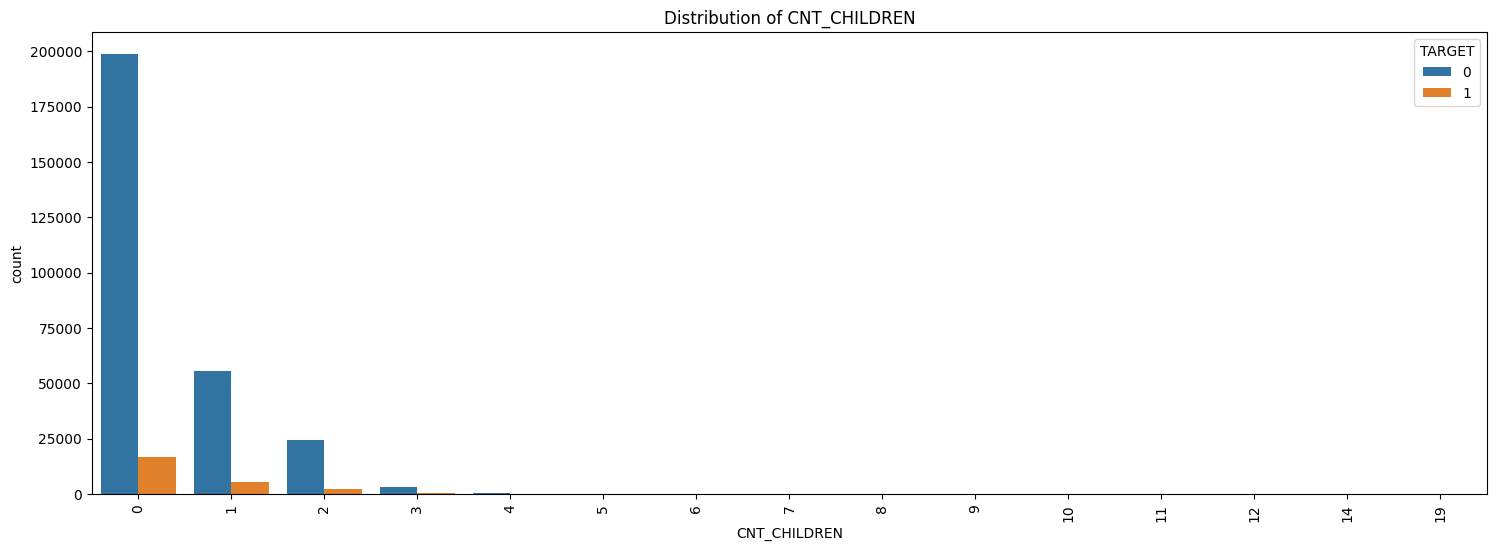

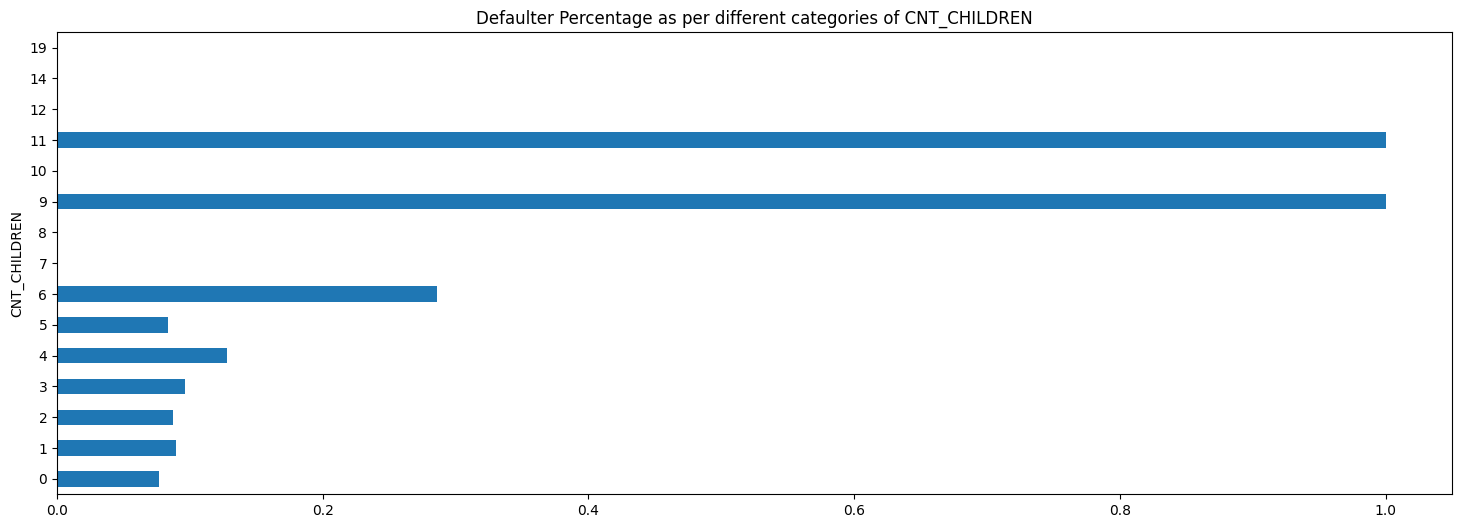


CNT_CHILDREN
0       7.711809
1       8.923575
2       8.721821
3       9.631423
4      12.820513
5       8.333333
6      28.571429
7       0.000000
8       0.000000
9     100.000000
10      0.000000
11    100.000000
12      0.000000
14      0.000000
19      0.000000
Name: TARGET, dtype: float64

 Plotting the Distribution for REG_REGION_NOT_LIVE_REGION



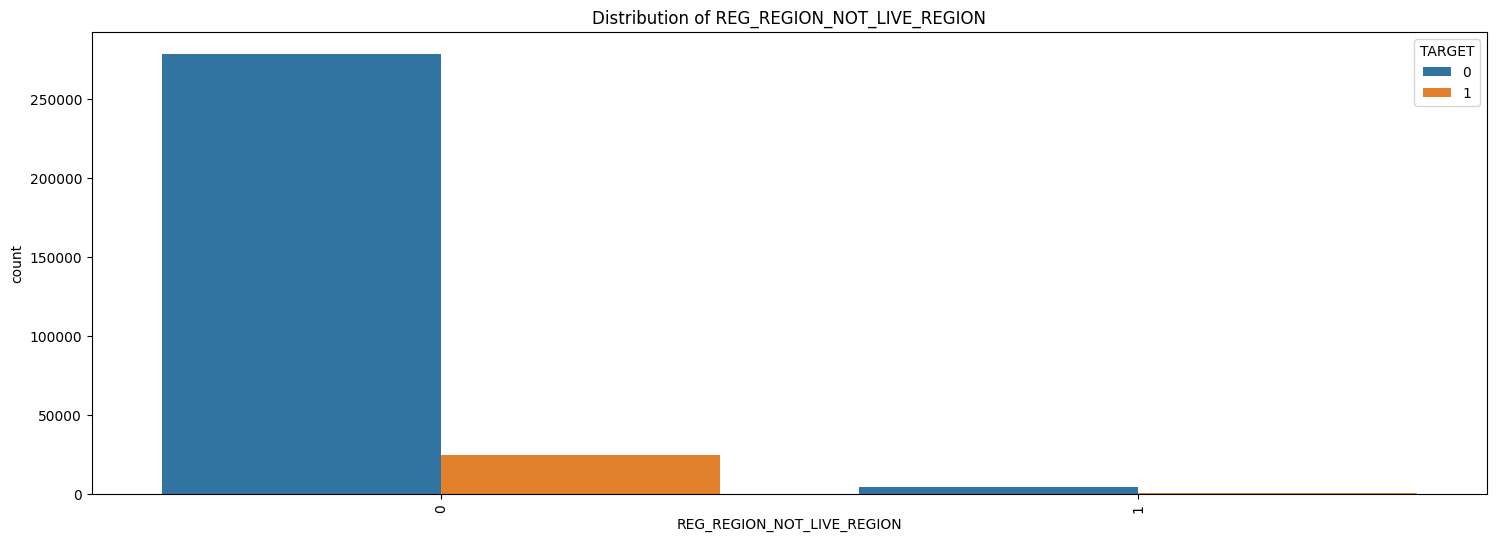

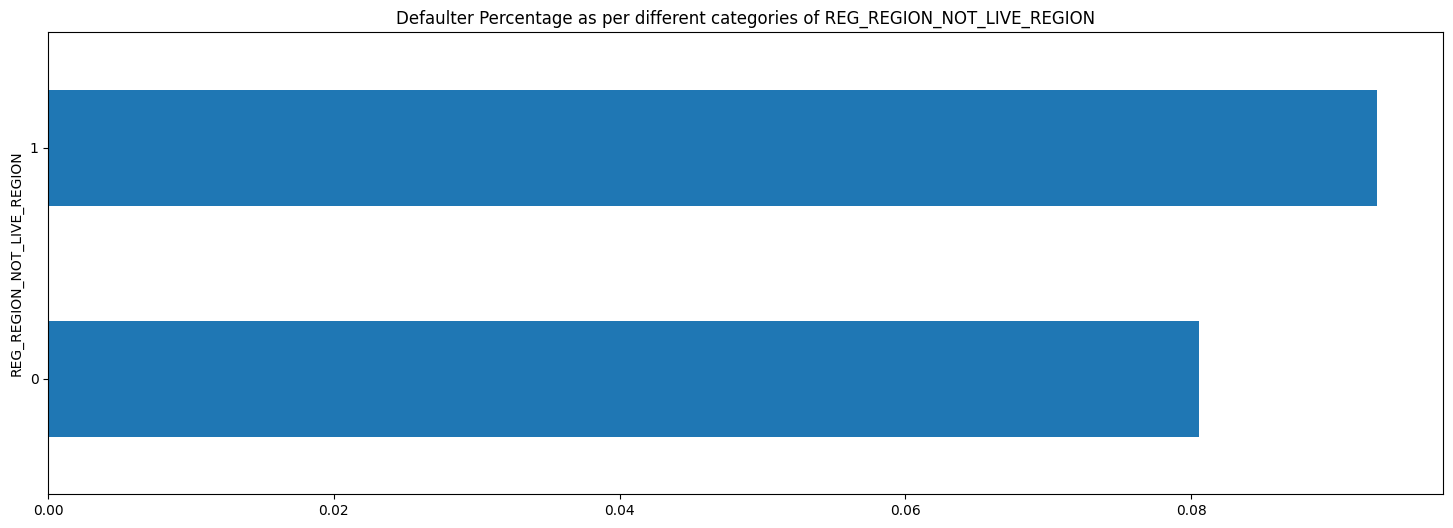


REG_REGION_NOT_LIVE_REGION
0    8.054046
1    9.297831
Name: TARGET, dtype: float64

 Plotting the Distribution for REG_REGION_NOT_WORK_REGION



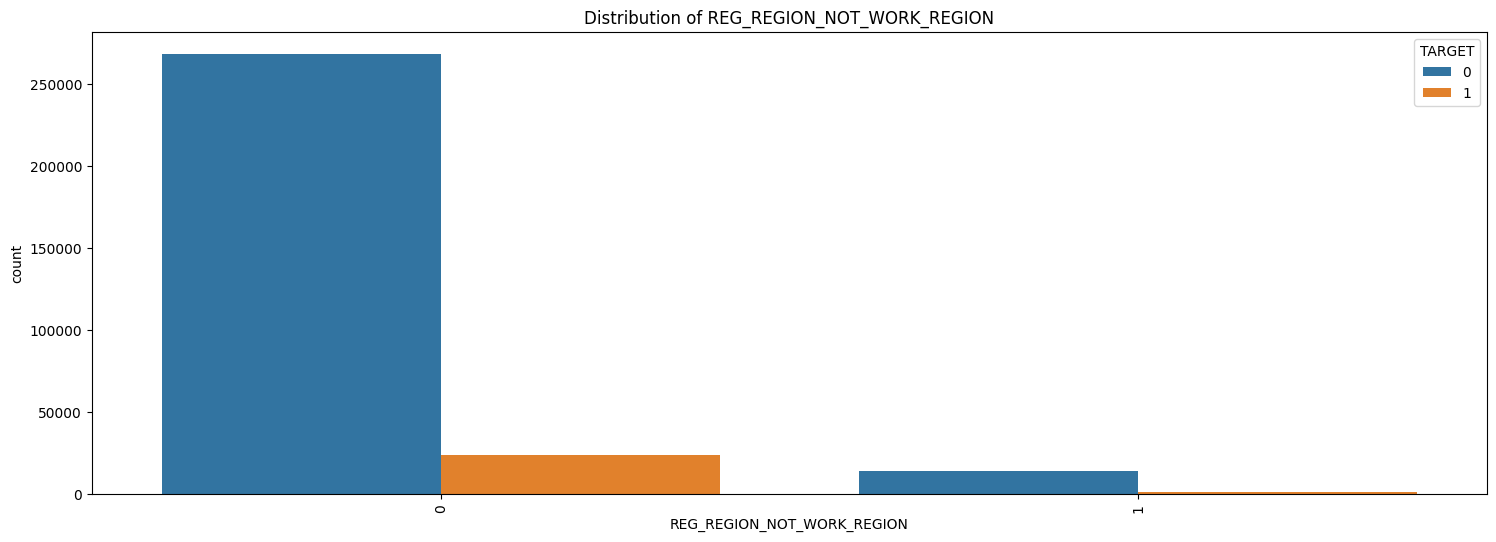

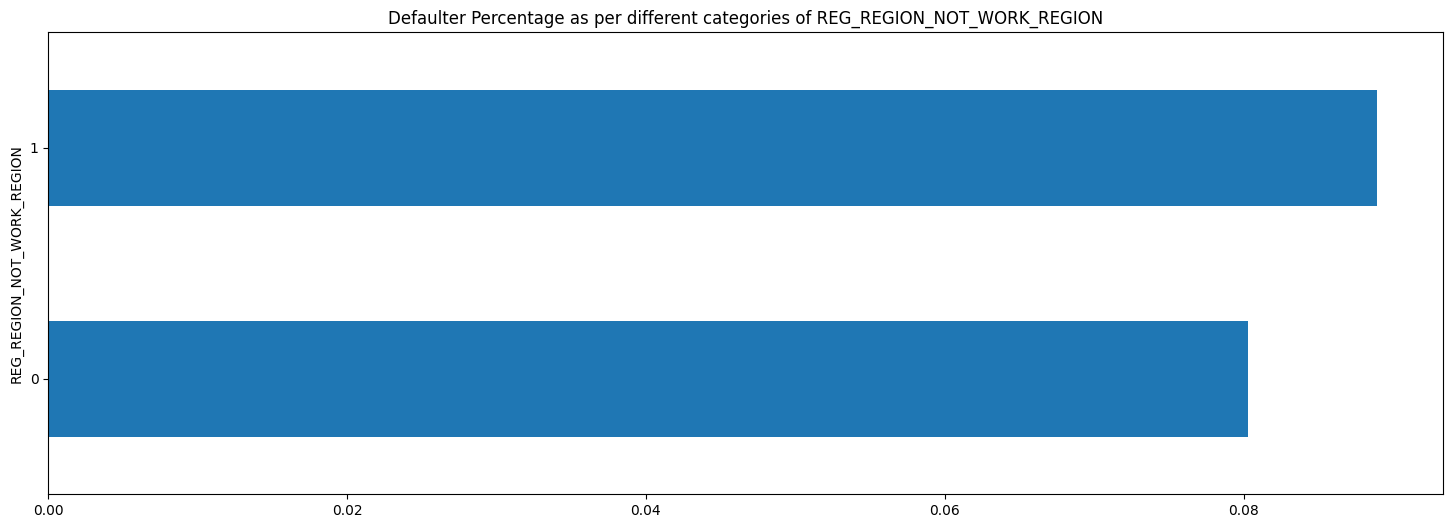


REG_REGION_NOT_WORK_REGION
0    8.029147
1    8.890597
Name: TARGET, dtype: float64

 Plotting the Distribution for LIVE_REGION_NOT_WORK_REGION



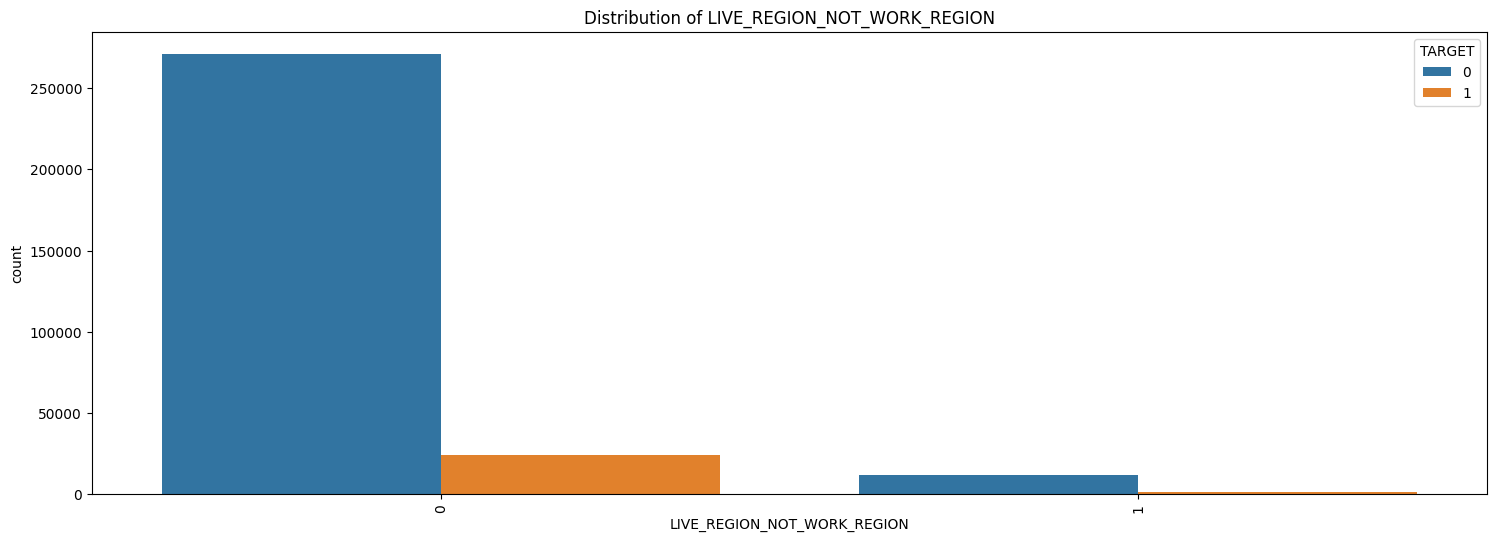

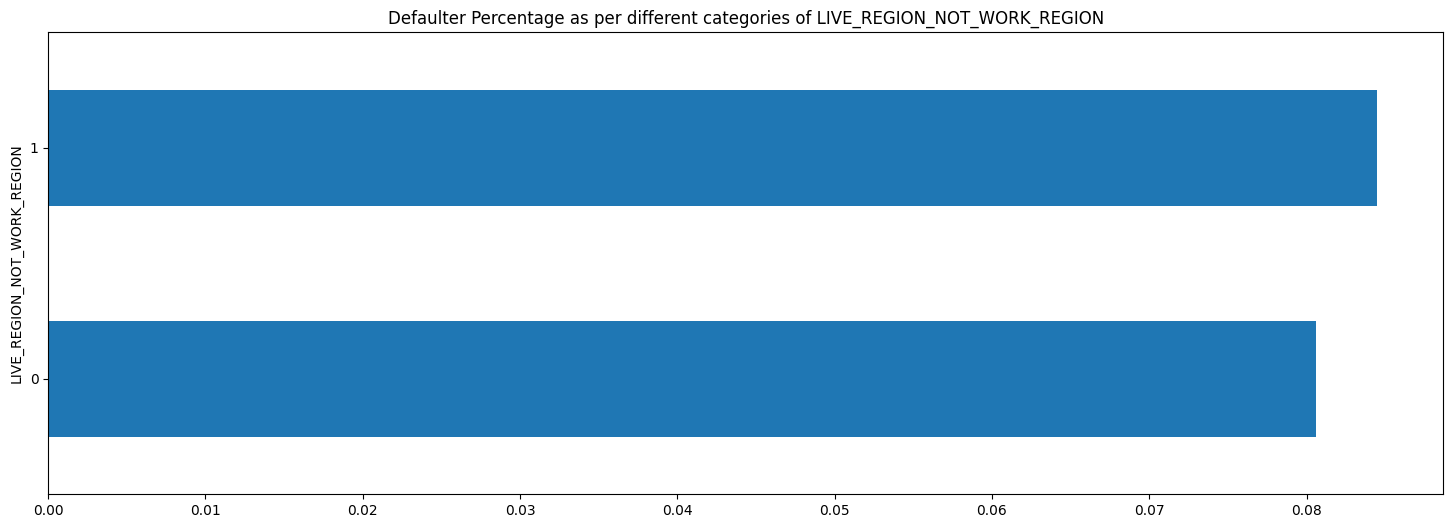


LIVE_REGION_NOT_WORK_REGION
0    8.057070
1    8.445973
Name: TARGET, dtype: float64

 Plotting the Distribution for REG_CITY_NOT_LIVE_CITY



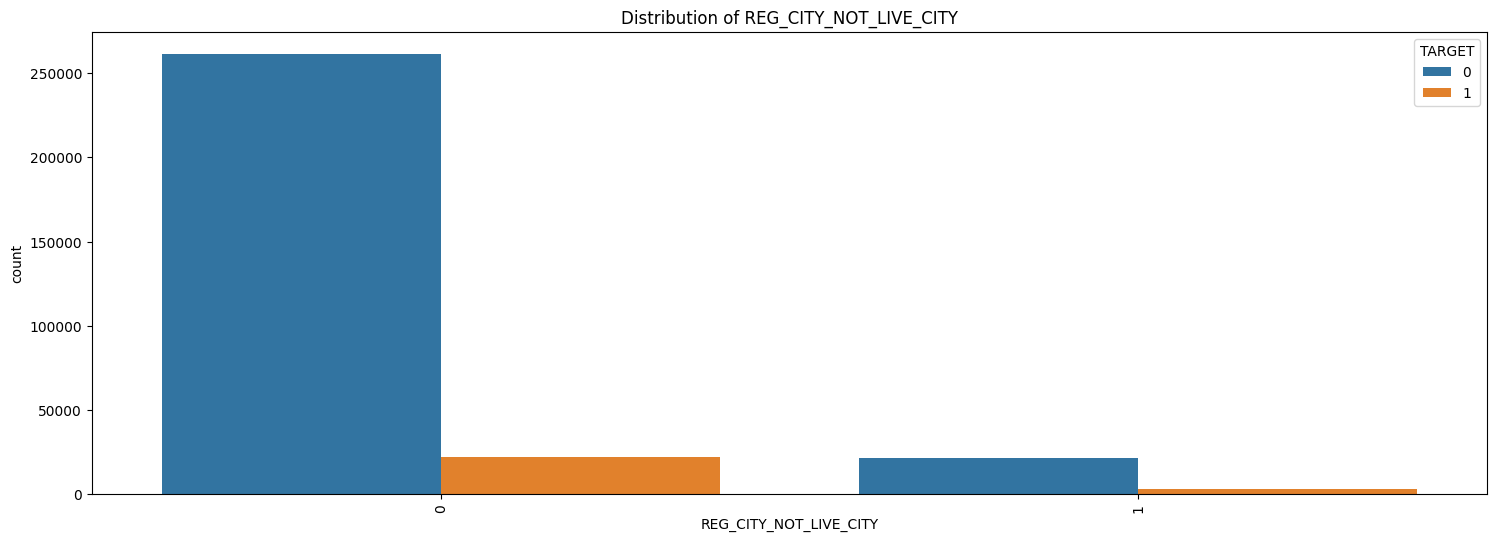

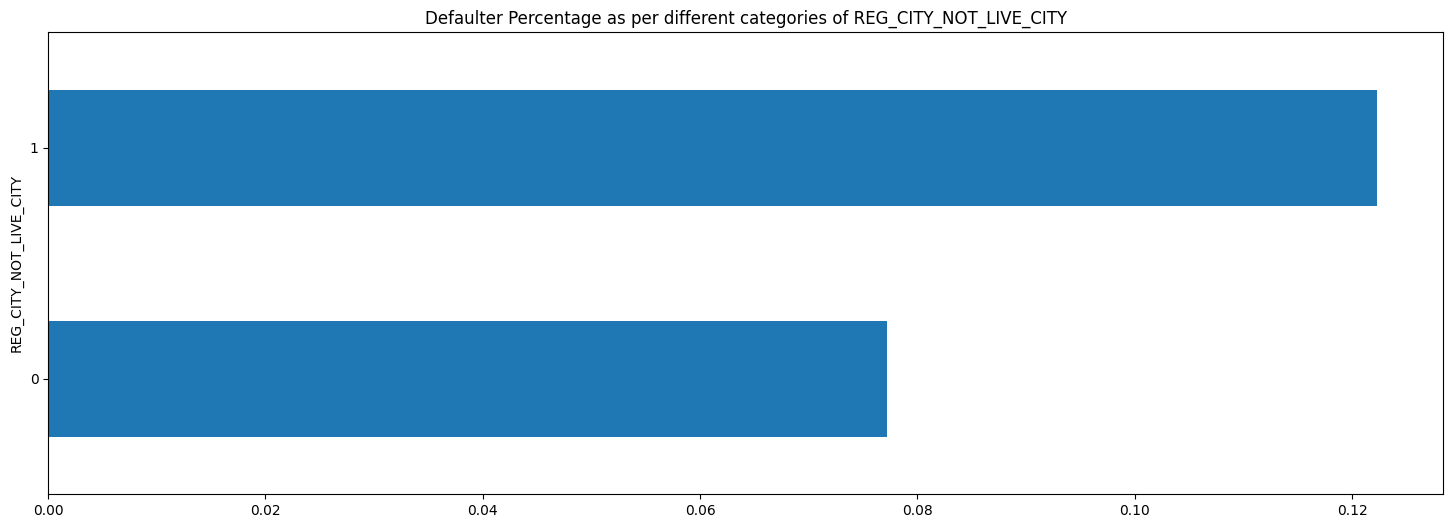


REG_CITY_NOT_LIVE_CITY
0     7.720692
1    12.225966
Name: TARGET, dtype: float64

 Plotting the Distribution for REG_CITY_NOT_WORK_CITY



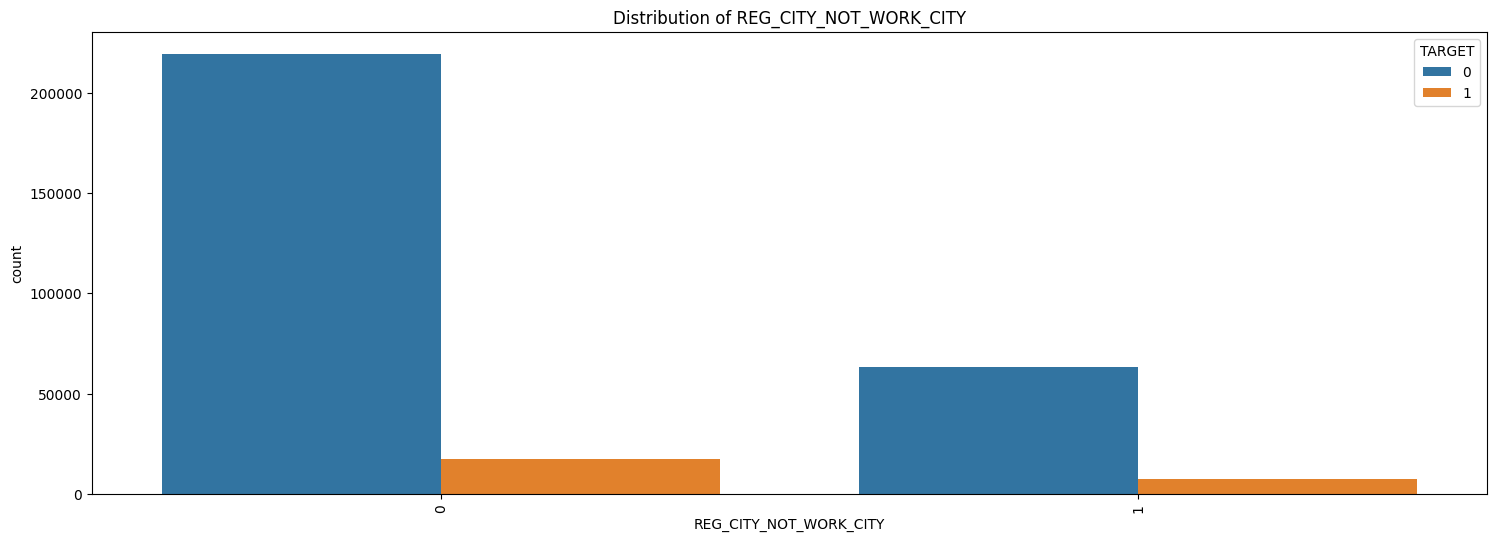

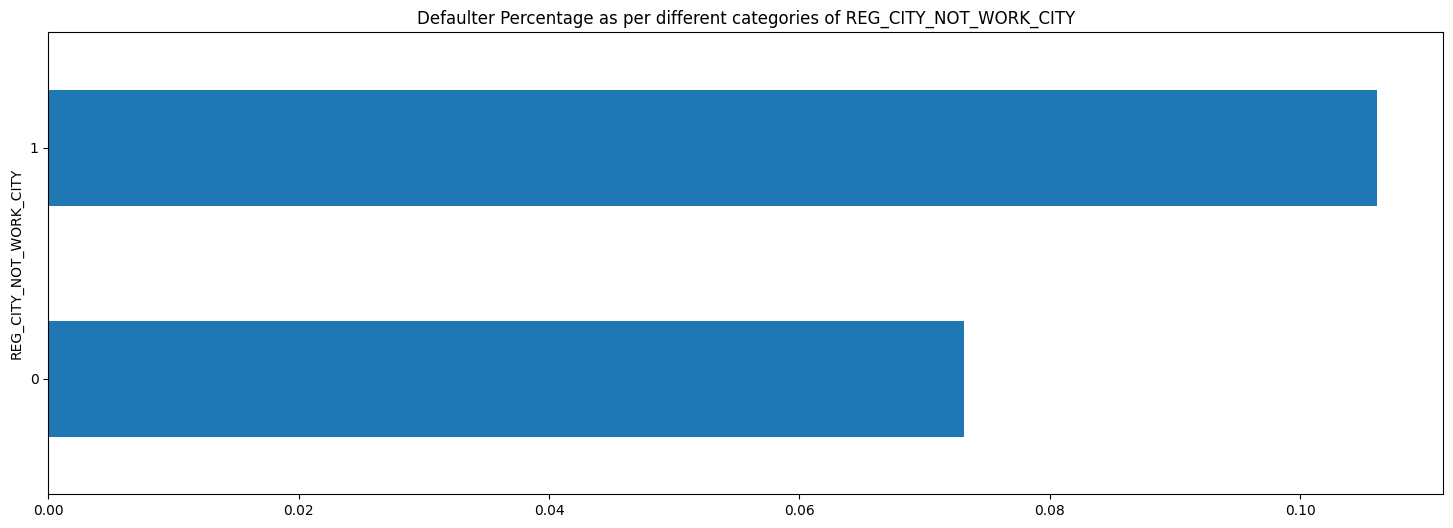


REG_CITY_NOT_WORK_CITY
0     7.312672
1    10.611427
Name: TARGET, dtype: float64

 Plotting the Distribution for LIVE_CITY_NOT_WORK_CITY



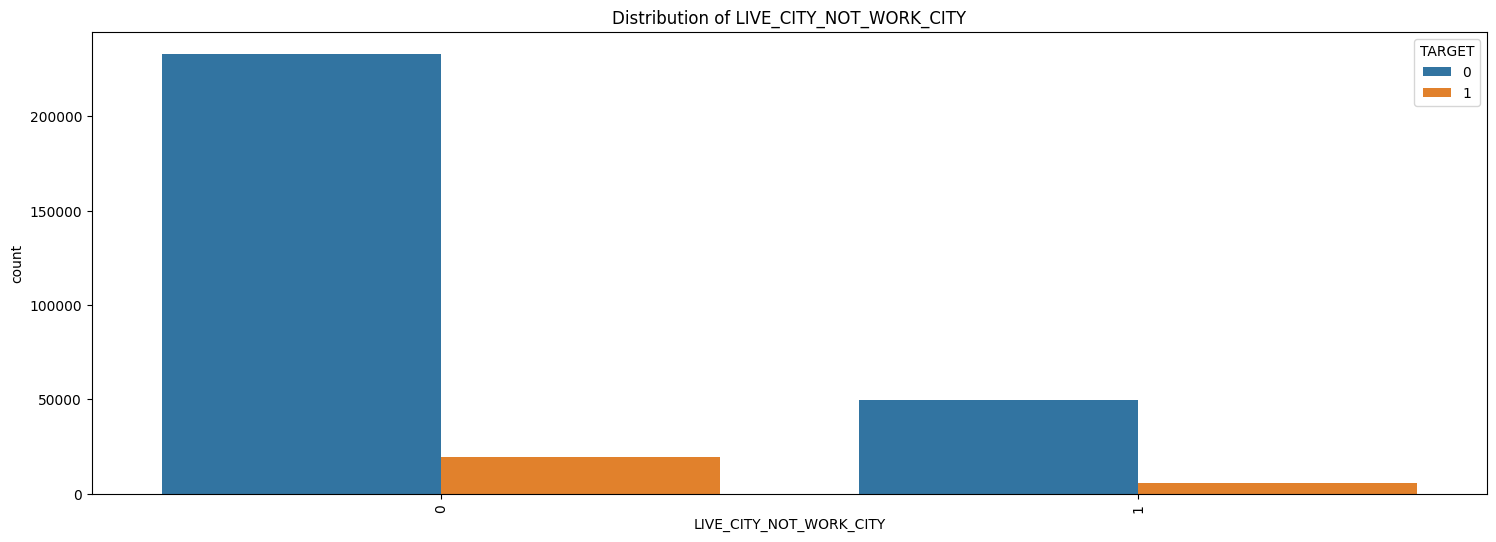

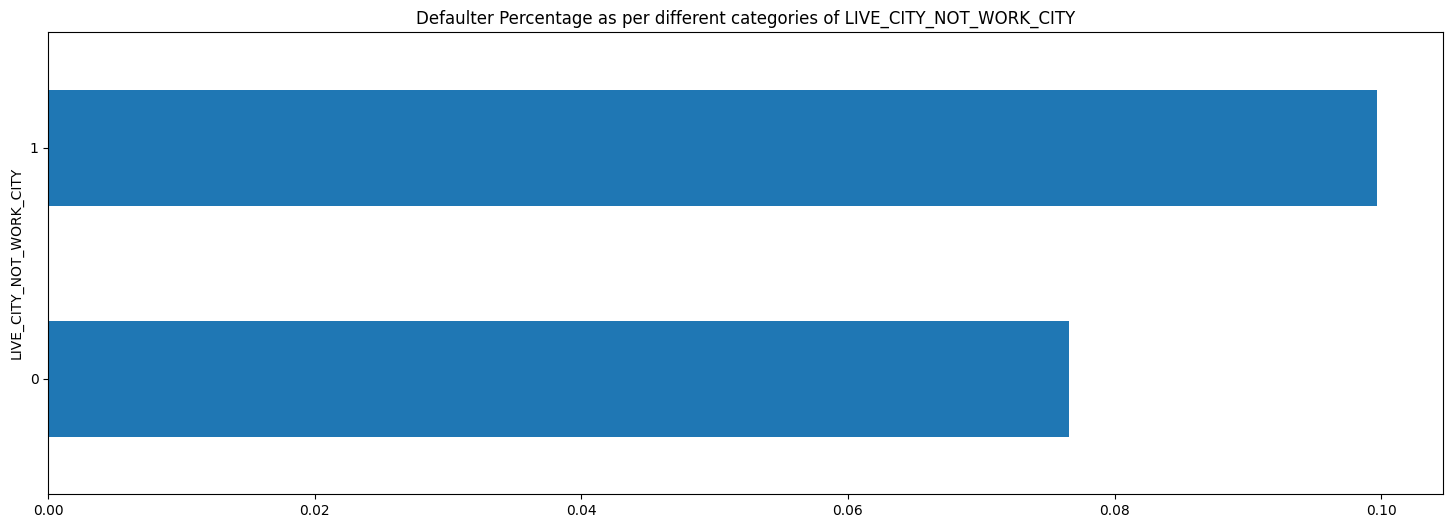


LIVE_CITY_NOT_WORK_CITY
0    7.658465
1    9.966495
Name: TARGET, dtype: float64

 Plotting the Distribution for ORGANIZATION_GROUP



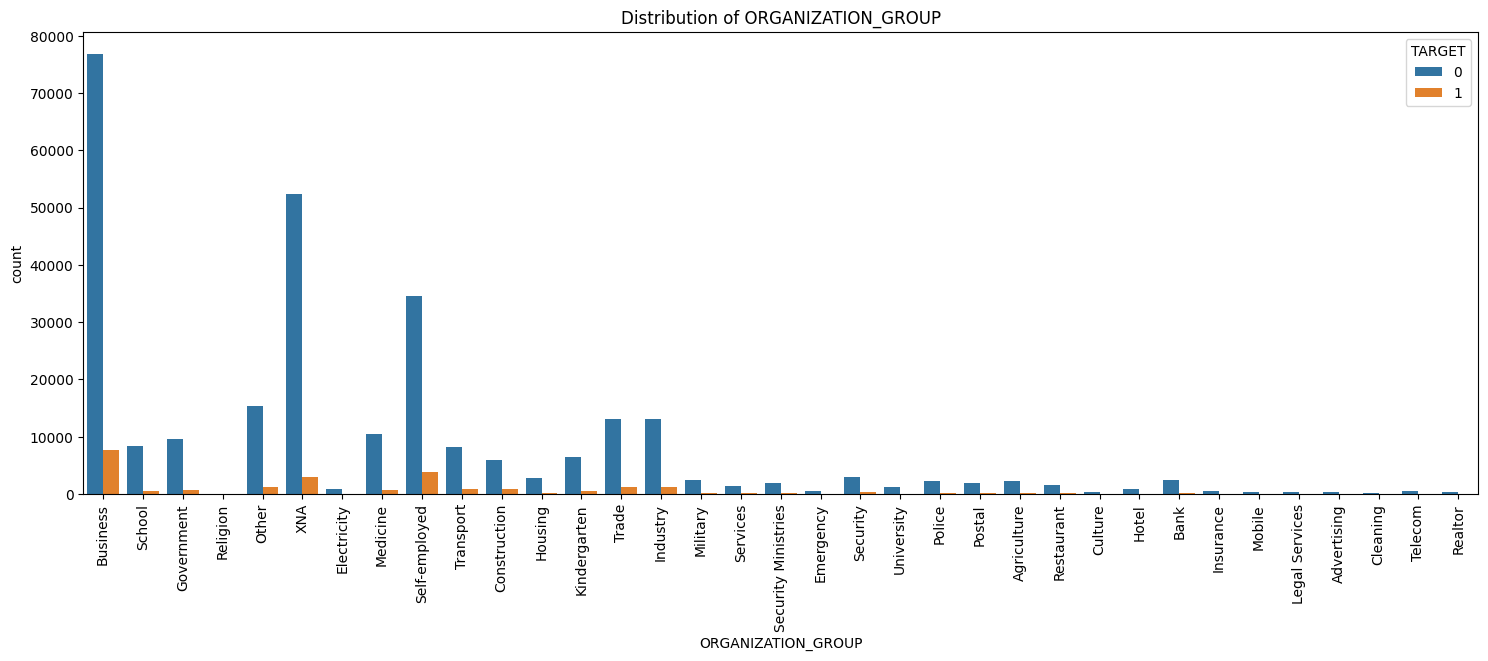

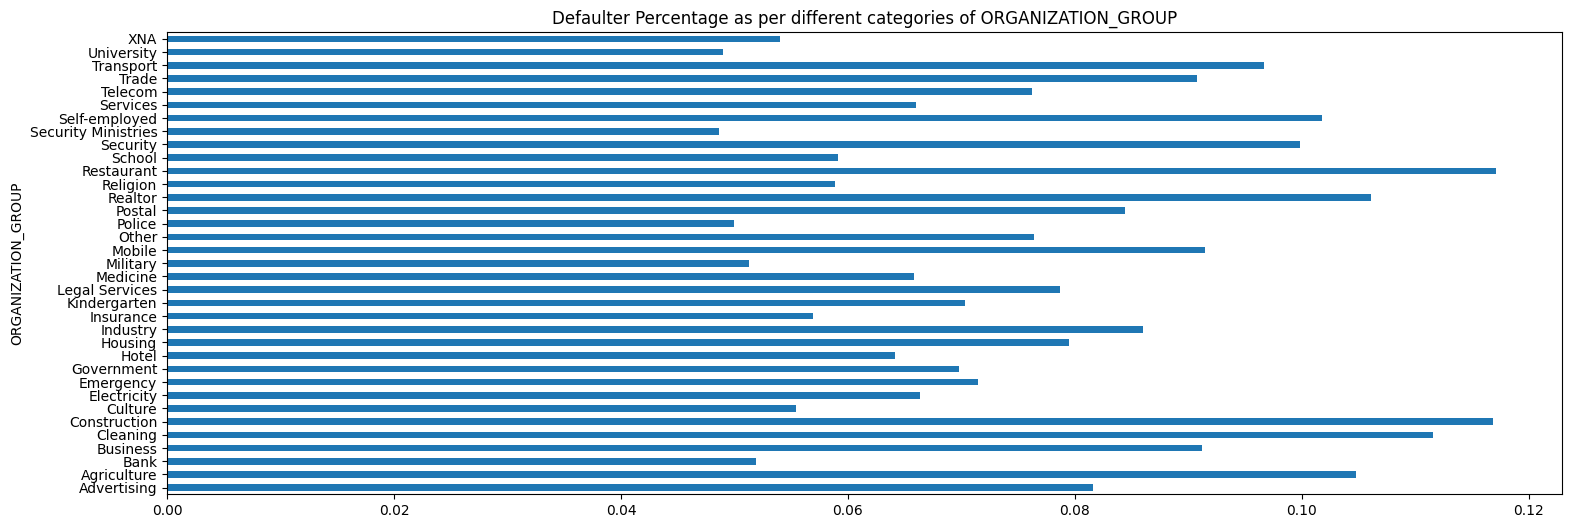


ORGANIZATION_GROUP
Advertising             8.158508
Agriculture            10.472698
Bank                    5.185481
Business                9.121130
Cleaning               11.153846
Construction           11.679810
Culture                 5.540897
Electricity             6.631579
Emergency               7.142857
Government              6.978085
Hotel                   6.418219
Housing                 7.944557
Industry                8.601775
Insurance               5.695142
Kindergarten            7.034884
Legal Services          7.868852
Medicine                6.584472
Military                5.125285
Mobile                  9.148265
Other                   7.642510
Police                  4.997864
Postal                  8.437645
Realtor                10.606061
Religion                5.882353
Restaurant             11.706240
School                  5.914764
Security                9.978442
Security Ministries     4.863222
Self-employed          10.173904
Services               

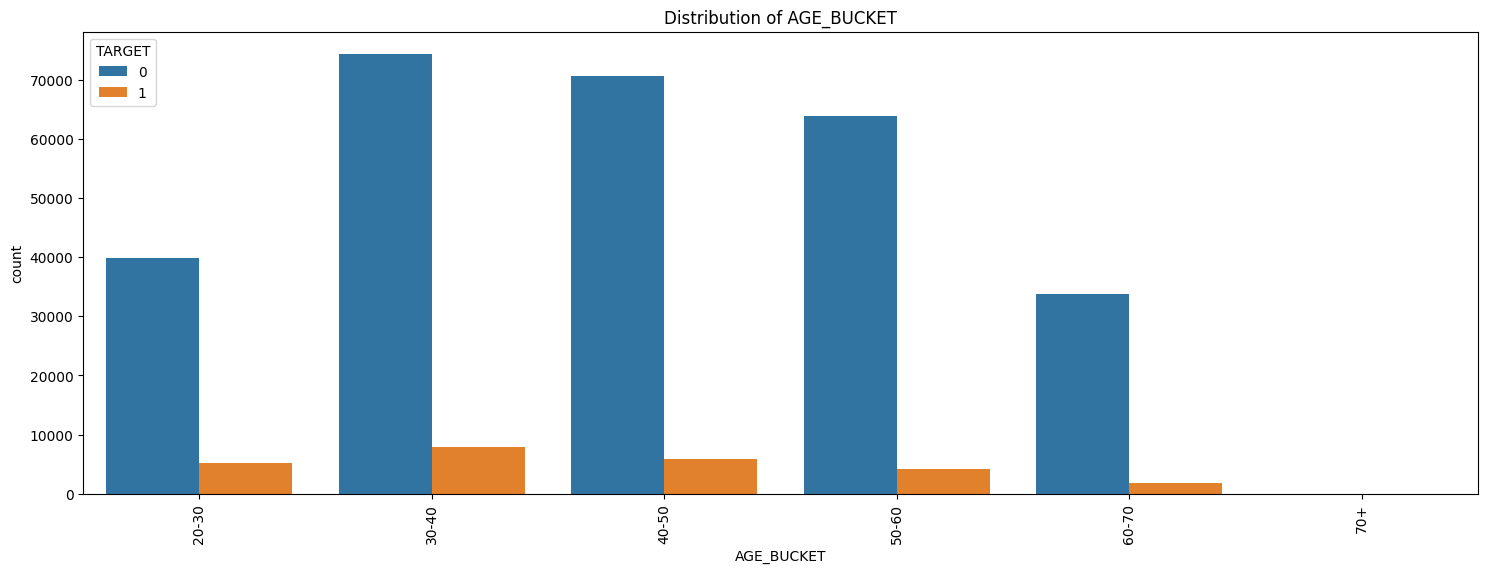

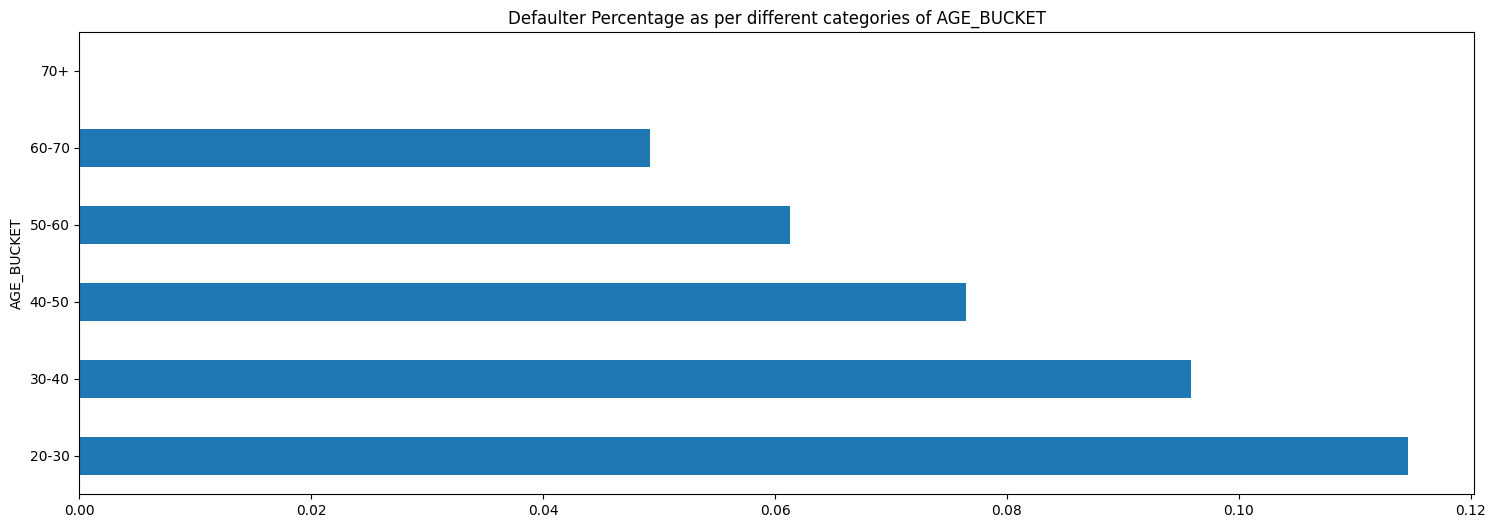


AGE_BUCKET
20-30    11.456876
30-40     9.583516
40-50     7.650802
50-60     6.129705
60-70     4.921442
70+            NaN
Name: TARGET, dtype: float64

 Plotting the Distribution for EMPLOYED_BUCKET



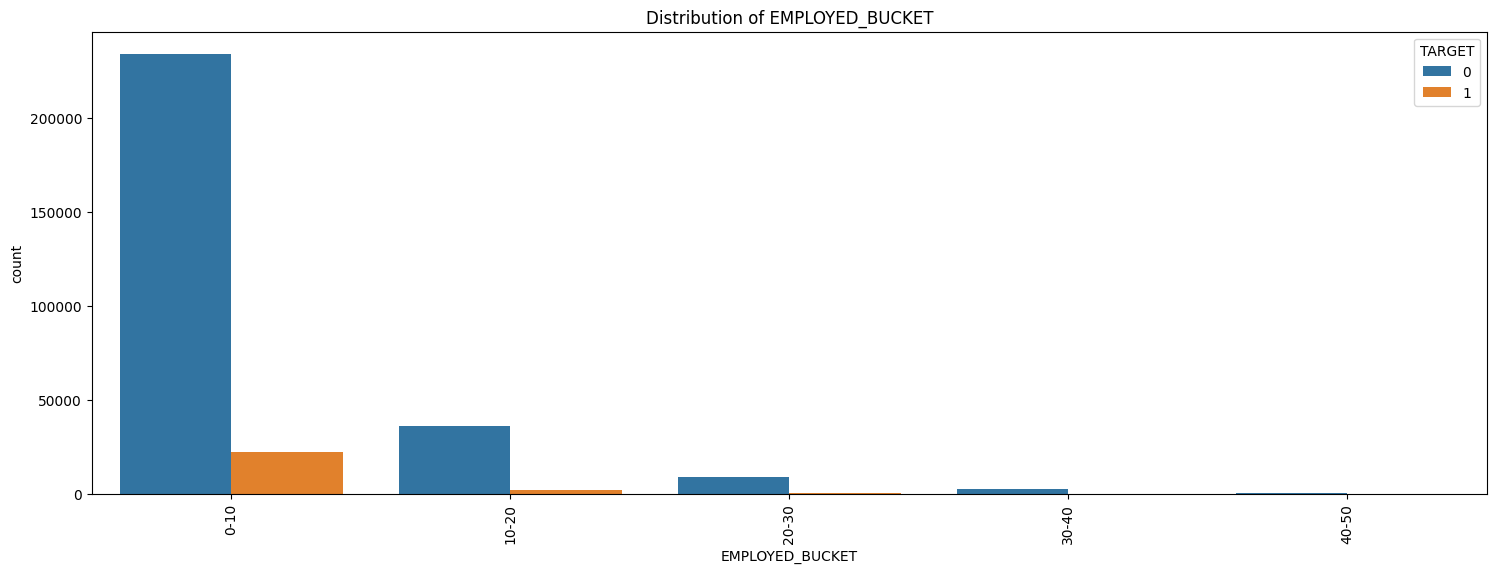

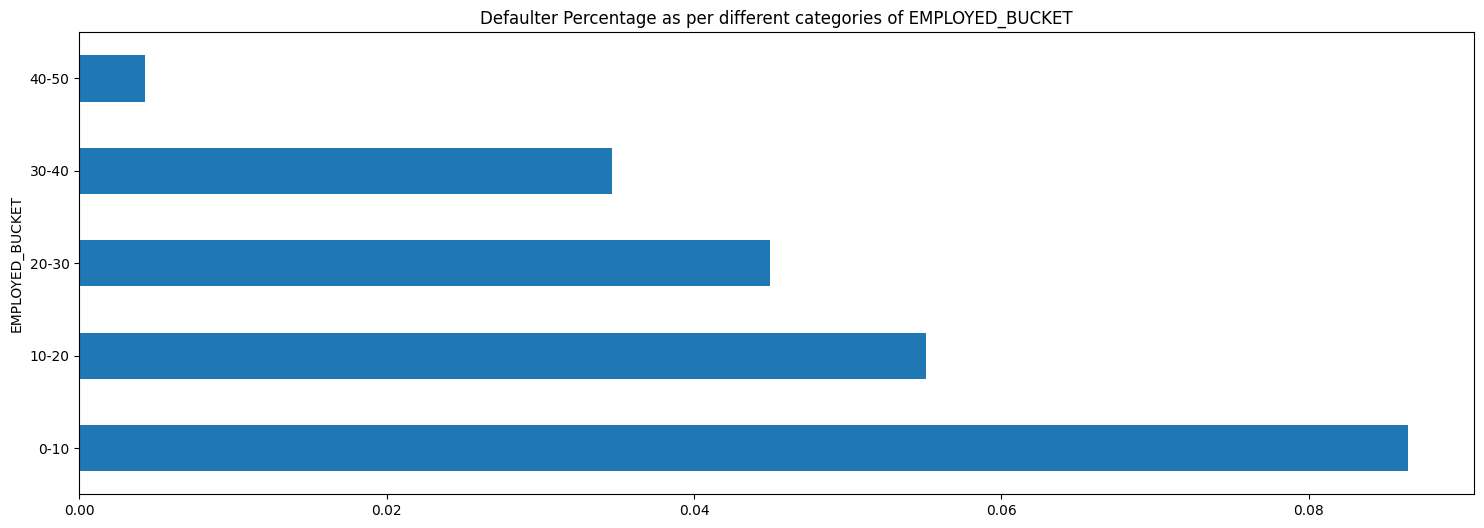


EMPLOYED_BUCKET
0-10     8.645709
10-20    5.513308
20-30    4.491676
30-40    3.464453
40-50    0.427350
Name: TARGET, dtype: float64

 Plotting the Distribution for INCOME_GROUP



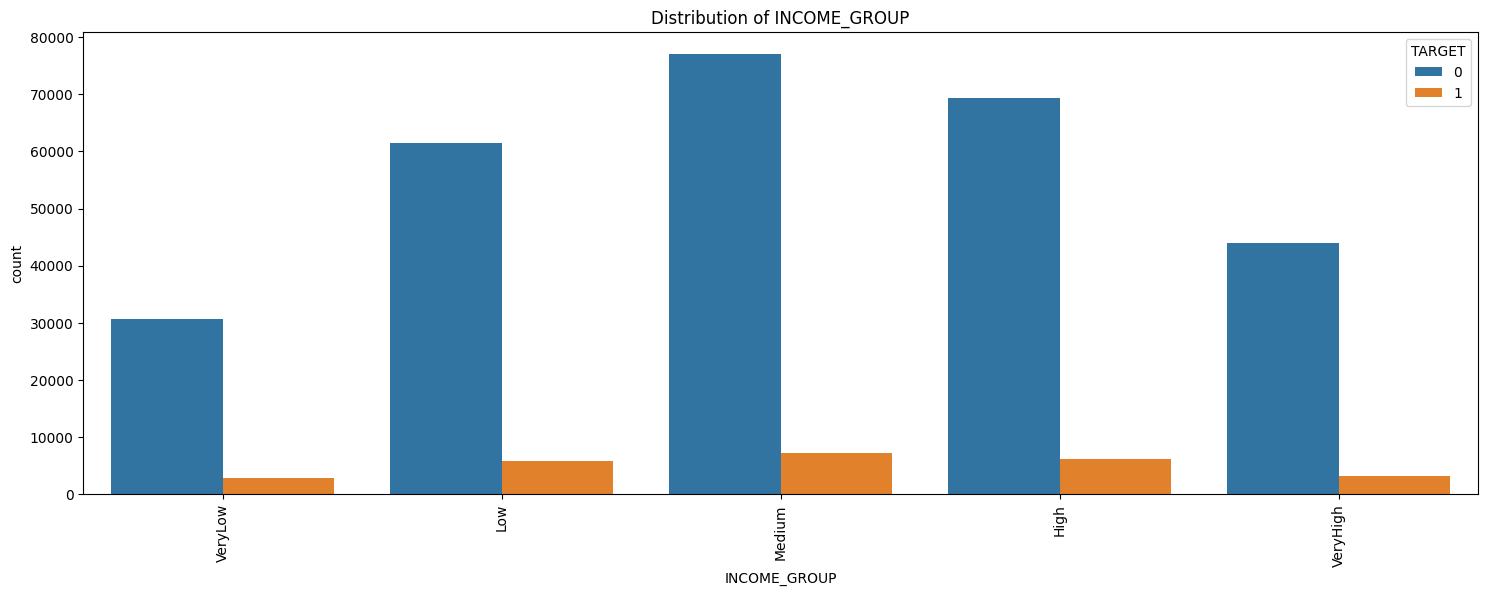

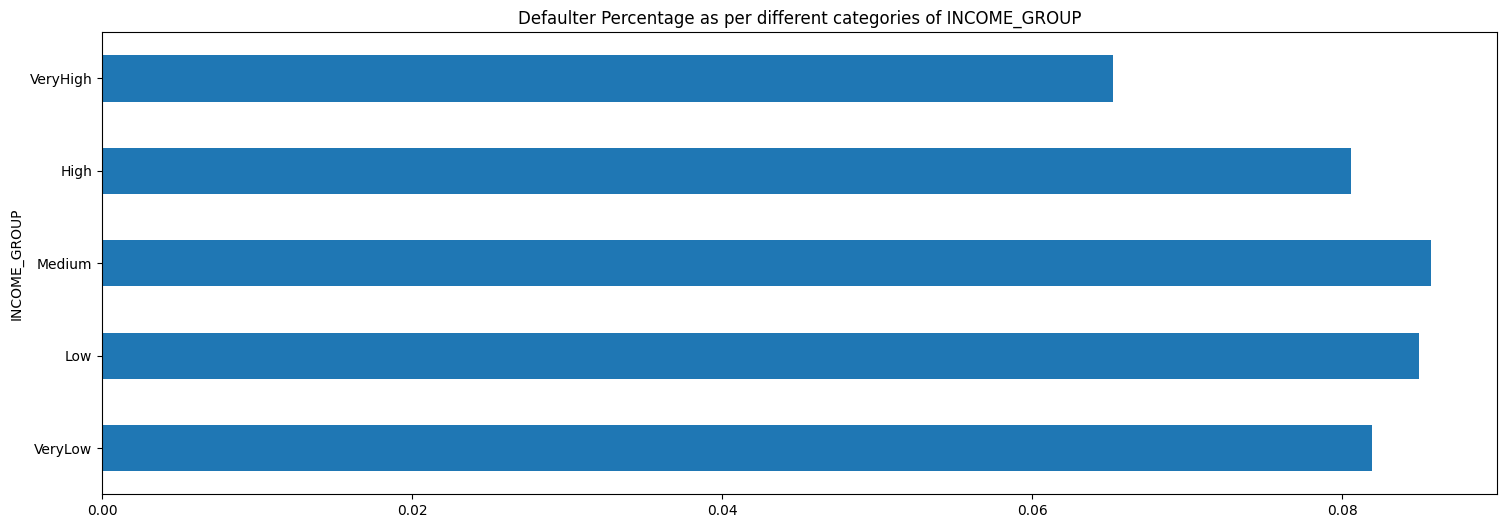


INCOME_GROUP
VeryLow     8.190830
Low         8.495691
Medium      8.571564
High        8.056891
VeryHigh    6.519801
Name: TARGET, dtype: float64



In [46]:
for i in categorical_variables:
    categorical_analysis(appdata, i)

### Continuous Analysis

#### Inferences:

•	AMT_CREDIT – distribution is similar for defaulters and non-defaulters

•	AMT_ANNUITY – distribution is similar for defaulters and non-defaulters

•	AMT_GOODS_PRICE – distribution is similar for defaulters and non-defaulters

•	REGION_POPULATION_RELATIVE – distribution is similar for defaulters and non-defaulters

•	Region Rating, Region rating with city – Mostly 2. However, this column is not of much use to us as most of the data is centered around rating ‘2’ and thus we can’t decipher a pattern from 
it.

•	DAYS_LAST_PHONE_CHANGE – distribution is similar for defaulters and non-defaulters.

•	EXT_SOURCE columns – slightly different distributions

•	Social Circle - DEF_30_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, _30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE - Show a similar trend for both defaulters and non-defaulters

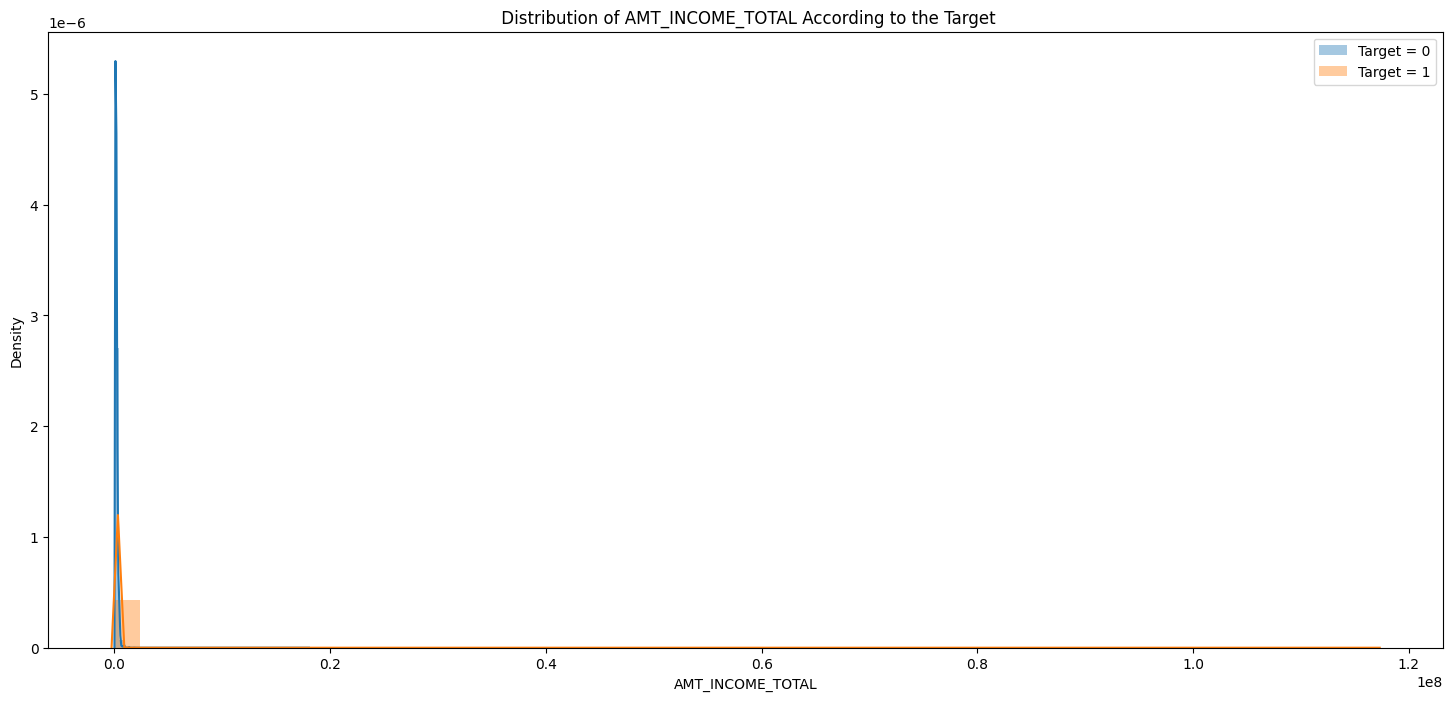

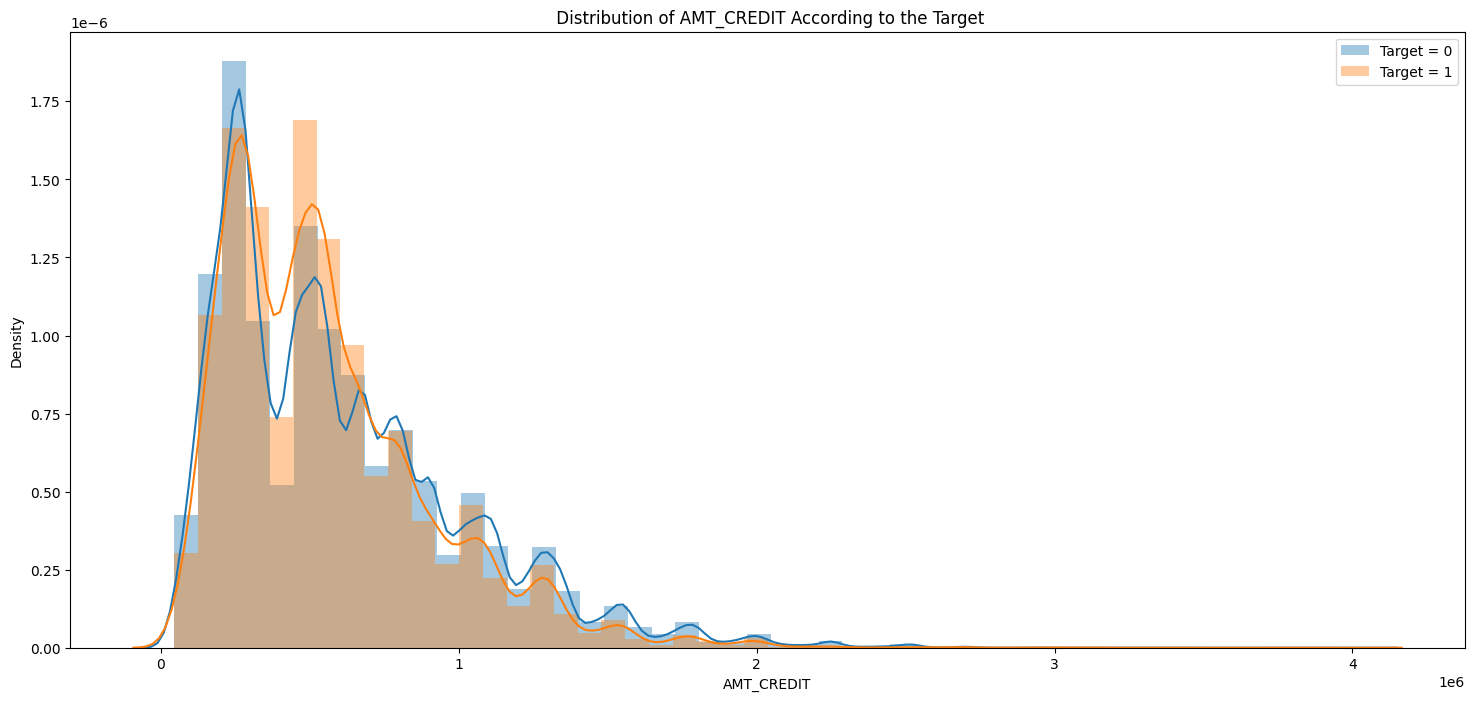

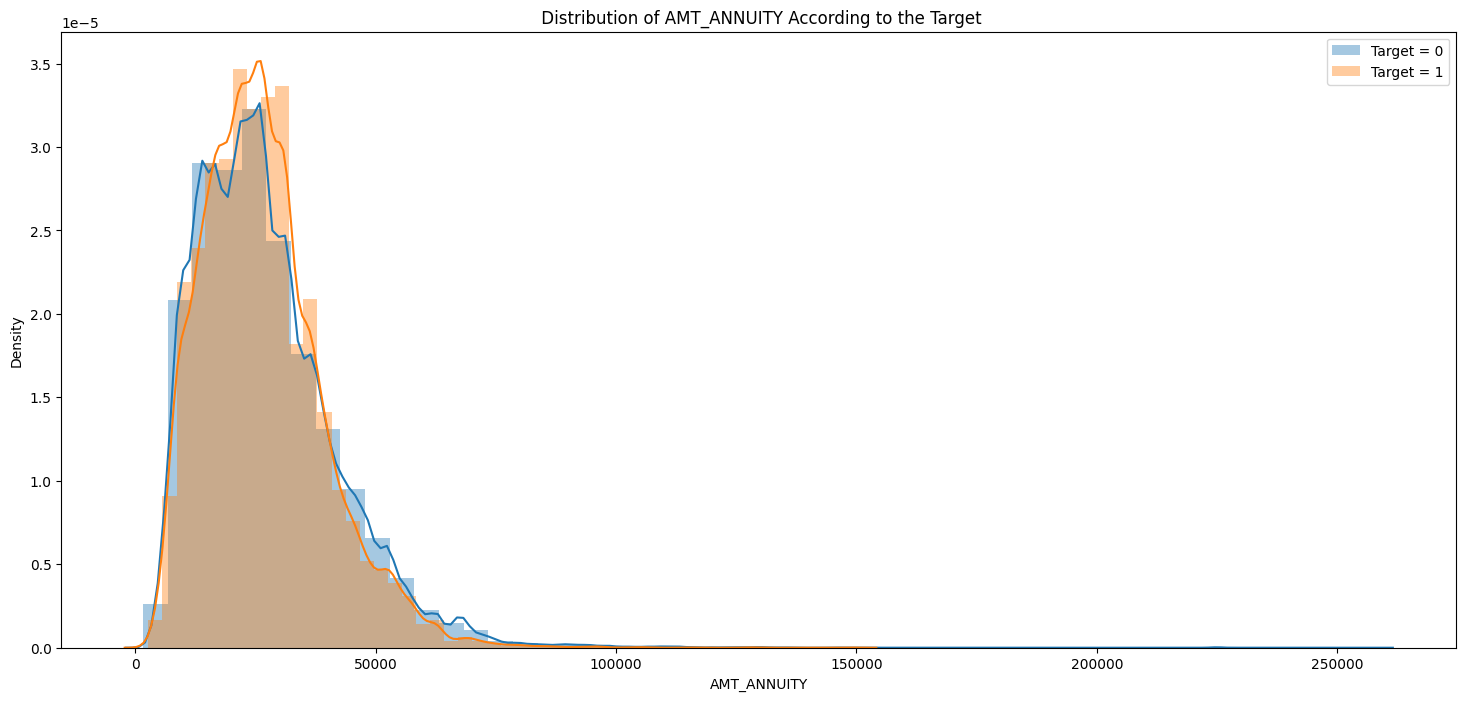

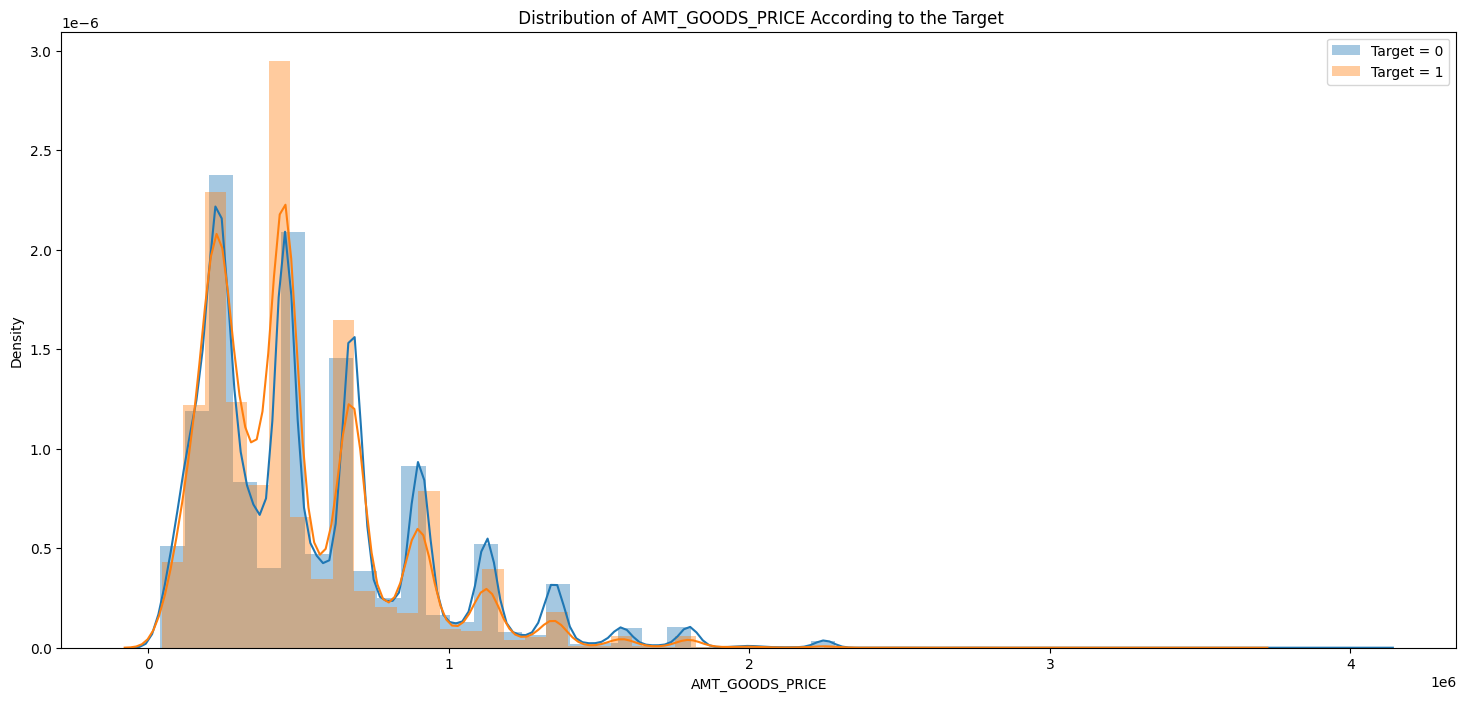

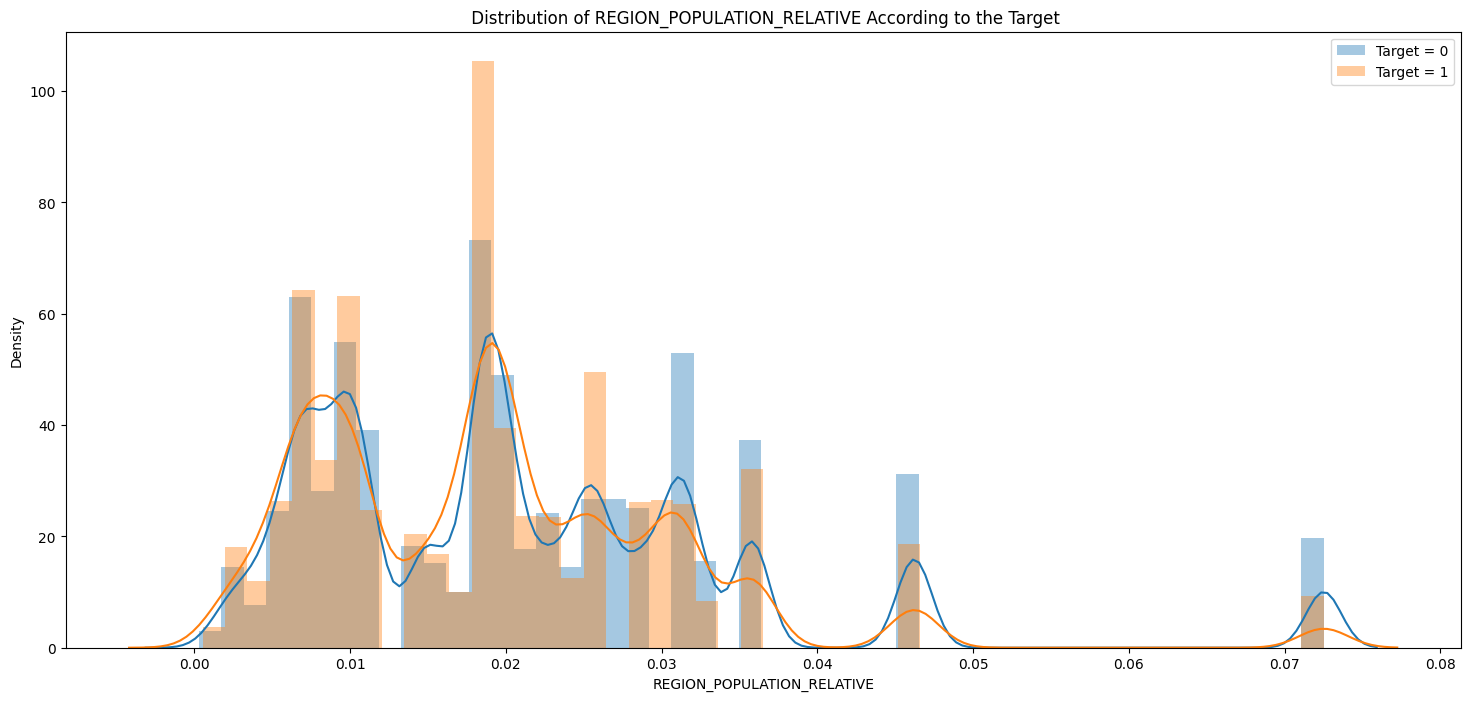

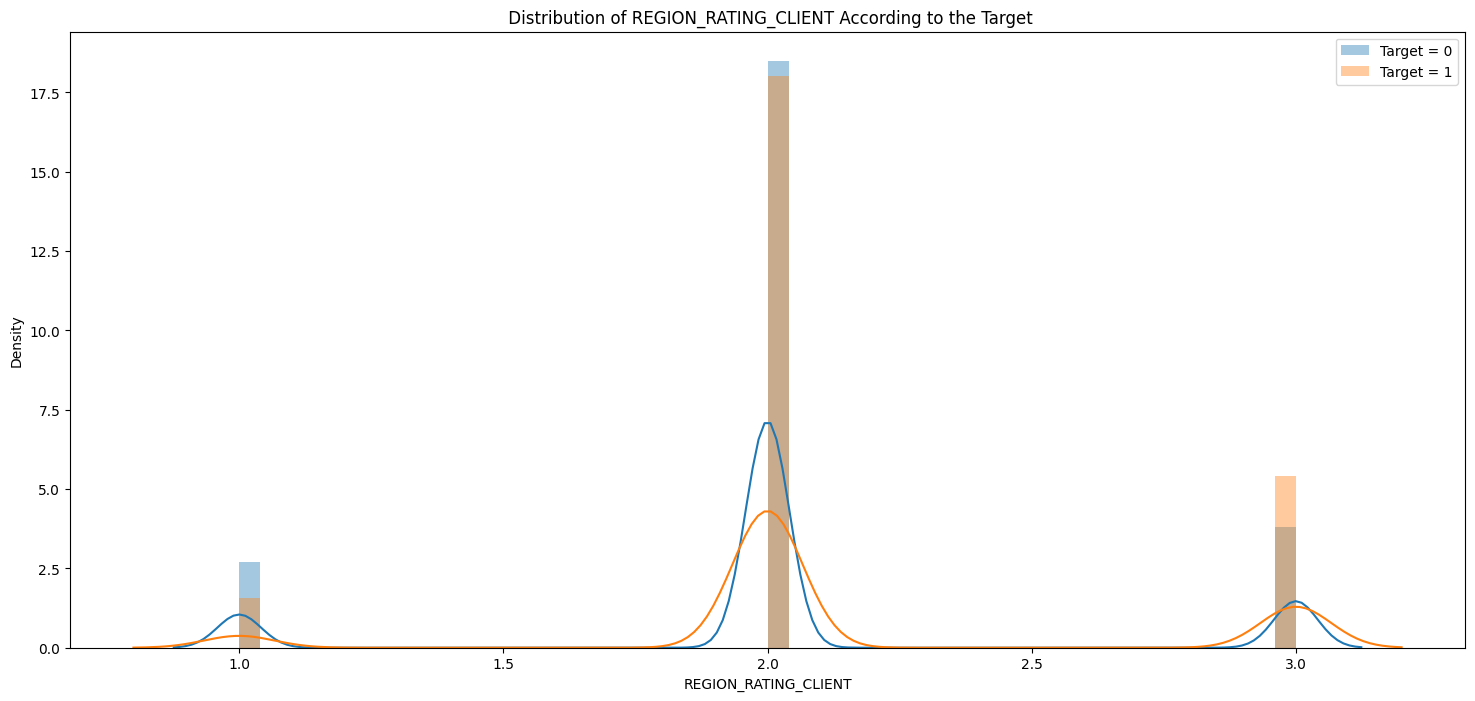

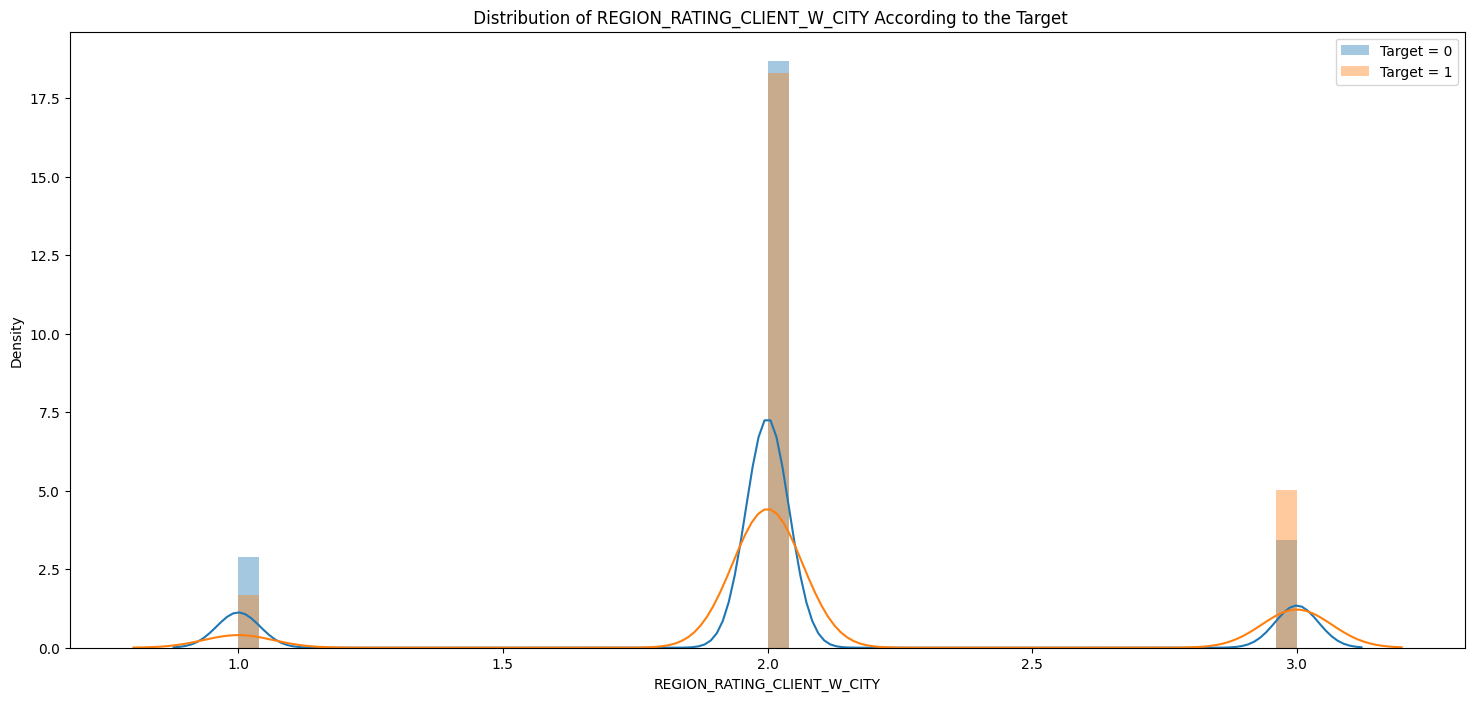

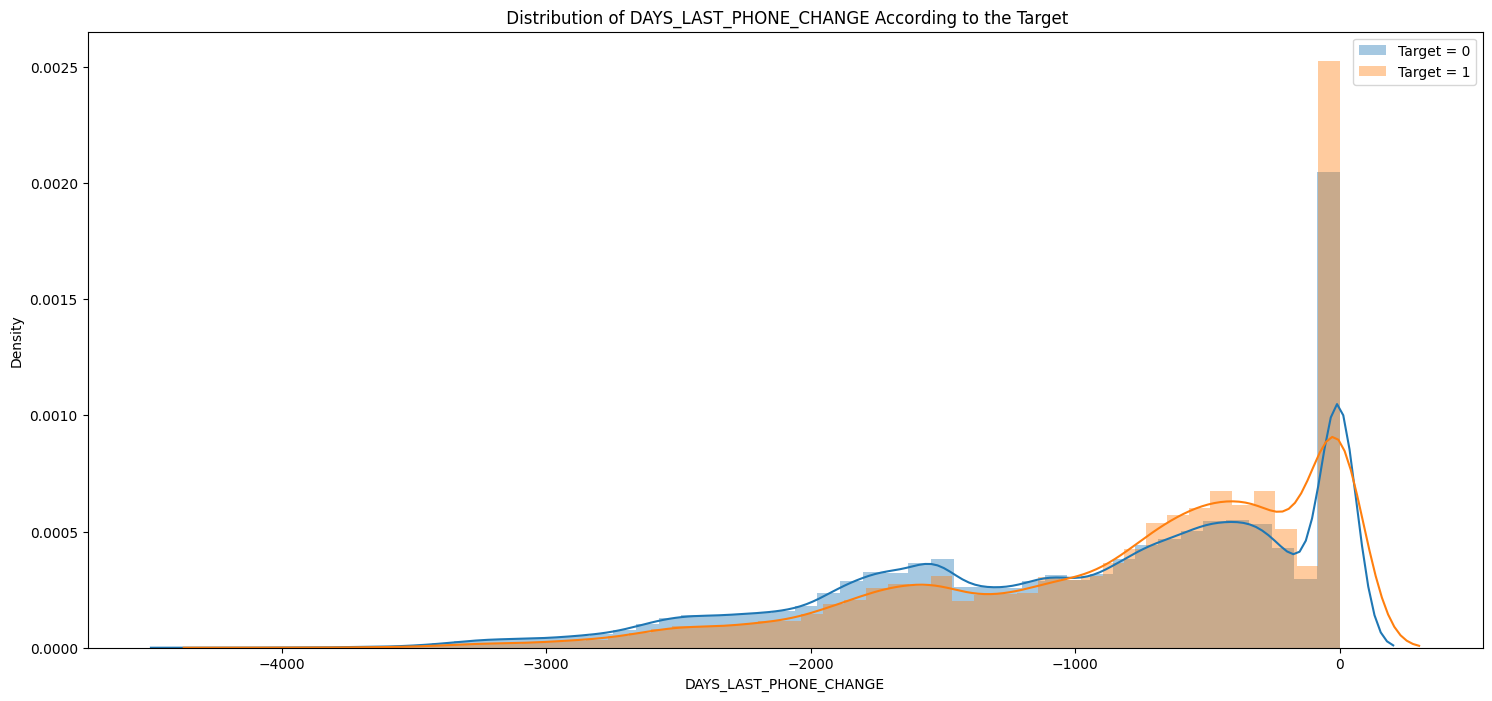

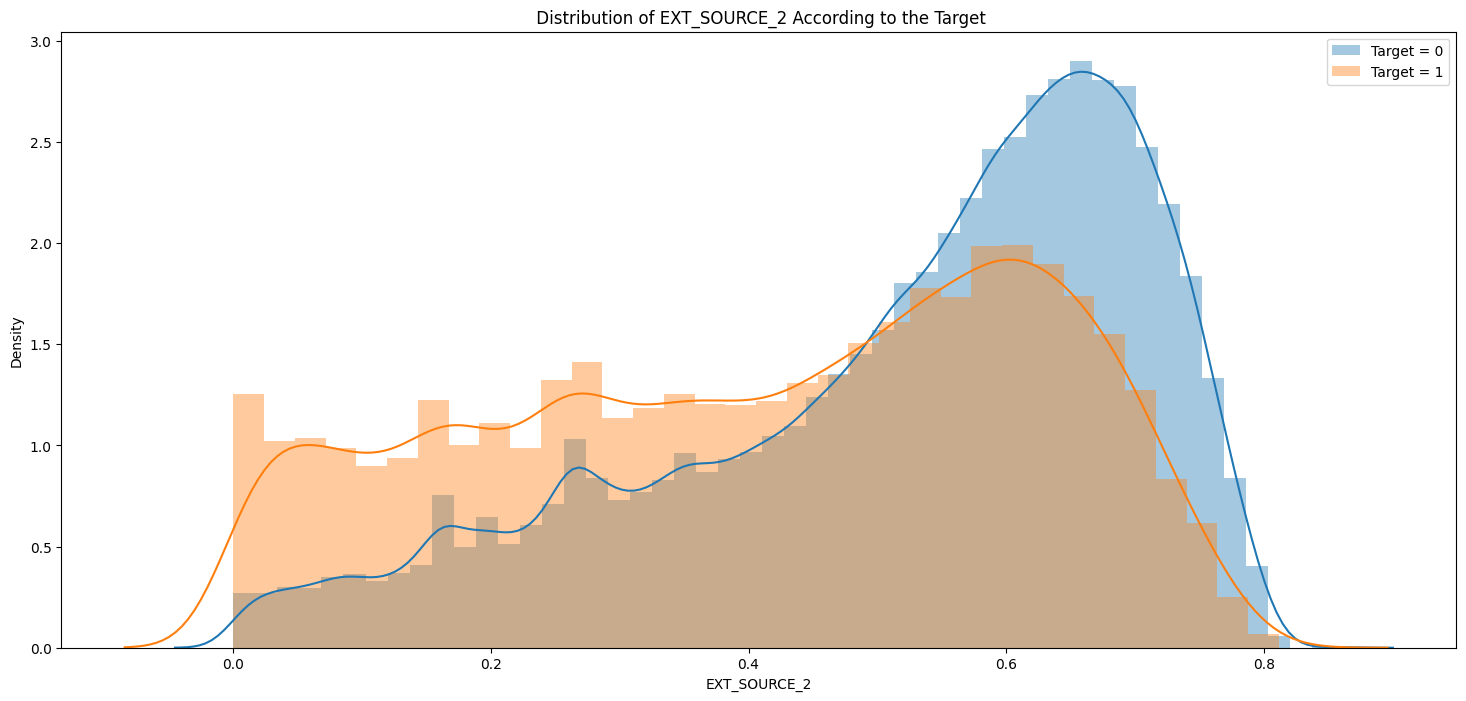

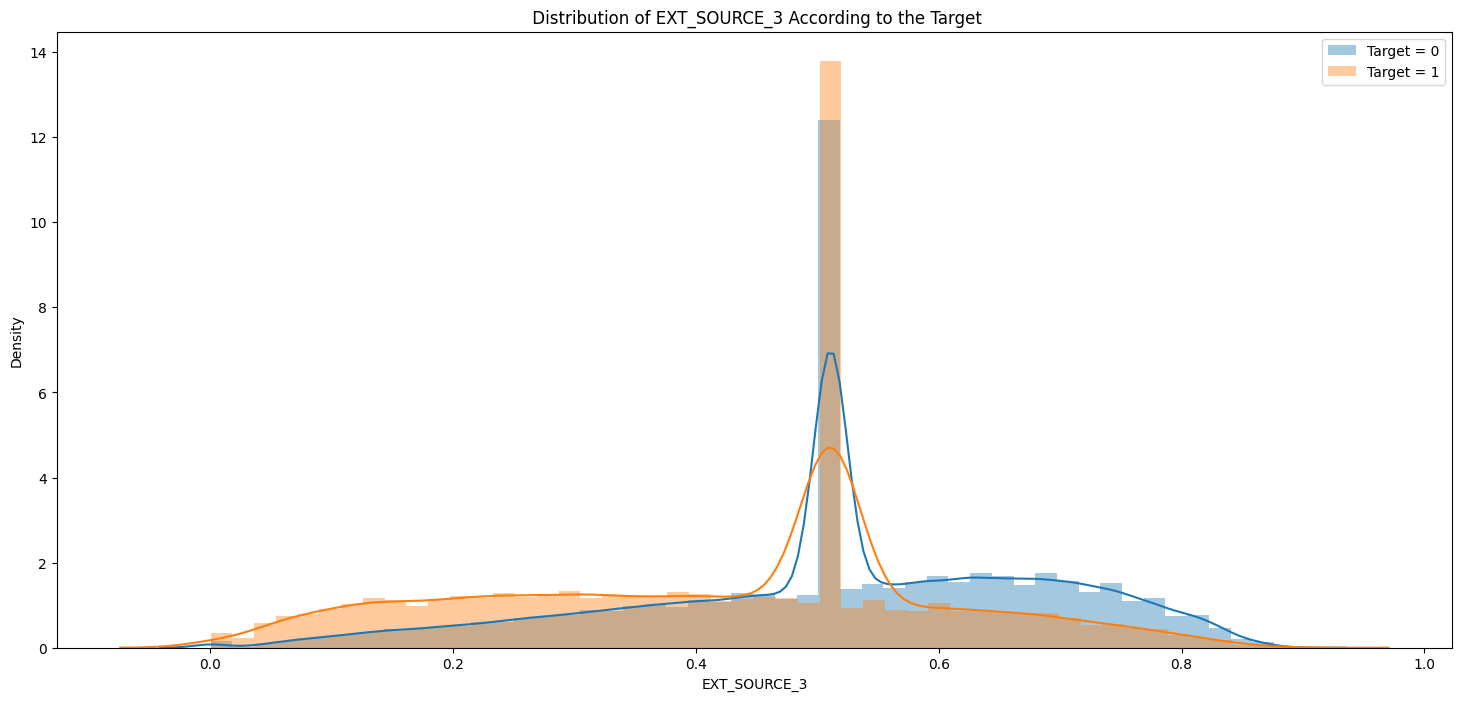

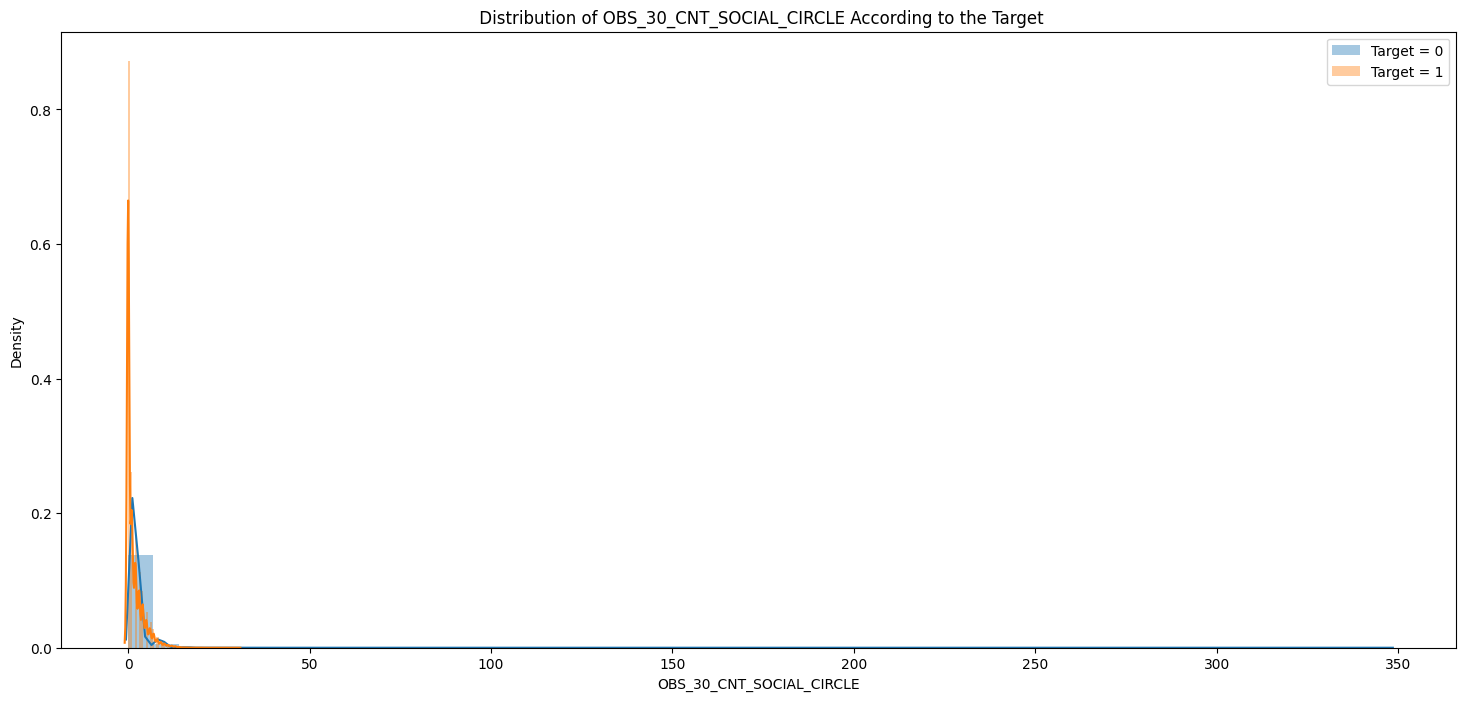

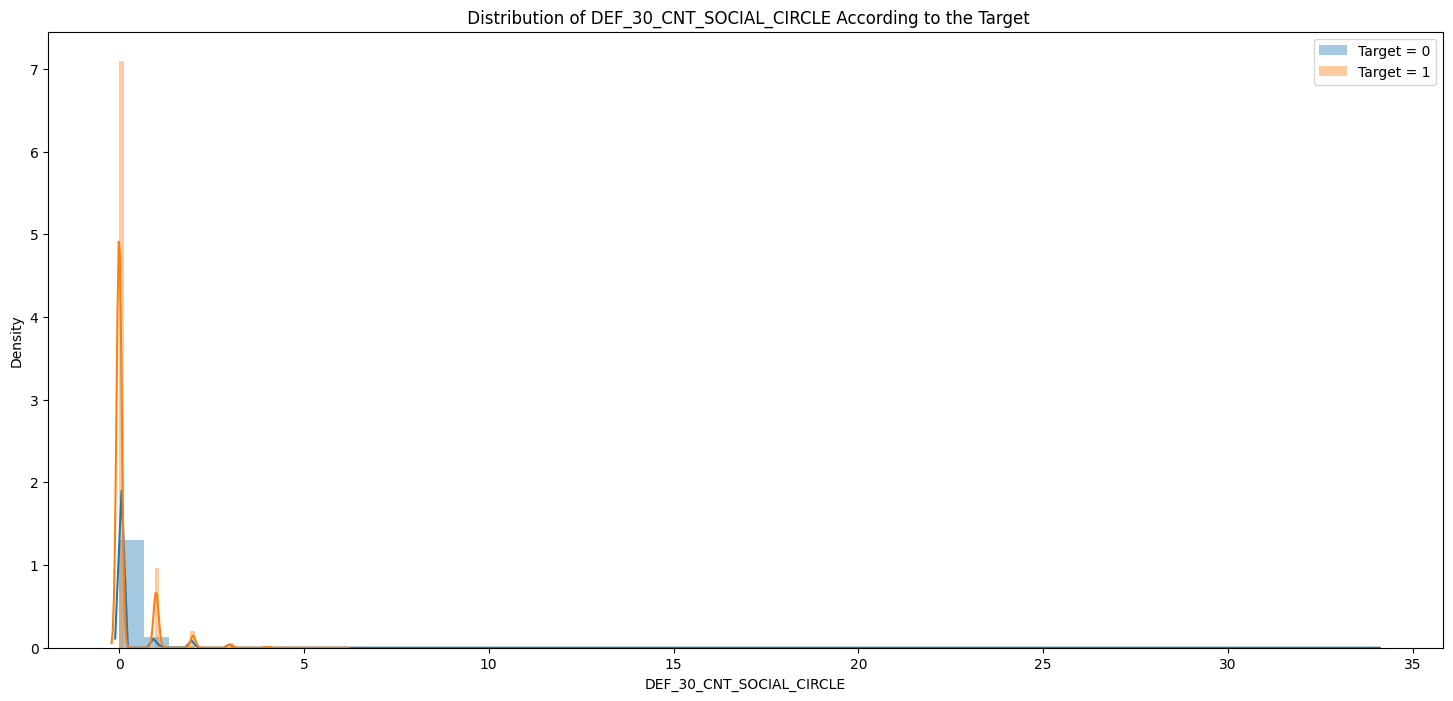

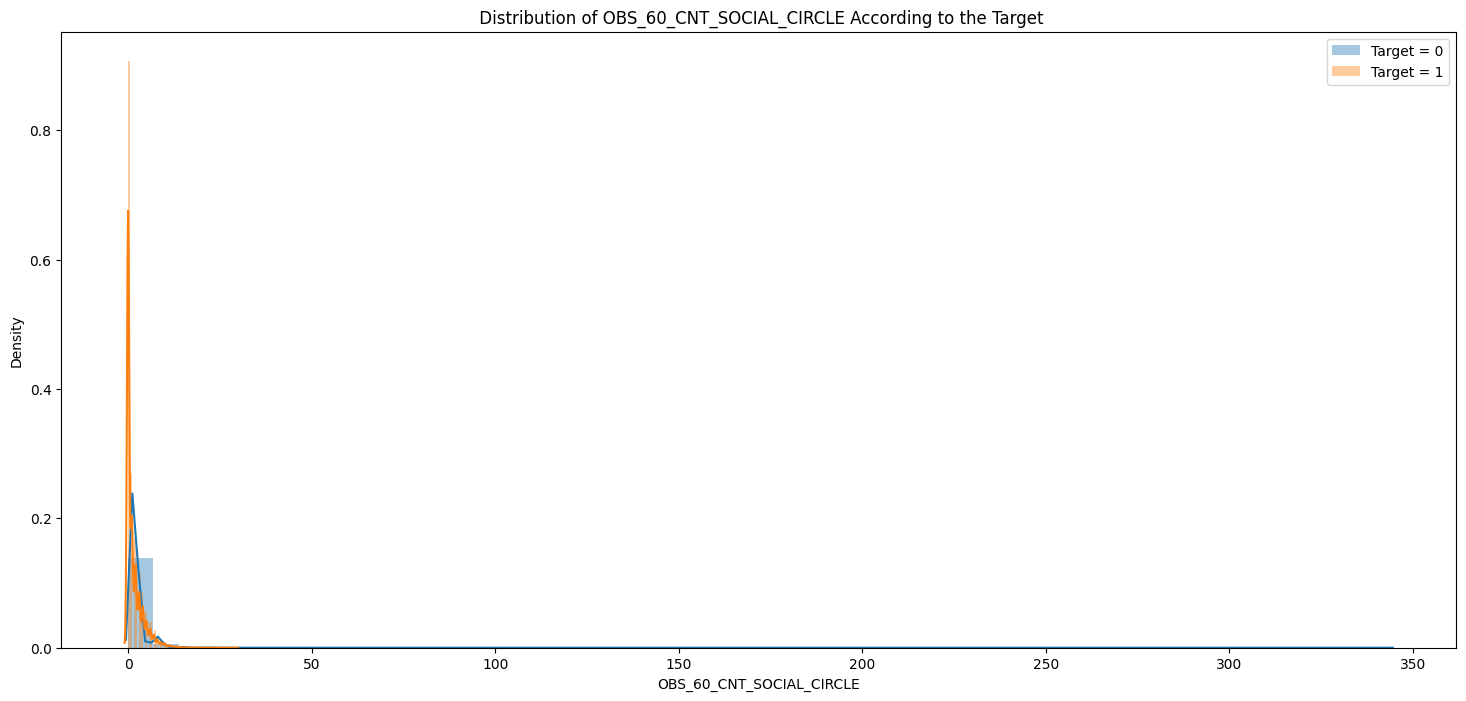

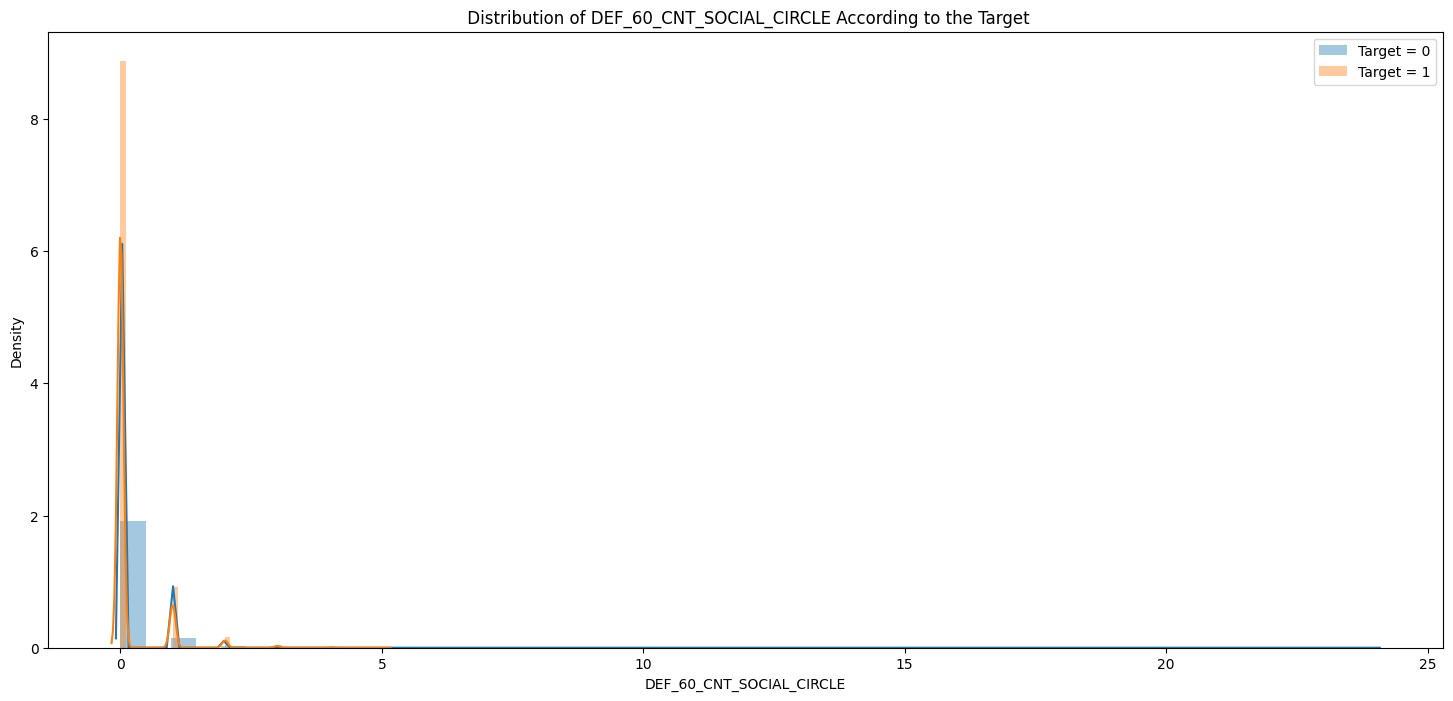

In [47]:
for i in continuous_variables:
    continuous_analysis(appdata, i)

### Correlation


#### Top 10 Correlation for Defaulters:

![image-3.png](attachment:image-3.png)



#### Top 10 Correlations for Non-Defaulters:

![image-5.png](attachment:image-5.png)


In [48]:
t0 = appdata[appdata.TARGET == 0]
t1 = appdata[appdata.TARGET == 1]

In [49]:
t0.corr().unstack().sort_values(ascending = False).drop_duplicates().head(11)

SK_ID_CURR                   SK_ID_CURR                     1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998510
AMT_GOODS_PRICE              AMT_CREDIT                     0.987022
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859371
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830381
AMT_ANNUITY                  AMT_GOODS_PRICE                0.776433
                             AMT_CREDIT                     0.771309
DAYS_BIRTH                   FLAG_EMP_PHONE                 0.622073
dtype: float64

In [50]:
t1.corr().unstack().sort_values(ascending = False).drop_duplicates().head(11)

SK_ID_CURR                   SK_ID_CURR                    1.000000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998270
AMT_GOODS_PRICE              AMT_CREDIT                    0.982783
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.885484
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.869016
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.778540
AMT_ANNUITY                  AMT_GOODS_PRICE               0.752295
AMT_CREDIT                   AMT_ANNUITY                   0.752195
DAYS_BIRTH                   FLAG_EMP_PHONE                0.578519
dtype: float64

# previous_application.csv

### Approach

#### Columns Removed:
    •Columns with more than 40% null values were removed as due to a lot of missing data, these wouldn’t have been useful.
    •WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, DAYS_DECISION were removed as well. On the basis of their column description, it didn’t seem like they were linked to target variable in any way.

#### Missing Value Imputation:
    •AMT_ANNUITY: Data seemed to have some values beyond the IQR, thus median was used to impute missing values.
    •AMT_GOODS_PRICE: Data seemed to have some values beyond the IQR, thus median was used to impute missing values.
    •CNT_PAYMENT: Data seemed to have some values beyond the IQR, thus median was used to impute missing values.
    •PRODUCT_COMBINATION: Categorical variable, thus mode was used to impute missing values.

#### Merging with application_data.csv
    •Inner join was used as we only want those rows for which target variable has data in application_data.csv
    •When right join was used, i.e., values for TARGET were fetched, TARGET had 15% null values. This means there are some entries for which current ID is there, but these entries aren't present in application_data.csv
    •Left join cannot be used as we'd then get all the entries from application_data.csv which would lead to null values in all columns. It is not necessary for every applicant to have taken a loan previously, this would make our analysis difficult.

### Results of the Analysis:
    •Contract status trends indicate that applicants whose previous loans were approved are more likely to pay current loans in time as compared to those whose previous loans were rejected.
    •Most of the loan applicants are repeater clients and refresh clients have a slightly lower default rate.
    •‘SCO’. ‘LIMIT’, ‘HC’ are the most common reasons for rejection
    •Clients whose loans were rejected due to SCOFR are very likely to default
    •Clients who applied for loans for Vehicles & Insurance goods previously have a higher chance of defaulting
    •Portfolio trends indicate that for cards defaulter percentage is the highest
    •Clients who previously applied for Walk-in loans have a higher default rate
    •Applicants who previously purchased loans sold through AP+ and Contact centres have higher default rate
    •Applicants who previously purchased loans through auto technology, connectivity or jewellery industries have a higher default rate
    •Applicants who previously purchased Cash Street and Card Street loans have higher default rate

In [51]:
!gdown "1vscEGZ6cwRPVdc-da0aWjd7lzZHRfUKc&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1vscEGZ6cwRPVdc-da0aWjd7lzZHRfUKc&confirm=t
To: /content/previous_application.csv
100% 405M/405M [00:07<00:00, 54.0MB/s]


In [52]:
prevdata = pd.read_csv("previous_application.csv")
prevdata.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [53]:
prevdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Missing Values + Dropping Unwanted Columns

In [54]:
x = round(100*prevdata.isnull().sum()/prevdata.shape[0], 2).sort_values(ascending = False)
x

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [55]:
#Dropping Columns with more than 40% Null values
prevdata.drop(list(x[x>40].index),inplace = True, axis = 1)

In [56]:
x = round(100*prevdata.isnull().sum()/prevdata.shape[0], 2).sort_values(ascending = False)
x

AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
NAME_PAYMENT_TYPE               0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
NAME_CONTRACT_TYPE              0.00
DAYS_DECISION                   0.00
dtype: float64

In [57]:
#Dropping Unwanted Columns
prevdata.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION'], axis = 1, inplace = True)

### Imputing Missing Values

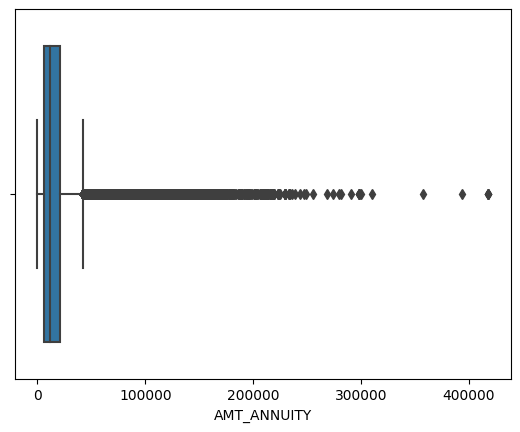

In [58]:
#AMT_ANNUITY
sns.boxplot(prevdata.AMT_ANNUITY)
plt.show()

In [59]:
#Outliers are present, therefore we'll impute using median
prevdata.AMT_ANNUITY[prevdata.AMT_ANNUITY.isnull()] = prevdata.AMT_ANNUITY.median()

In [60]:
#AMT_GOODS_PRICE
prevdata.AMT_GOODS_PRICE[prevdata.AMT_GOODS_PRICE.isnull()] = prevdata.AMT_GOODS_PRICE.median()

In [61]:
#Outliers are present, therefore we'll impute using median
prevdata.CNT_PAYMENT[prevdata.CNT_PAYMENT.isnull()] = prevdata.CNT_PAYMENT.median()

In [62]:
#PRODUCT_COMBINATION: Categorical variable, we'll impute using mode
prevdata.PRODUCT_COMBINATION[prevdata.PRODUCT_COMBINATION.isnull()] = prevdata.PRODUCT_COMBINATION.mode()[0]

In [63]:
x = round(100*prevdata.isnull().sum()/prevdata.shape[0], 2).sort_values(ascending = False)
x

SK_ID_PREV                0.0
NAME_CLIENT_TYPE          0.0
NAME_YIELD_GROUP          0.0
CNT_PAYMENT               0.0
NAME_SELLER_INDUSTRY      0.0
SELLERPLACE_AREA          0.0
CHANNEL_TYPE              0.0
NAME_PRODUCT_TYPE         0.0
NAME_PORTFOLIO            0.0
NAME_GOODS_CATEGORY       0.0
CODE_REJECT_REASON        0.0
SK_ID_CURR                0.0
NAME_PAYMENT_TYPE         0.0
NAME_CONTRACT_STATUS      0.0
NAME_CASH_LOAN_PURPOSE    0.0
AMT_GOODS_PRICE           0.0
AMT_CREDIT                0.0
AMT_APPLICATION           0.0
AMT_ANNUITY               0.0
NAME_CONTRACT_TYPE        0.0
PRODUCT_COMBINATION       0.0
dtype: float64

## Merging with application_data.csv

Inner join has been used as we only want those rows for which TARGET variable exists.

When right join was used, i.e., values for TARGET were fetched, TARGET had 15% null values. This means there are some entries for which current ID is there, but these entries aren't present in application_data.csv

Left join cannot be used as we'd then get all the entries from application_data.csv which would lead to null values in all columns. It is not necessary for every applicant to have taken a loan previously, this would make our analysis difficult.

In [64]:
"""appdata = pd.read_csv('application_data.csv')
appdata.head(2)"""

"appdata = pd.read_csv('application_data.csv')\nappdata.head(2)"

In [65]:
prevdata = pd.merge(appdata[['SK_ID_CURR', 'TARGET']], prevdata, how = 'inner', on = ['SK_ID_CURR'])
prevdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1413701 non-null  int64  
 1   TARGET                  1413701 non-null  int64  
 2   SK_ID_PREV              1413701 non-null  int64  
 3   NAME_CONTRACT_TYPE      1413701 non-null  object 
 4   AMT_ANNUITY             1413701 non-null  float64
 5   AMT_APPLICATION         1413701 non-null  float64
 6   AMT_CREDIT              1413700 non-null  float64
 7   AMT_GOODS_PRICE         1413701 non-null  float64
 8   NAME_CASH_LOAN_PURPOSE  1413701 non-null  object 
 9   NAME_CONTRACT_STATUS    1413701 non-null  object 
 10  NAME_PAYMENT_TYPE       1413701 non-null  object 
 11  CODE_REJECT_REASON      1413701 non-null  object 
 12  NAME_CLIENT_TYPE        1413701 non-null  object 
 13  NAME_GOODS_CATEGORY     1413701 non-null  object 
 14  NA

## Analysis

In [66]:
column_description = pd.read_csv('columns_description.csv', encoding = 'cp1252')
column_description.head(2)

Unnamed: 0             Table         Row                                        Description Special
0           1  application_data  SK_ID_CURR                           ID of loan in our sample     NaN
1           2  application_data      TARGET  Target variable (1 - client with payment diffi...     NaN

In [67]:
def categorical_analysis(df, name):
    
    
    
    print(" Plotting the Distribution for "+str(name))
    try:
        print("Description -> "+(column_description[(column_description.Row == name) & (column_description.Table == 'previous_application.csv')]['Description'].iloc[0]))
    except:
        None
    print()
    
    plt.figure(figsize = (18,6))
    sns.countplot(x = name, hue = 'TARGET', data = df)
    plt.title("Distribution of "+name)
    plt.xticks(rotation = 90)

    plt.show()
    print()

    plt.figure(figsize = (18,6))
    df.groupby(name)['TARGET'].mean().plot.barh()
    plt.title("Defaulter Percentage as per different categories of "+name)
    plt.show()
    
    print()
    
    print(df.groupby(name)['TARGET'].mean()*100)
    
    print()
    
def continuous_analysis(df, name):
    try:
        print("Description -> "+(column_description[(column_description.Row == name) & (column_description.Table == 'previous_application.csv')]['Description'].iloc[0]))
    except:
        None
    
    print()

    plt.figure(figsize = (18,8))
    sns.distplot(df[df['TARGET']==0][name], label = "Target = 0")
    sns.distplot(df[df['TARGET']==1][name], label = "Target = 1")
    plt.title(" Distribution of "+name+" According to the Target")
    
    plt.legend()

    plt.show()

In [68]:
categorical_variables =  ['NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE','CODE_REJECT_REASON', 
                          'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE','NAME_CONTRACT_TYPE', 'NAME_SELLER_INDUSTRY', 
                          'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
continuous_variables = [ 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA', 'CNT_PAYMENT']

### Categorical Analysis

#### Inferences:

•	NAME_CASH_LOAN_PURPOSE

    o	Most of the data is XAP or XNA due to which no analysis can be done on this column

•	NAME_CONTRACT_STATUS

    o	Most of the loans were approved.
    o	Default rates are higher (12%) for those applicants for whom previous loans were refused
    o	Default rates are lower (7.5%) for those applicants for whom previous loans were approved
    o	The applicants whose previous loans were approved are more likely to pay current loan in time, than the applicants whose previous loans were rejected. 
    NAME_CONTRACT_STATUS is an important feature.

•	NAME_PAYMENT_TYPE

    o	This column has a lot of missing values as well.
    o	Default rates are similar for all payment types

•	NAME_CLIENT_TYPE

    o	Most of the applicants are repeater clients. This means that the bank’s services are good as they attract repeat clientele
    o	Refresh clients have a slightly lower default rate, however, most of the default rates are similar

•	CODE_REJECT_REASON

    o	‘SCO’. ‘LIMIT’, ‘HC’ are the most common reasons for rejection
    o	Clients whose loans were rejected due to SCOFR are very likely to default

•	NAME_GOODS_CATEGORY

    o	Most clients did not mention these goods. Such clients had higher default rates
    o	Clients who applied for loans for Vehicles & Insurance goods previously have a higher chance of defaulting

•	NAME_PORTFOLIO

    o	For cards, defaulter percentage is the highest (17%)
    o	This is an important feature

•	NAME_PRODUCT_TYPE
    
    o	Clients who applied for Walk-in loans have a higher default rate 

•	CHANNEL_TYPE
    
    o	Most of the loans were sold through credit and cash offices
    o	Applicants who purchased loans sold through AP+ and Contact centres have higher default rate

•	NAME_CONTRACT_TYPE

    o	Revolving Loans have slightly higher default rate

•	NAME_SELLER_INDUSTRY

    o	Applicants who purchased loans through auto technology, connectivity or jewellery industries have a higher default rate

•	NAME_YIELD_GROUP

    o	Higher interest rate leads to higher default rates

•	PRODUCT_COMBINATION
    
    o	Applicants who purchased Cash Street and Card Street loans have higher default rate


 Plotting the Distribution for NAME_CASH_LOAN_PURPOSE
Description -> Purpose of the cash loan



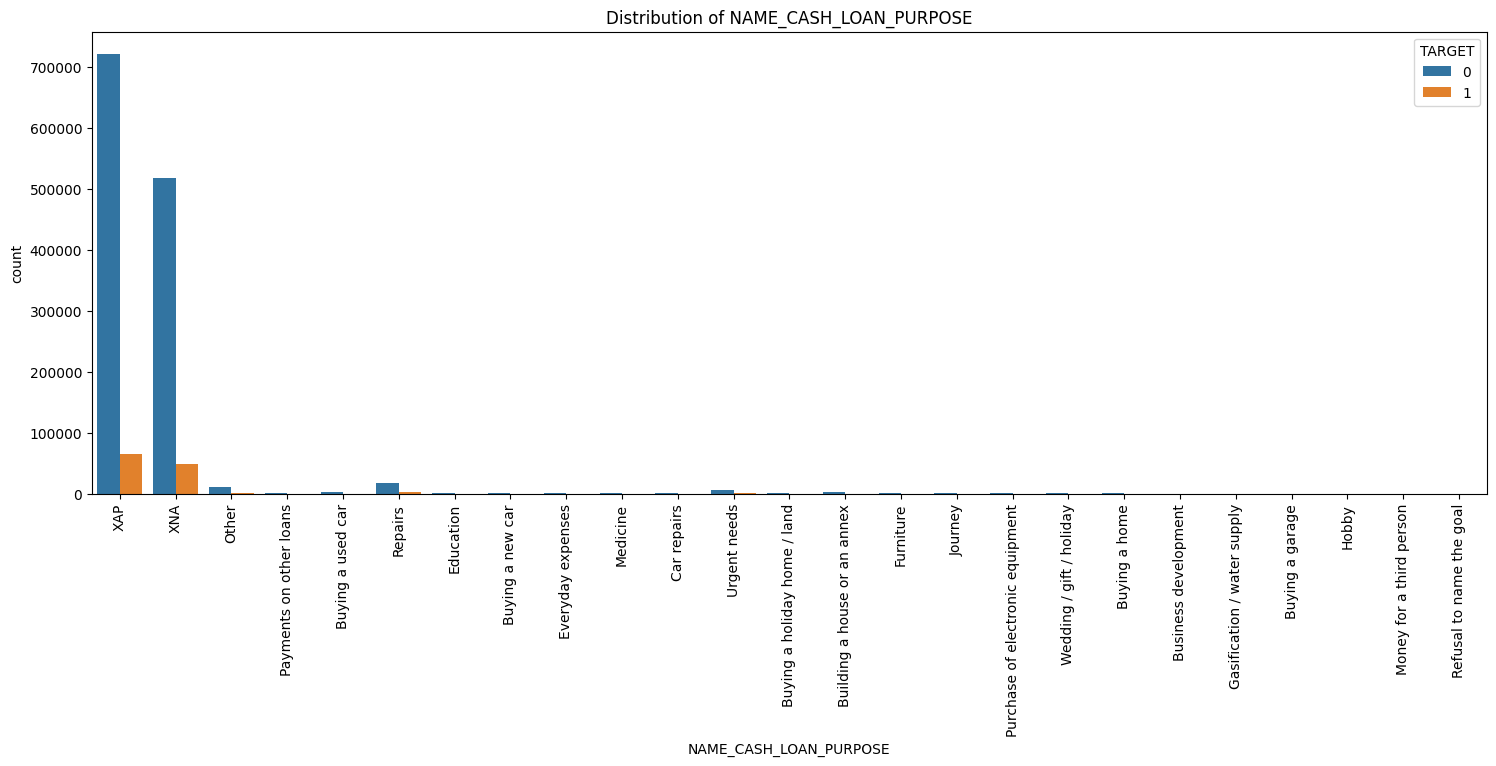

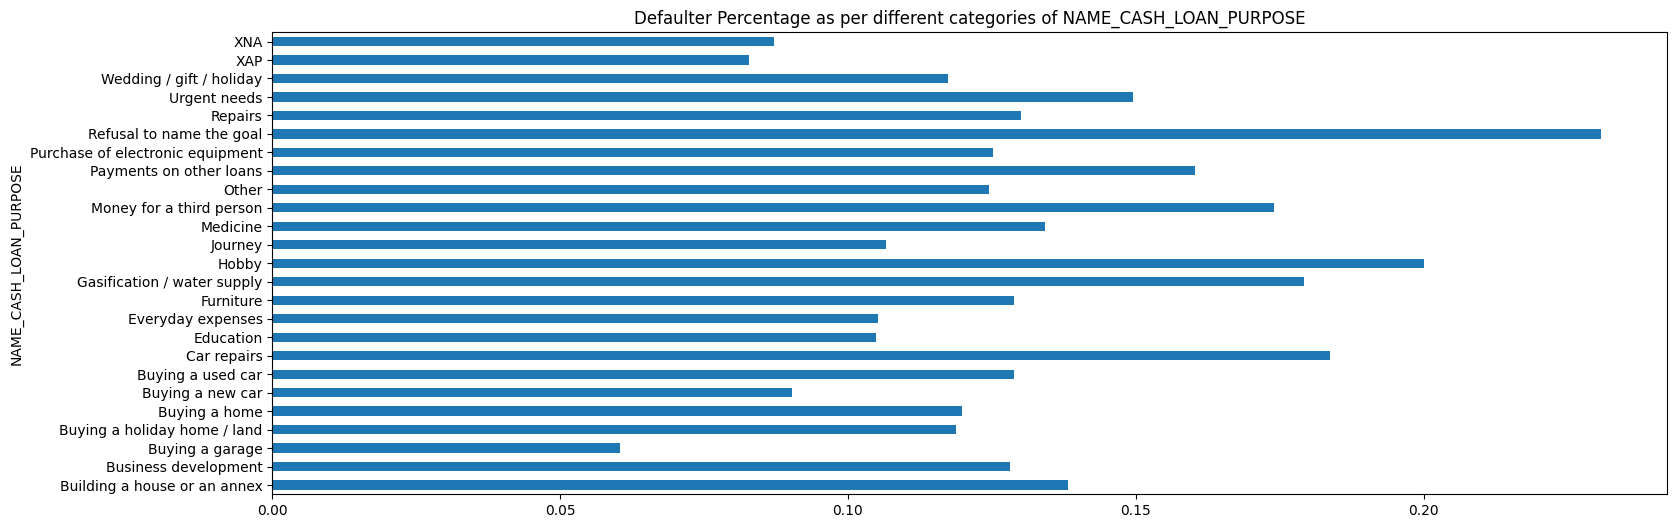


NAME_CASH_LOAN_PURPOSE
Building a house or an annex        13.822526
Business development                12.813370
Buying a garage                      6.034483
Buying a holiday home / land        11.879050
Buying a home                       11.982882
Buying a new car                     9.029345
Buying a used car                   12.879708
Car repairs                         18.379161
Education                           10.494753
Everyday expenses                   10.526316
Furniture                           12.878788
Gasification / water supply         17.928287
Hobby                               20.000000
Journey                             10.652591
Medicine                            13.415286
Money for a third person            17.391304
Other                               12.455331
Payments on other loans             16.020343
Purchase of electronic equipment    12.526767
Refusal to name the goal            23.076923
Repairs                             13.003927
Urgent nee

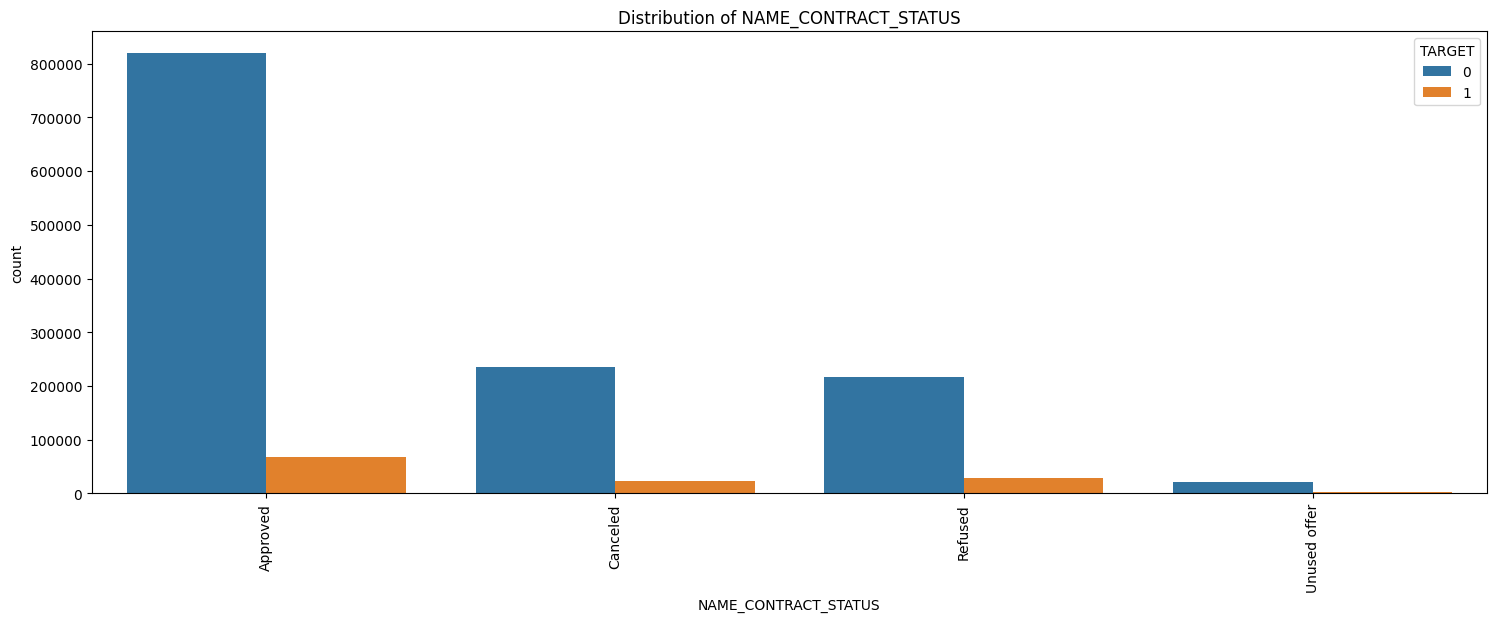

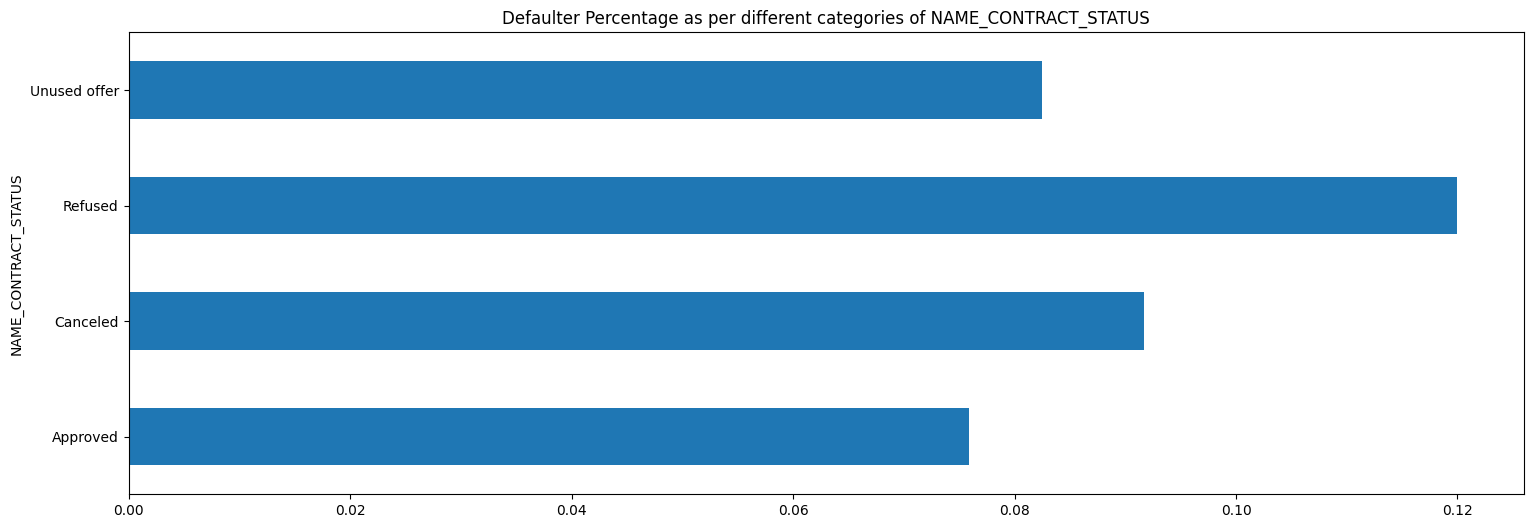


NAME_CONTRACT_STATUS
Approved         7.588655
Canceled         9.173569
Refused         11.996414
Unused offer     8.251724
Name: TARGET, dtype: float64

 Plotting the Distribution for NAME_PAYMENT_TYPE
Description -> Payment method that client chose to pay for the previous application



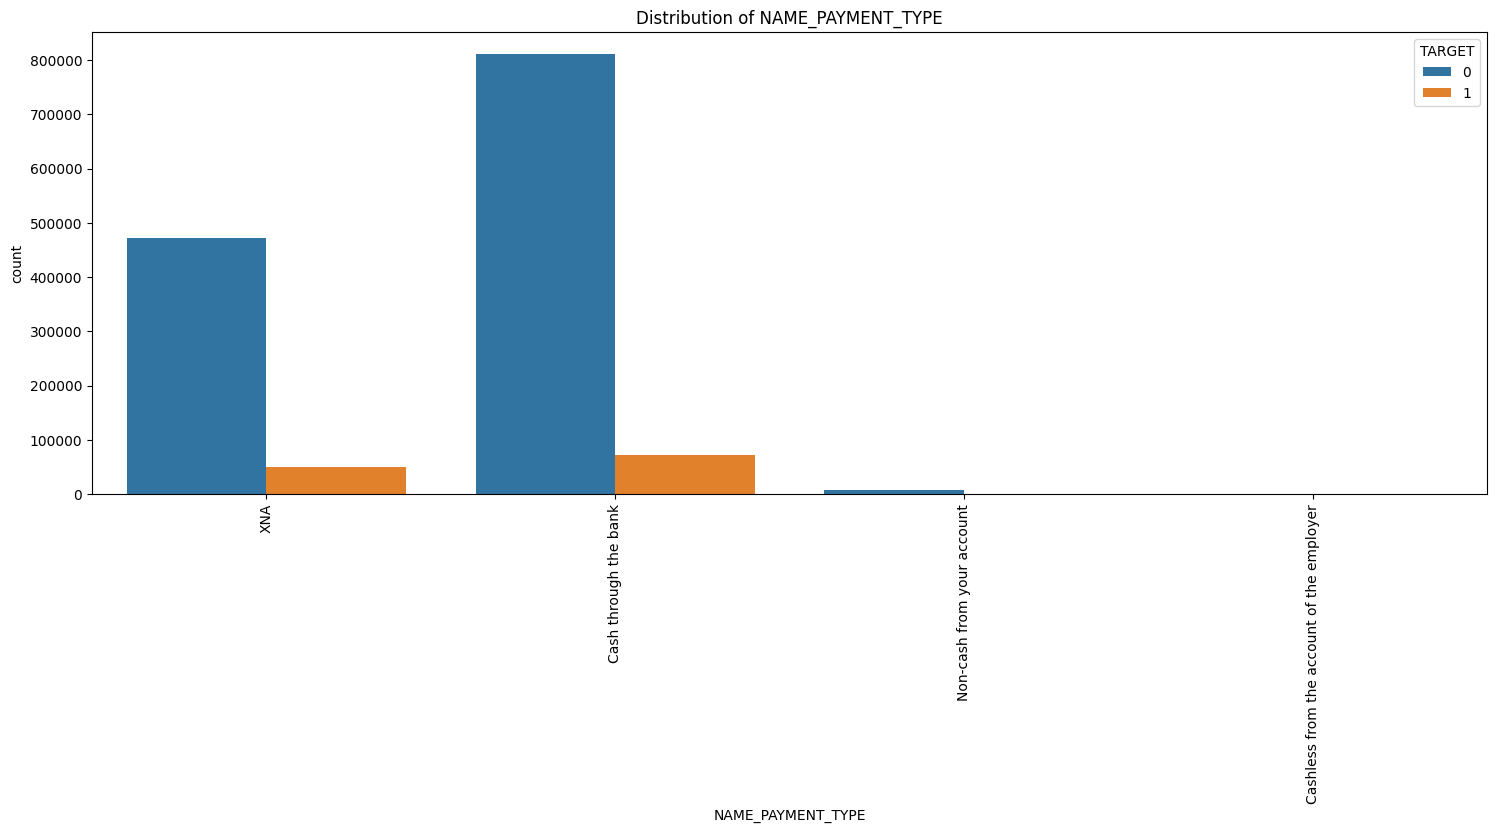

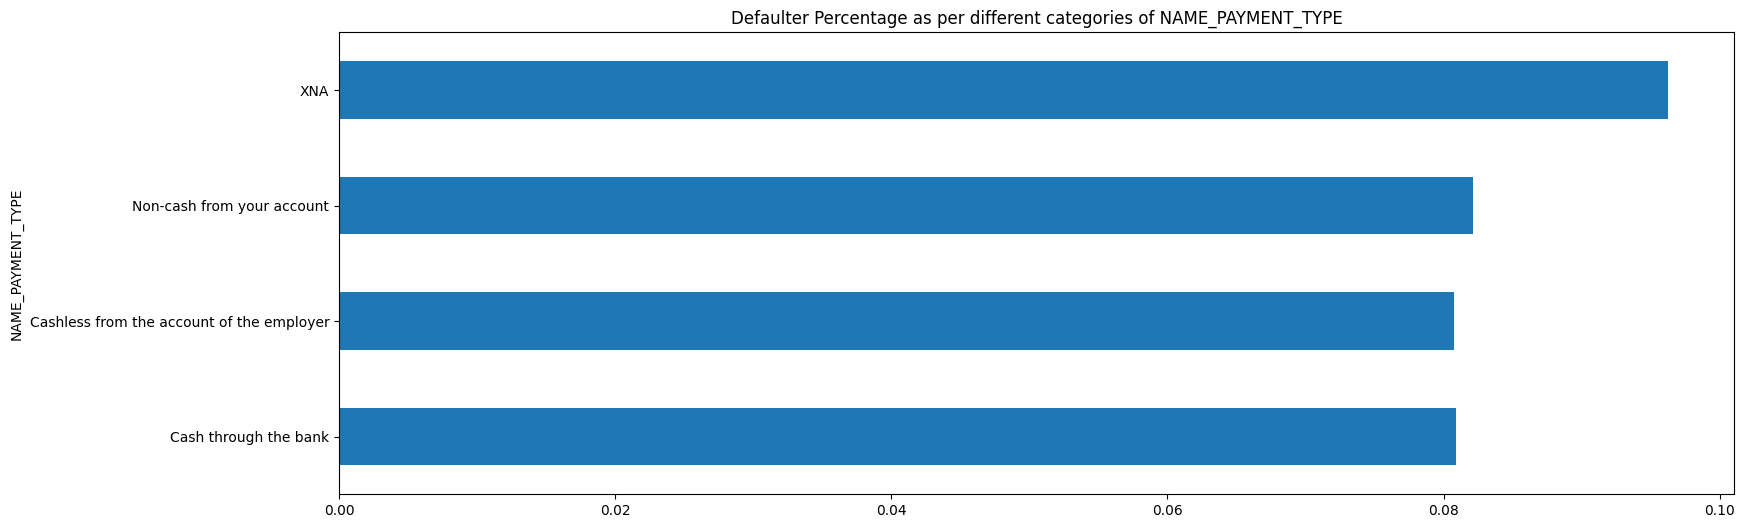


NAME_PAYMENT_TYPE
Cash through the bank                        8.086553
Cashless from the account of the employer    8.076514
Non-cash from your account                   8.211268
XNA                                          9.622342
Name: TARGET, dtype: float64

 Plotting the Distribution for NAME_CLIENT_TYPE
Description -> Was the client old or new client when applying for the previous application



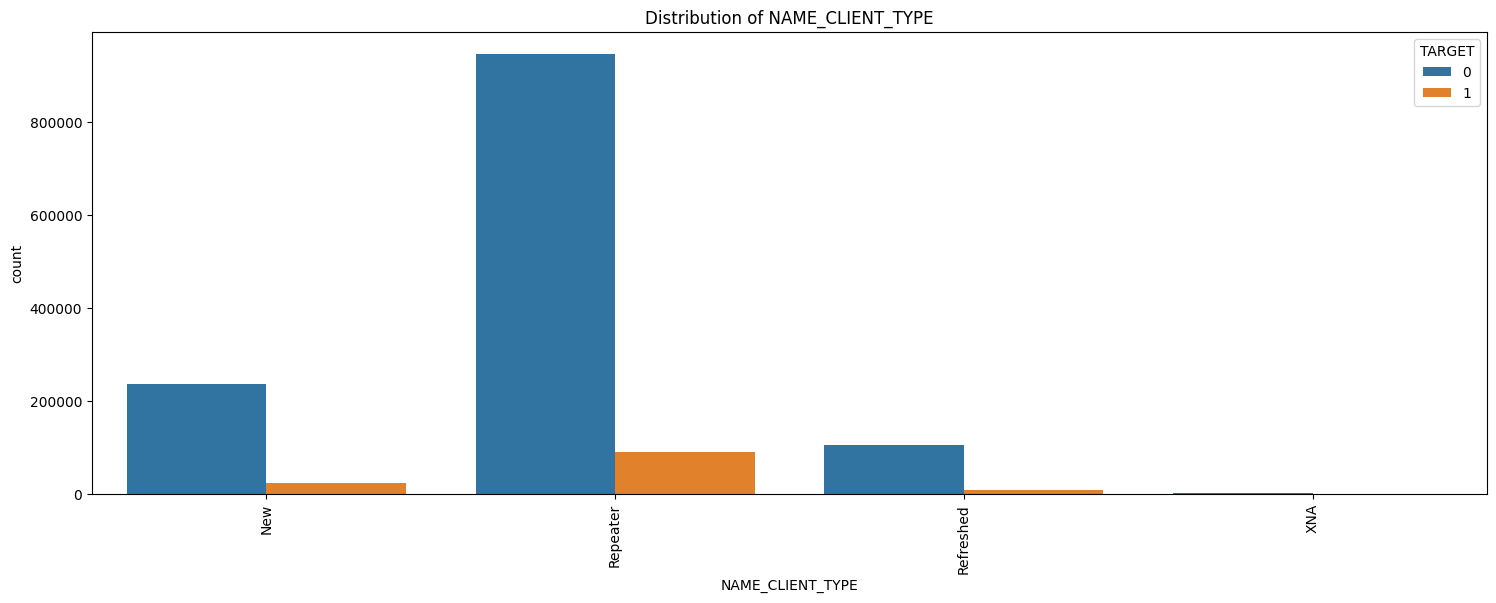

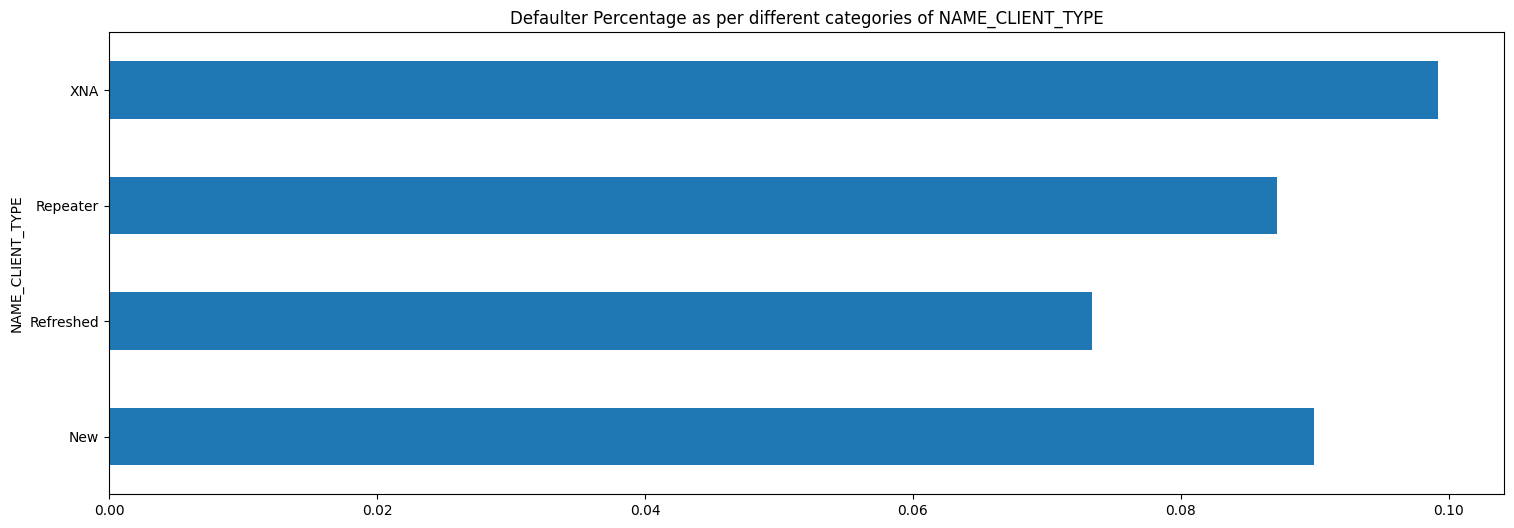


NAME_CLIENT_TYPE
New          8.994760
Refreshed    7.336257
Repeater     8.714616
XNA          9.915749
Name: TARGET, dtype: float64

 Plotting the Distribution for CODE_REJECT_REASON
Description -> Why was the previous application rejected



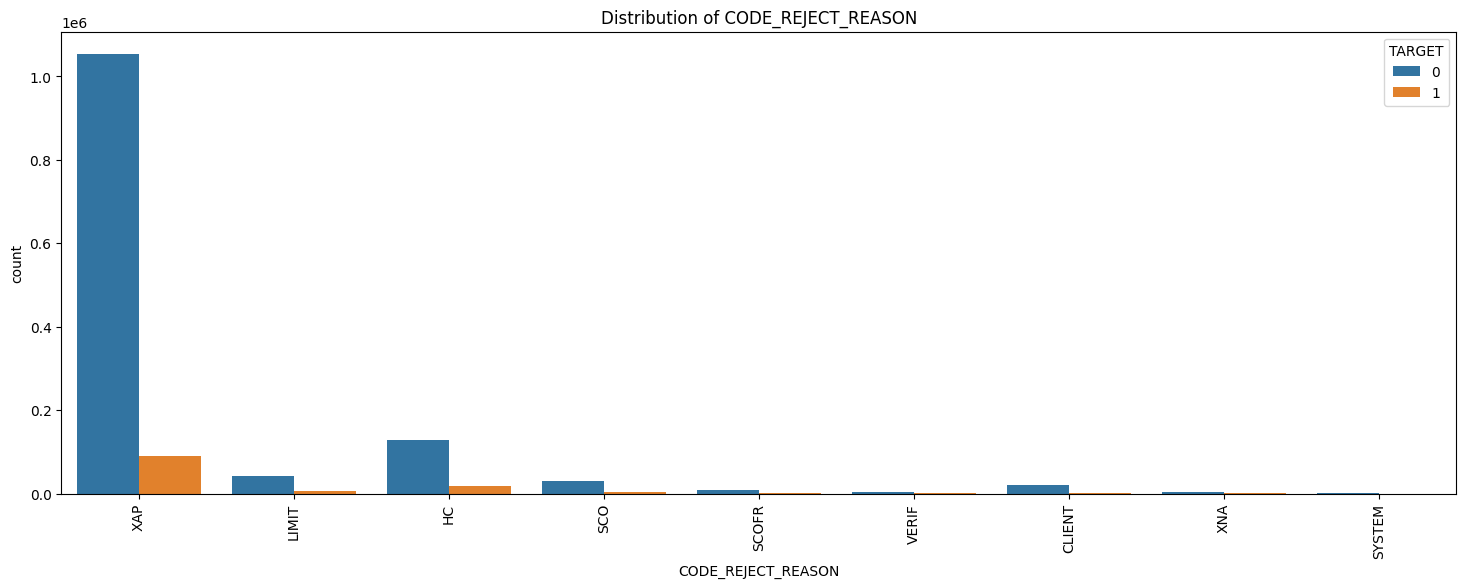

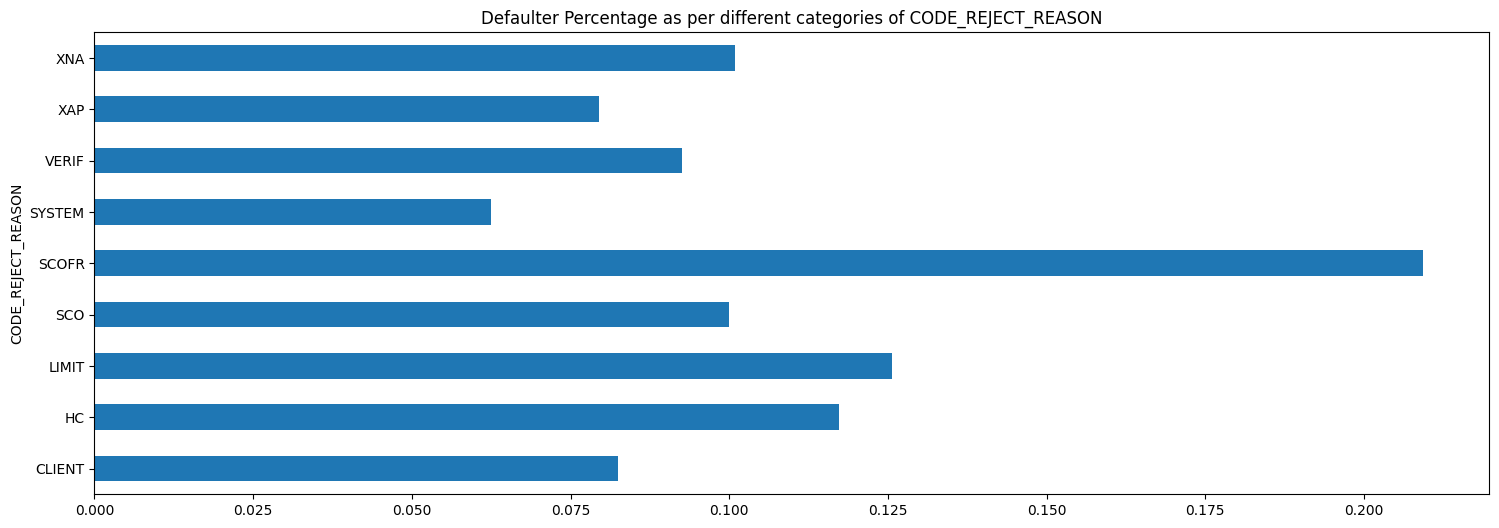


CODE_REJECT_REASON
CLIENT     8.251724
HC        11.734163
LIMIT     12.559395
SCO        9.998162
SCOFR     20.928736
SYSTEM     6.250000
VERIF      9.256252
XAP        7.947654
XNA       10.095934
Name: TARGET, dtype: float64

 Plotting the Distribution for NAME_GOODS_CATEGORY
Description -> What kind of goods did the client apply for in the previous application



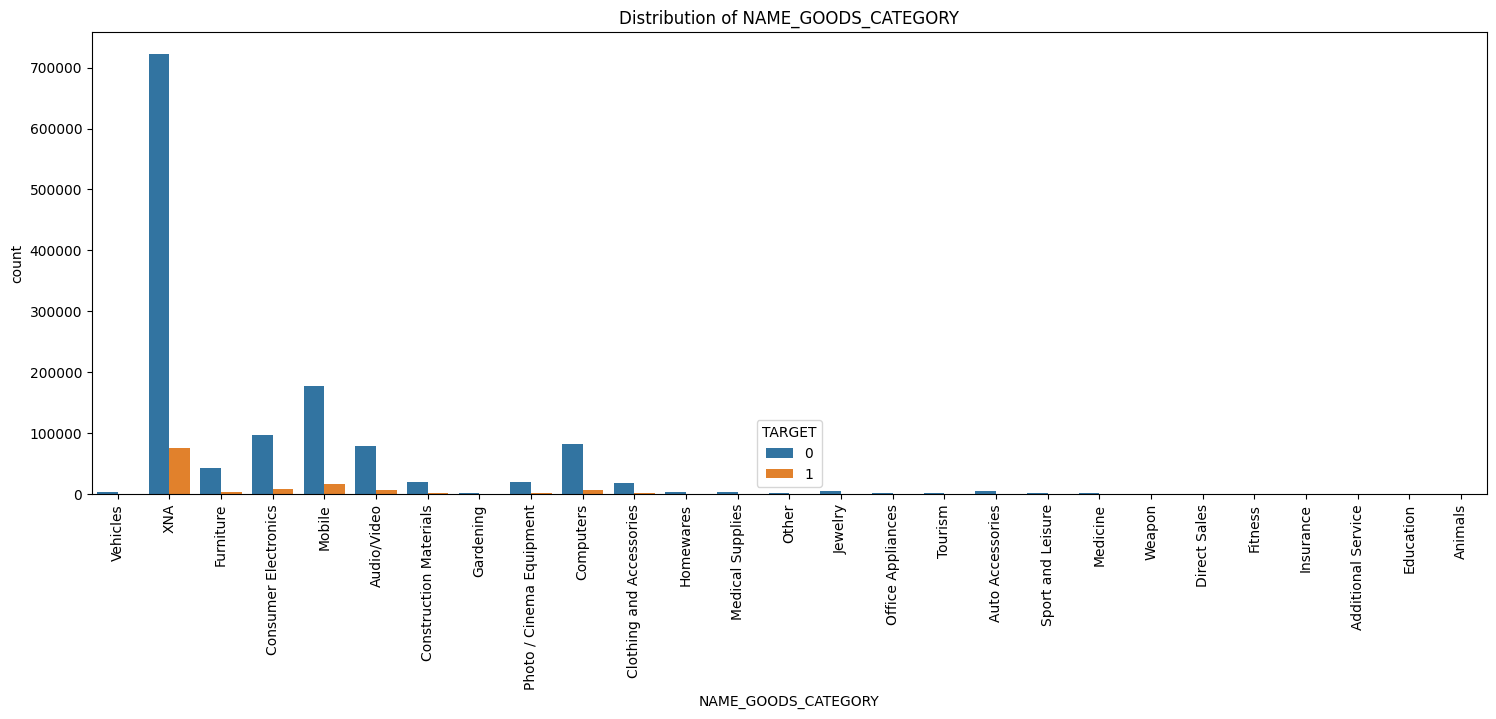

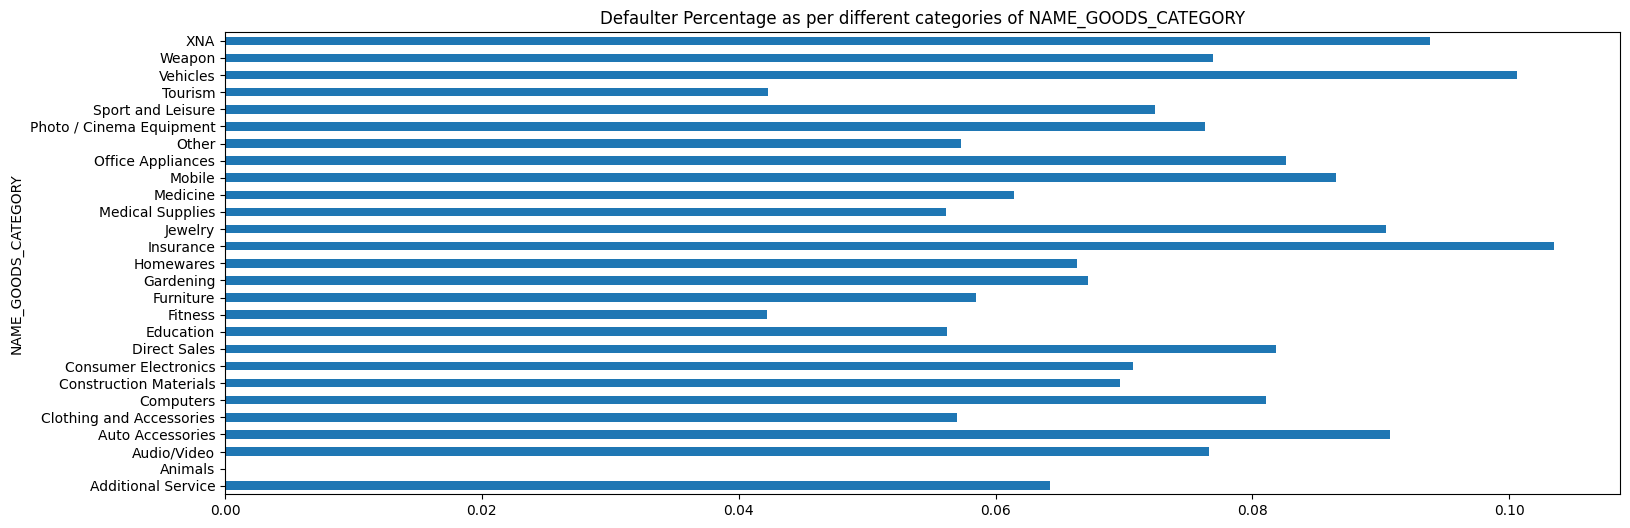


NAME_GOODS_CATEGORY
Additional Service           6.422018
Animals                      0.000000
Audio/Video                  7.661809
Auto Accessories             9.071933
Clothing and Accessories     5.701889
Computers                    8.104712
Construction Materials       6.967597
Consumer Electronics         7.066851
Direct Sales                 8.181818
Education                    5.617978
Fitness                      4.216867
Furniture                    5.849601
Gardening                    6.718346
Homewares                    6.637271
Insurance                   10.344828
Jewelry                      9.040093
Medical Supplies             5.617284
Medicine                     6.144393
Mobile                       8.647022
Office Appliances            8.261965
Other                        5.733847
Photo / Cinema Equipment     7.628875
Sport and Leisure            7.244094
Tourism                      4.229607
Vehicles                    10.056062
Weapon                       

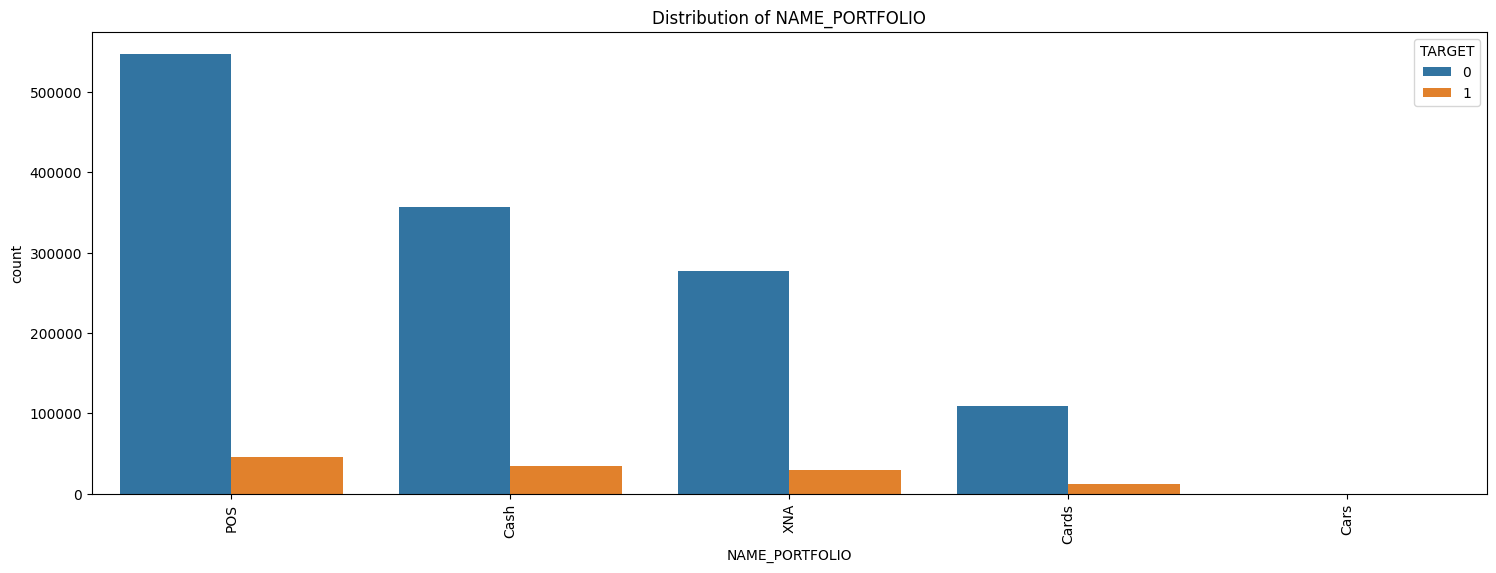

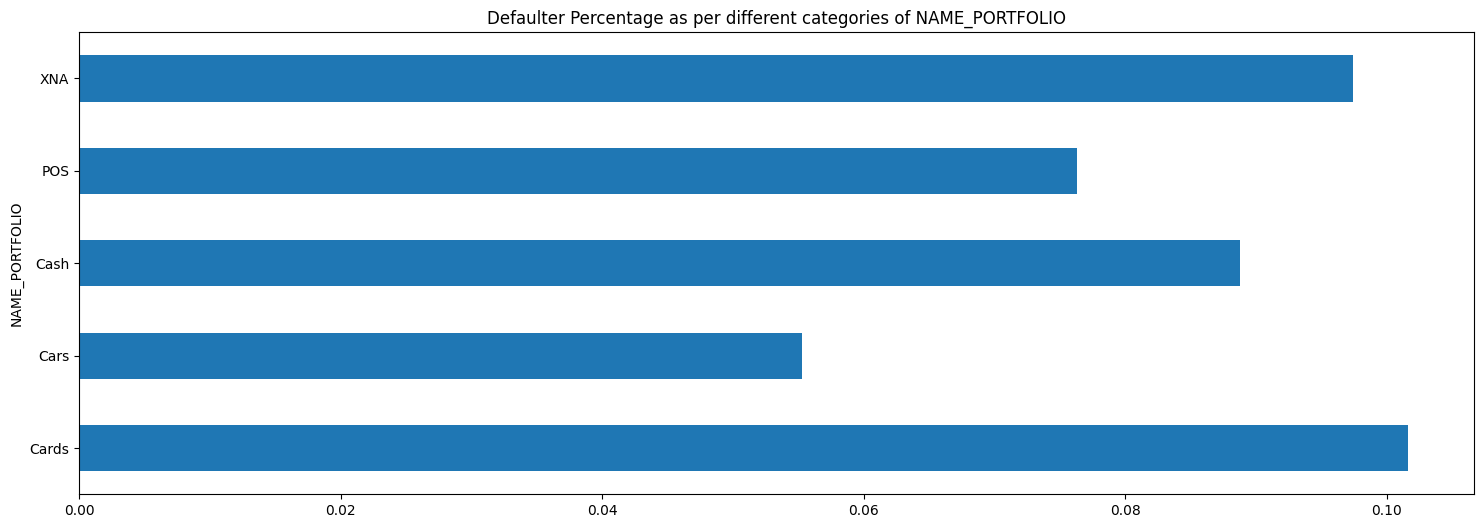


NAME_PORTFOLIO
Cards    10.161905
Cars      5.526316
Cash      8.876509
POS       7.635959
XNA       9.744705
Name: TARGET, dtype: float64

 Plotting the Distribution for NAME_PRODUCT_TYPE
Description -> Was the previous application x-sell o walk-in



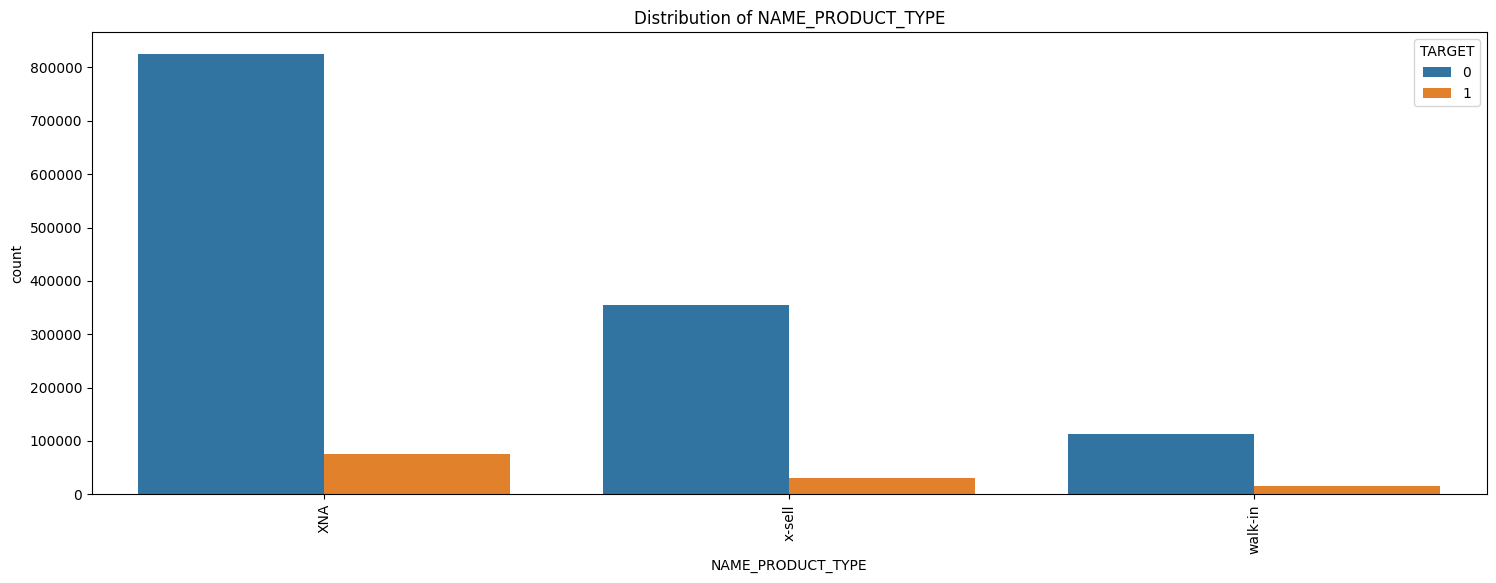

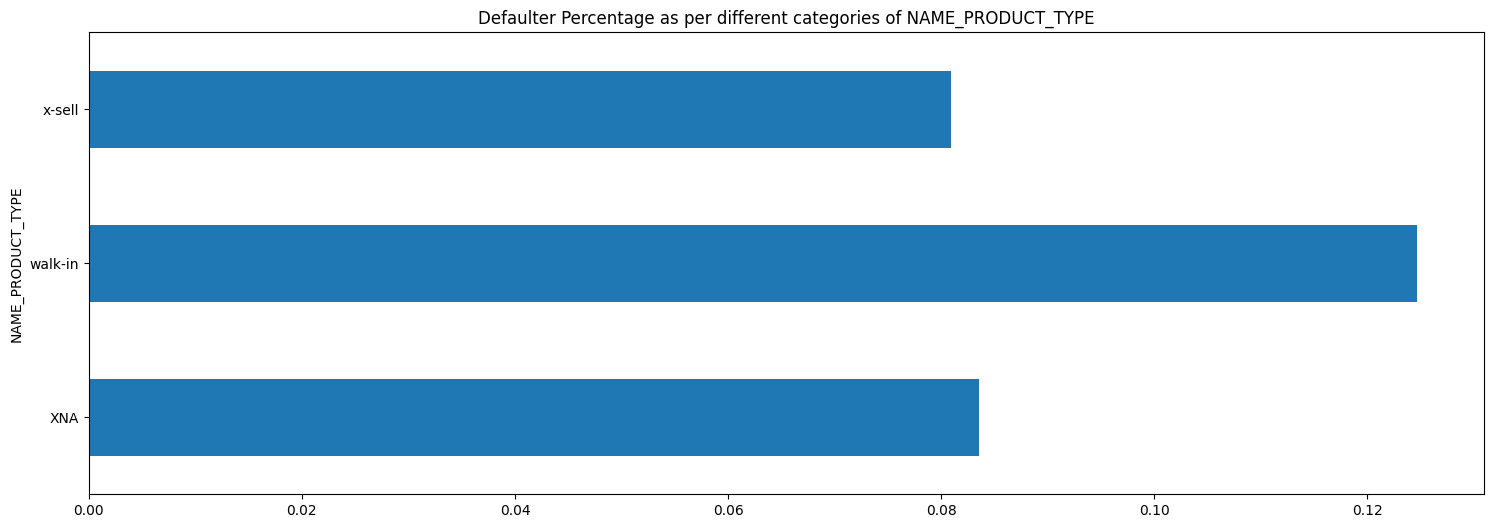


NAME_PRODUCT_TYPE
XNA         8.354841
walk-in    12.469007
x-sell      8.087827
Name: TARGET, dtype: float64

 Plotting the Distribution for CHANNEL_TYPE
Description -> Through which channel we acquired the client on the previous application



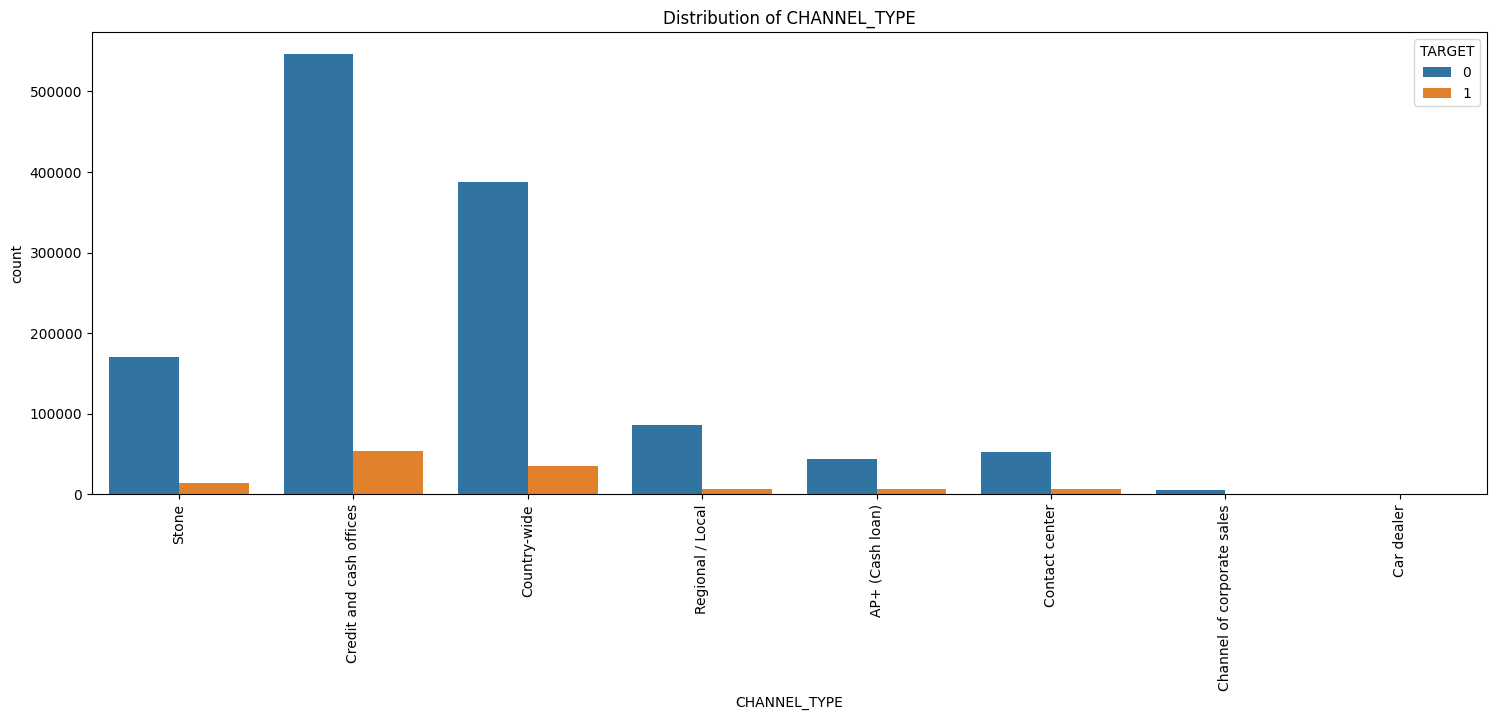

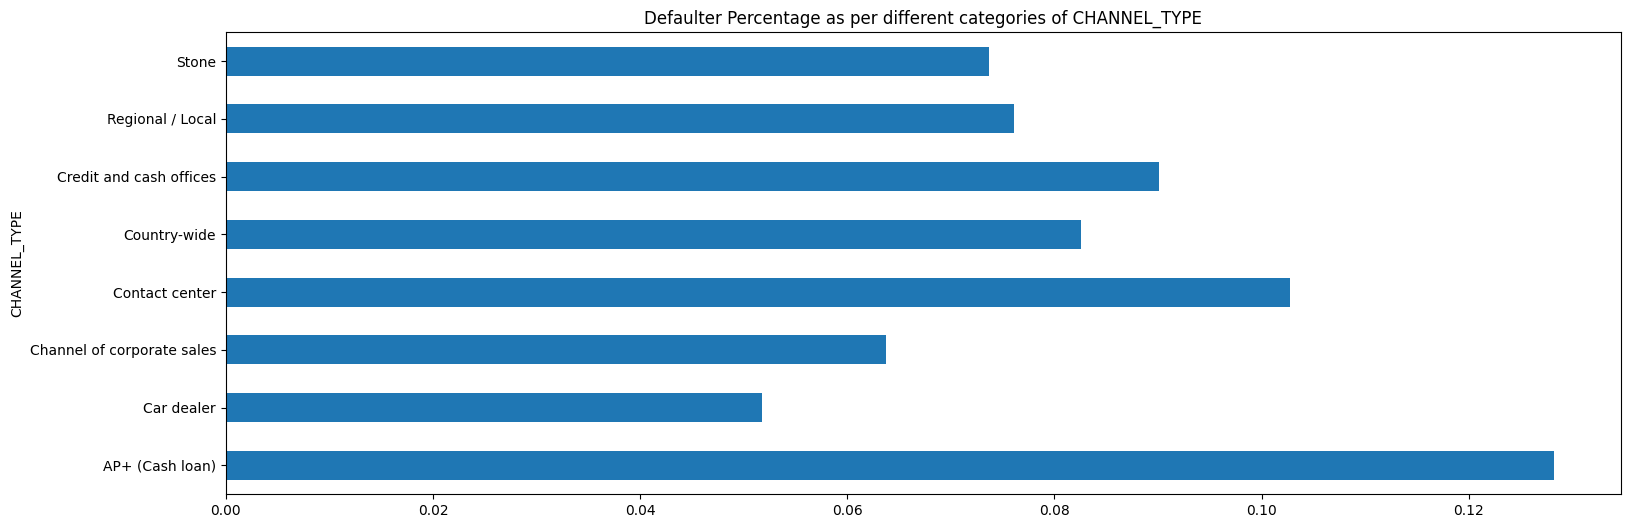


CHANNEL_TYPE
AP+ (Cash loan)               12.826455
Car dealer                     5.172414
Channel of corporate sales     6.375093
Contact center                10.269821
Country-wide                   8.256000
Credit and cash offices        9.011030
Regional / Local               7.605545
Stone                          7.369706
Name: TARGET, dtype: float64

 Plotting the Distribution for NAME_CONTRACT_TYPE
Description -> Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application



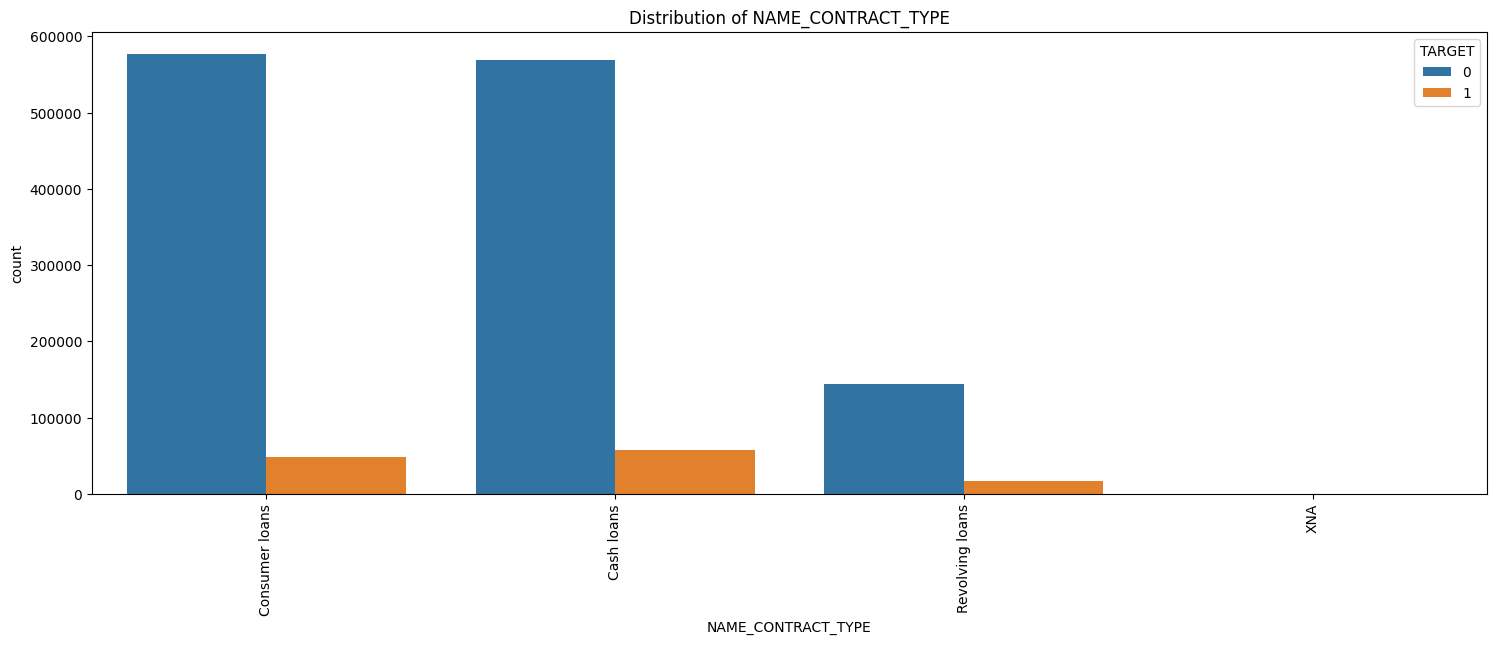

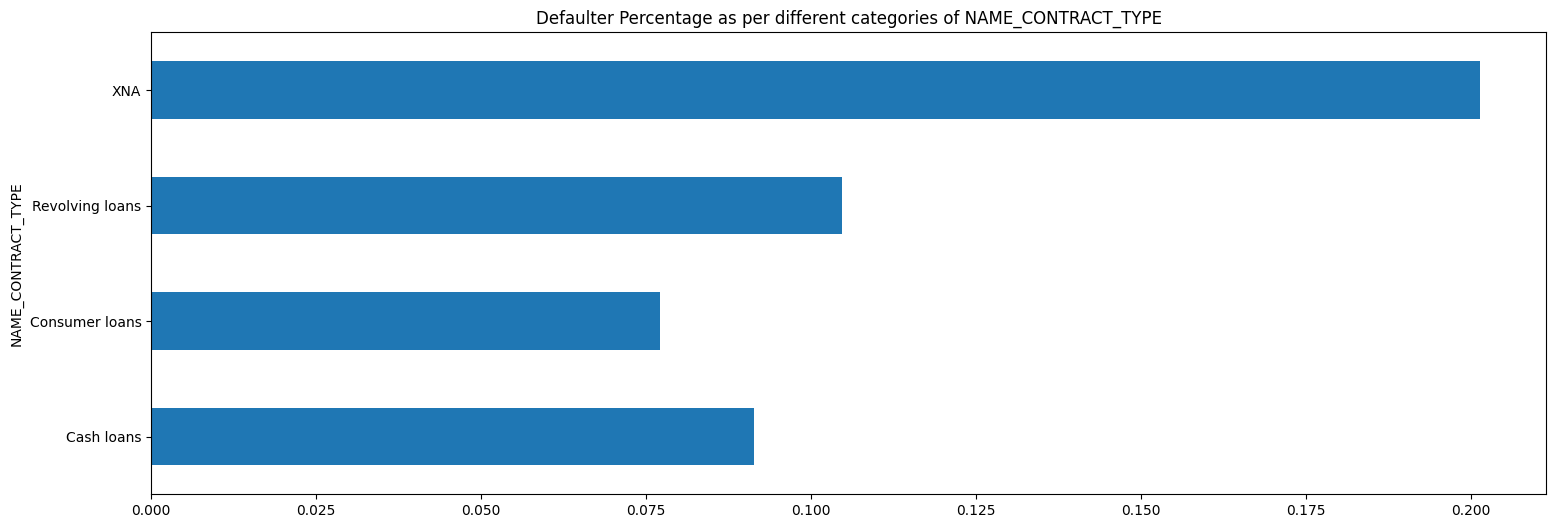


NAME_CONTRACT_TYPE
Cash loans          9.125763
Consumer loans      7.709962
Revolving loans    10.468618
XNA                20.127796
Name: TARGET, dtype: float64

 Plotting the Distribution for NAME_SELLER_INDUSTRY
Description -> The industry of the seller



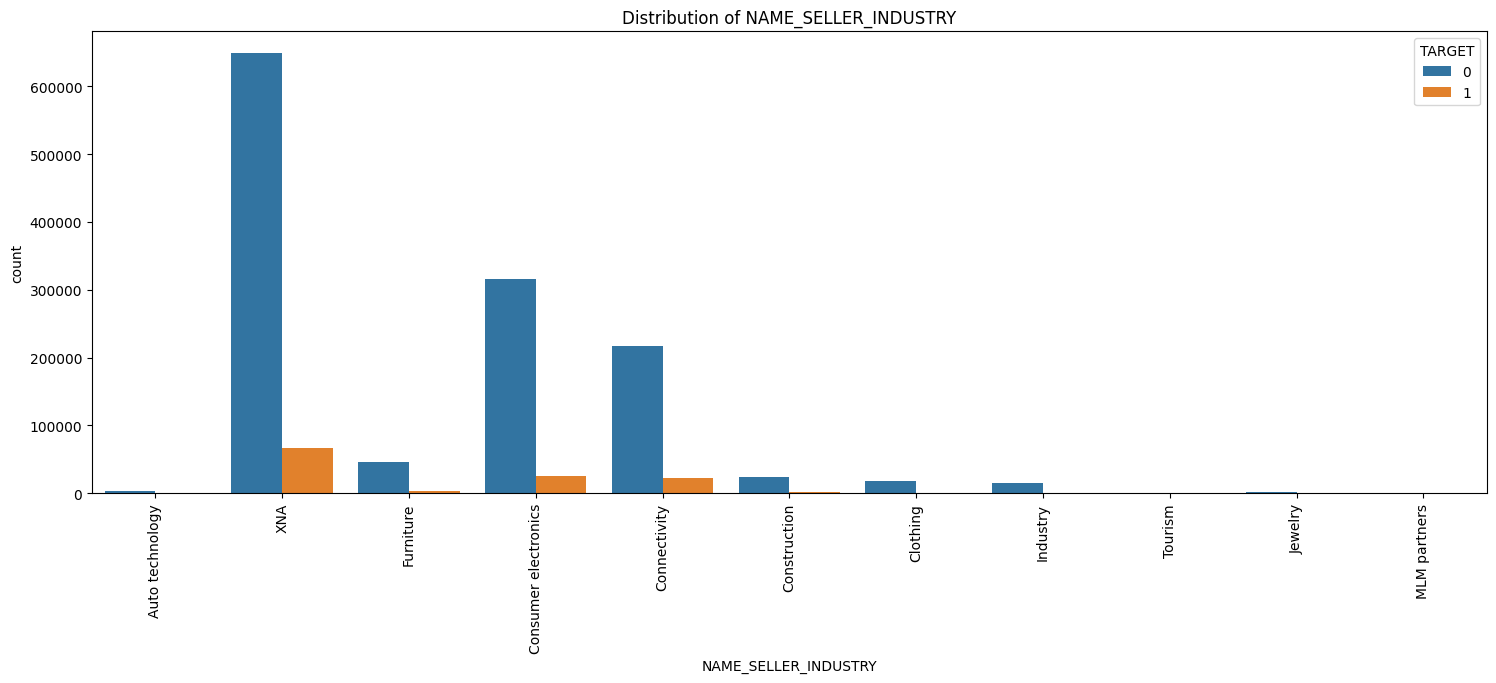

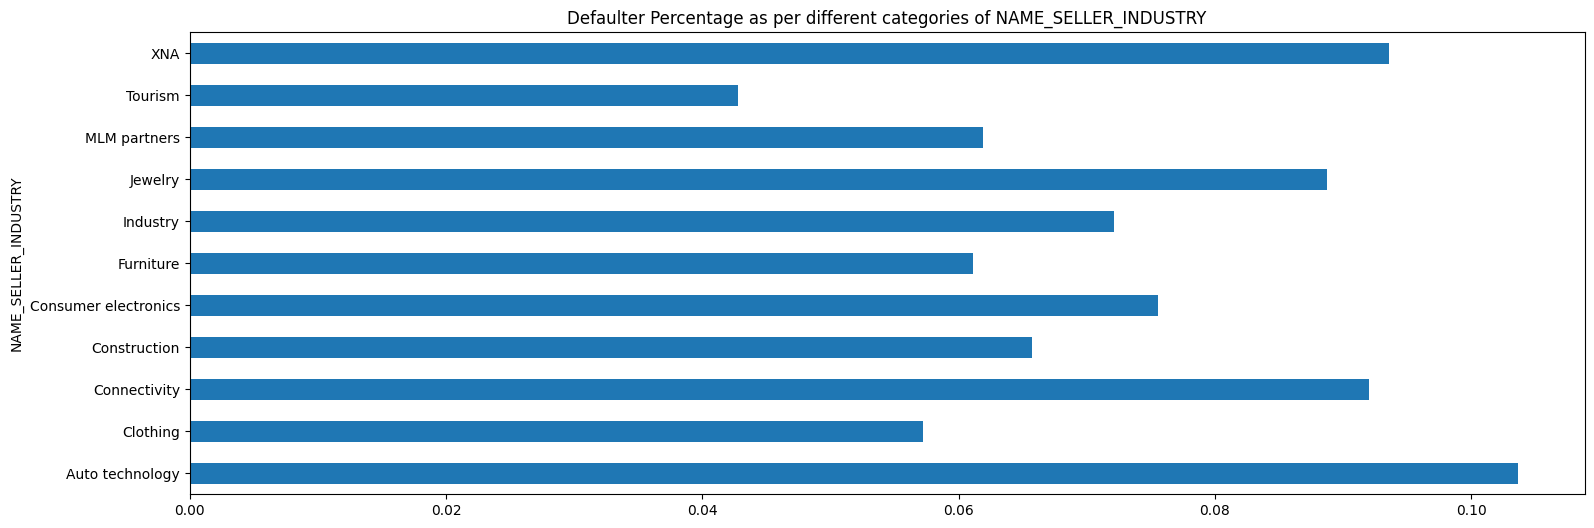


NAME_SELLER_INDUSTRY
Auto technology         10.367647
Clothing                 5.724769
Connectivity             9.207048
Construction             6.574340
Consumer electronics     7.553387
Furniture                6.116489
Industry                 7.213135
Jewelry                  8.875178
MLM partners             6.188925
Tourism                  4.278075
XNA                      9.355507
Name: TARGET, dtype: float64

 Plotting the Distribution for NAME_YIELD_GROUP
Description -> Grouped interest rate into small medium and high of the previous application



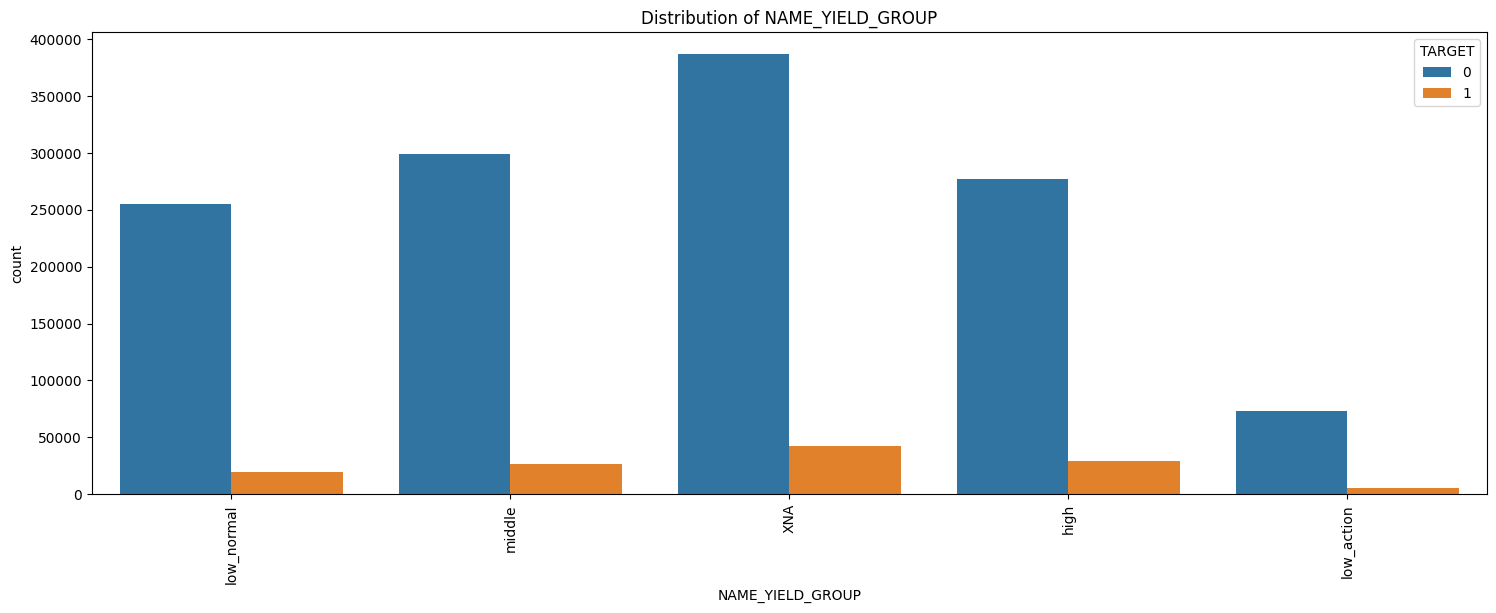

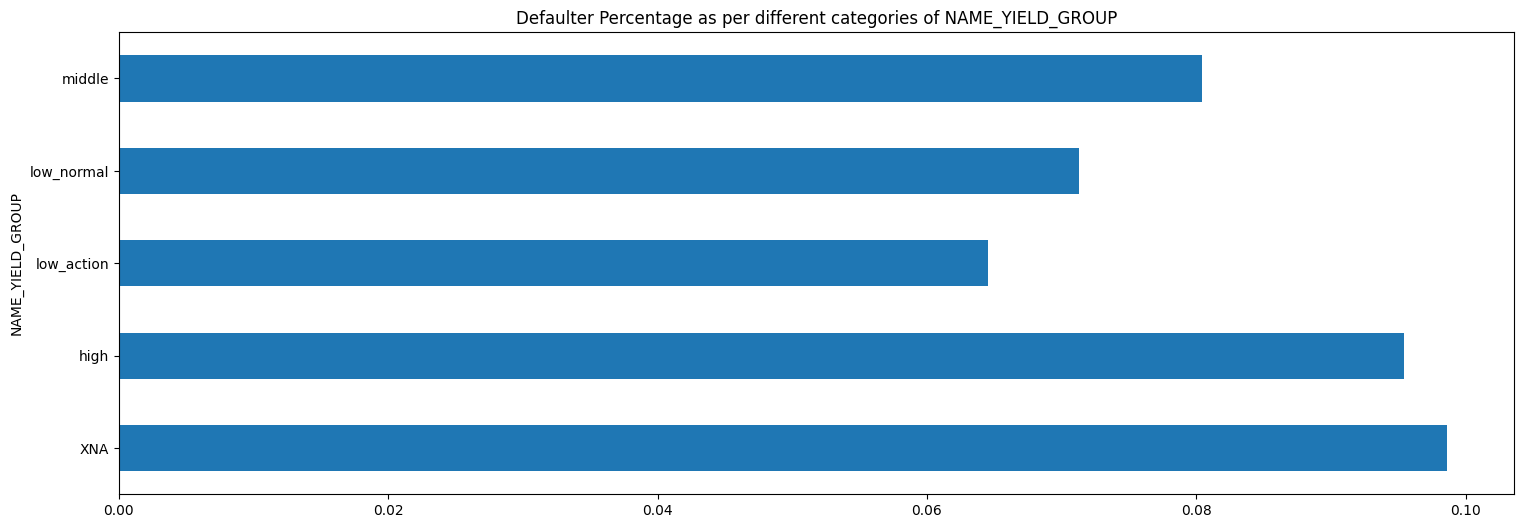


NAME_YIELD_GROUP
XNA           9.863280
high          9.545156
low_action    6.451449
low_normal    7.132099
middle        8.043179
Name: TARGET, dtype: float64

 Plotting the Distribution for PRODUCT_COMBINATION
Description -> Detailed product combination of the previous application



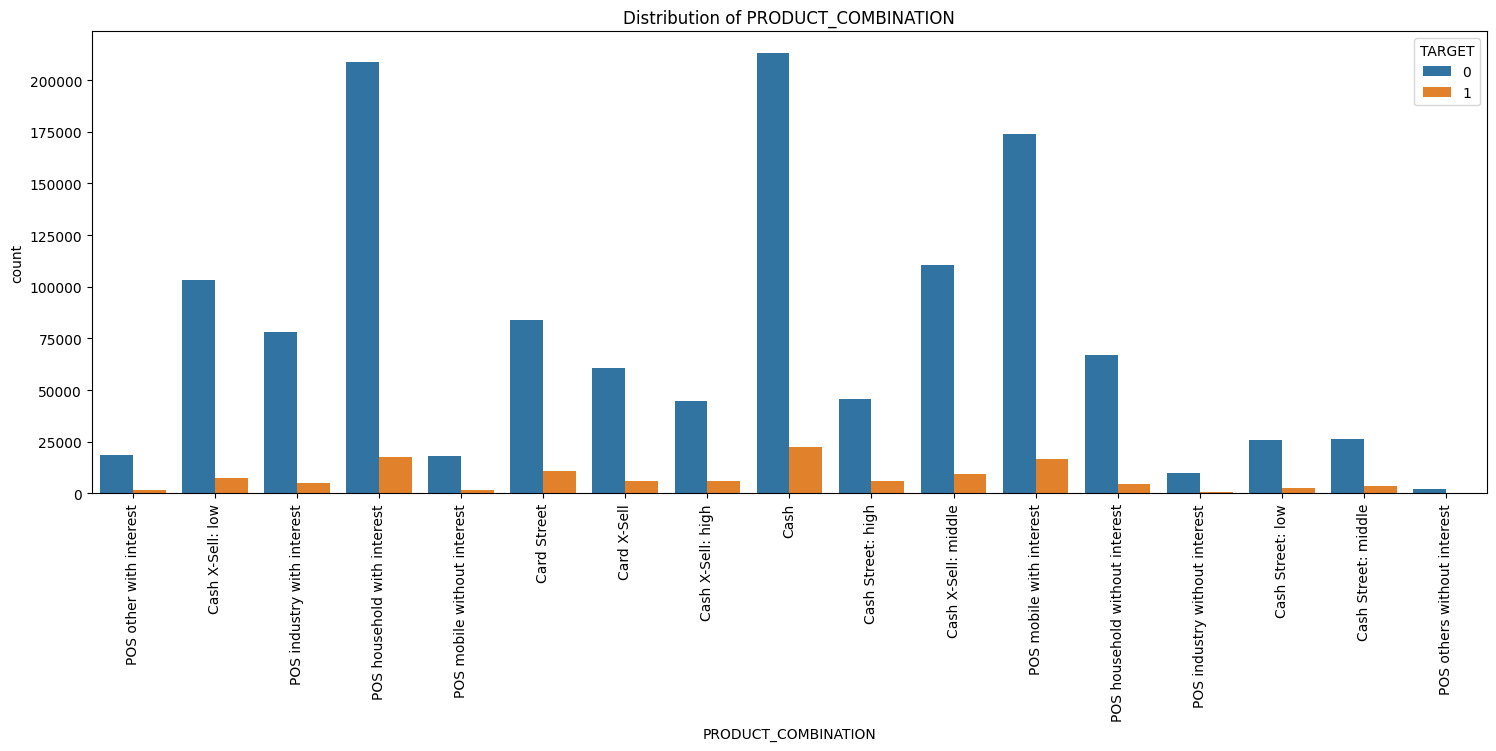

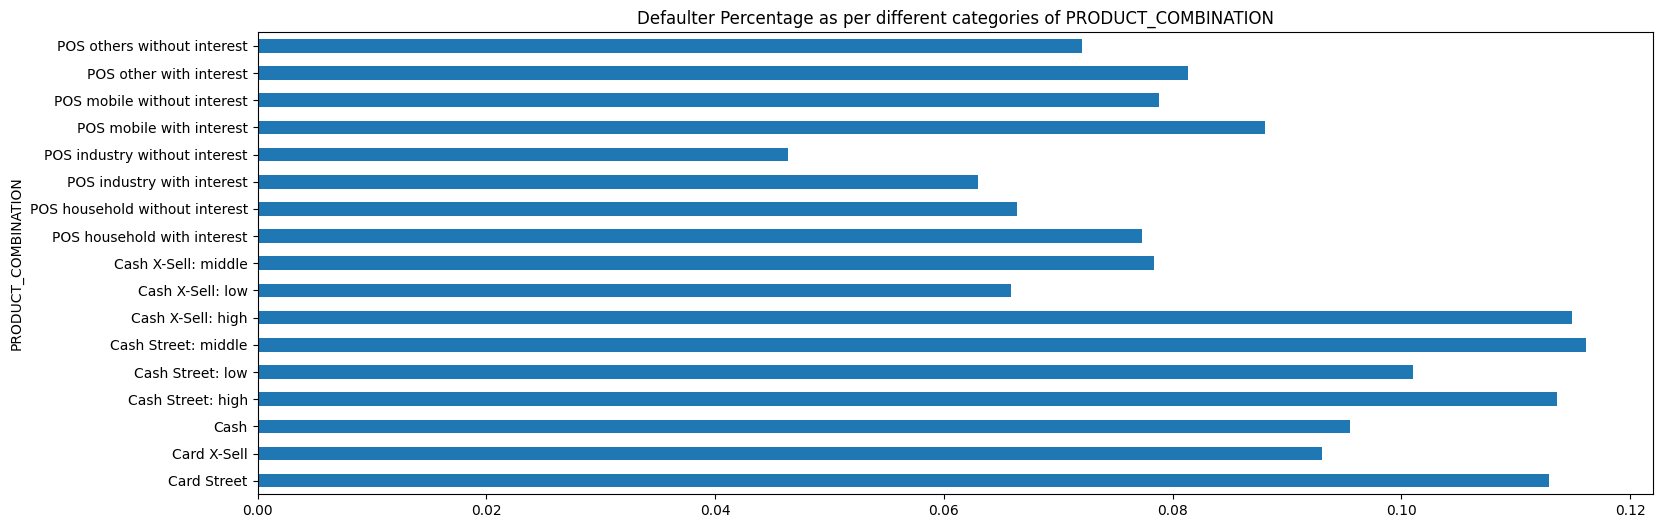


PRODUCT_COMBINATION
Card Street                       11.290357
Card X-Sell                        9.304520
Cash                               9.555082
Cash Street: high                 11.363856
Cash Street: low                  10.100374
Cash Street: middle               11.615554
Cash X-Sell: high                 11.493642
Cash X-Sell: low                   6.583242
Cash X-Sell: middle                7.835983
POS household with interest        7.734563
POS household without interest     6.640194
POS industry with interest         6.302390
POS industry without interest      4.641747
POS mobile with interest           8.810584
POS mobile without interest        7.883358
POS other with interest            8.134325
POS others without interest        7.207637
Name: TARGET, dtype: float64



In [69]:
for i in categorical_variables:
    categorical_analysis(prevdata, i)

### Continuous Analysis

Nothing much can be inferred from these variables as distributions for Target = 0 and Target = 1 are similar.

Description -> Annuity of previous application



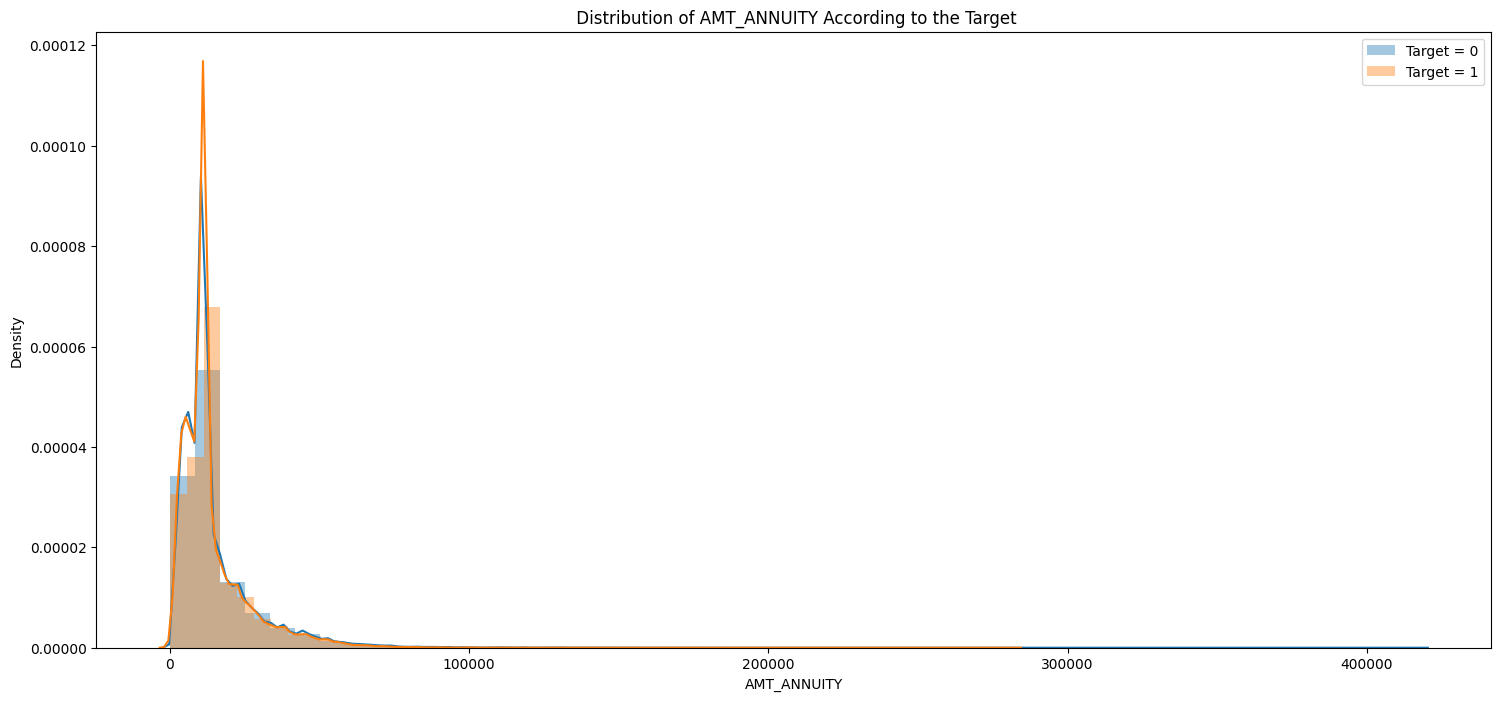

Description -> For how much credit did client ask on the previous application



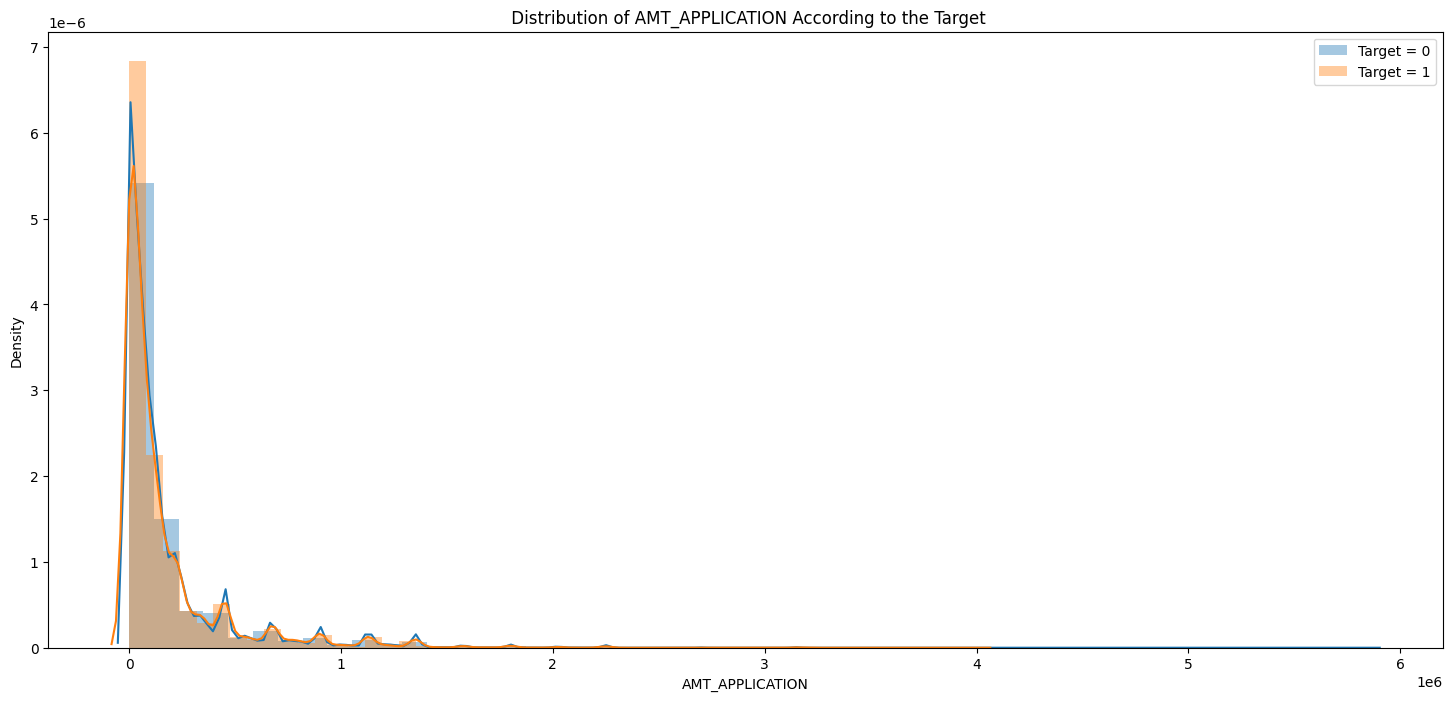

Description -> Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT



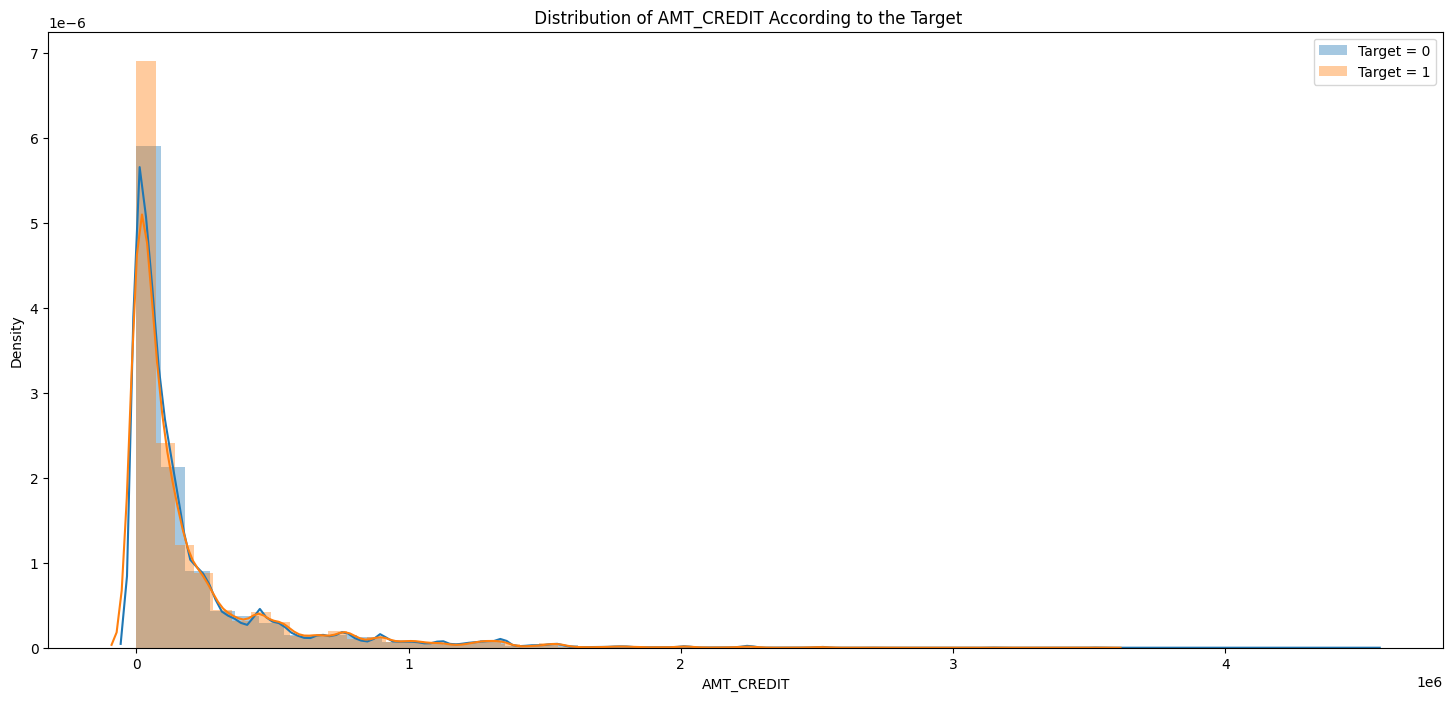

Description -> Goods price of good that client asked for (if applicable) on the previous application



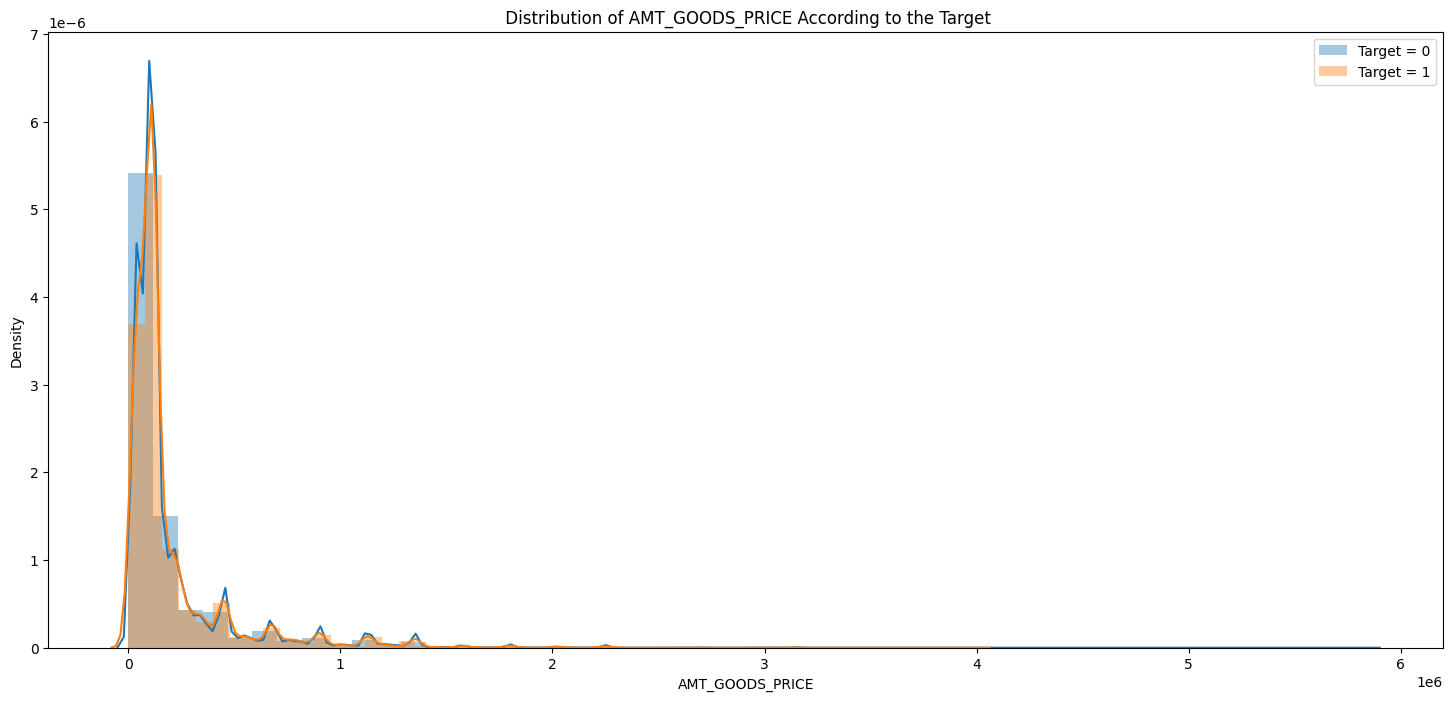

Description -> Selling area of seller place of the previous application



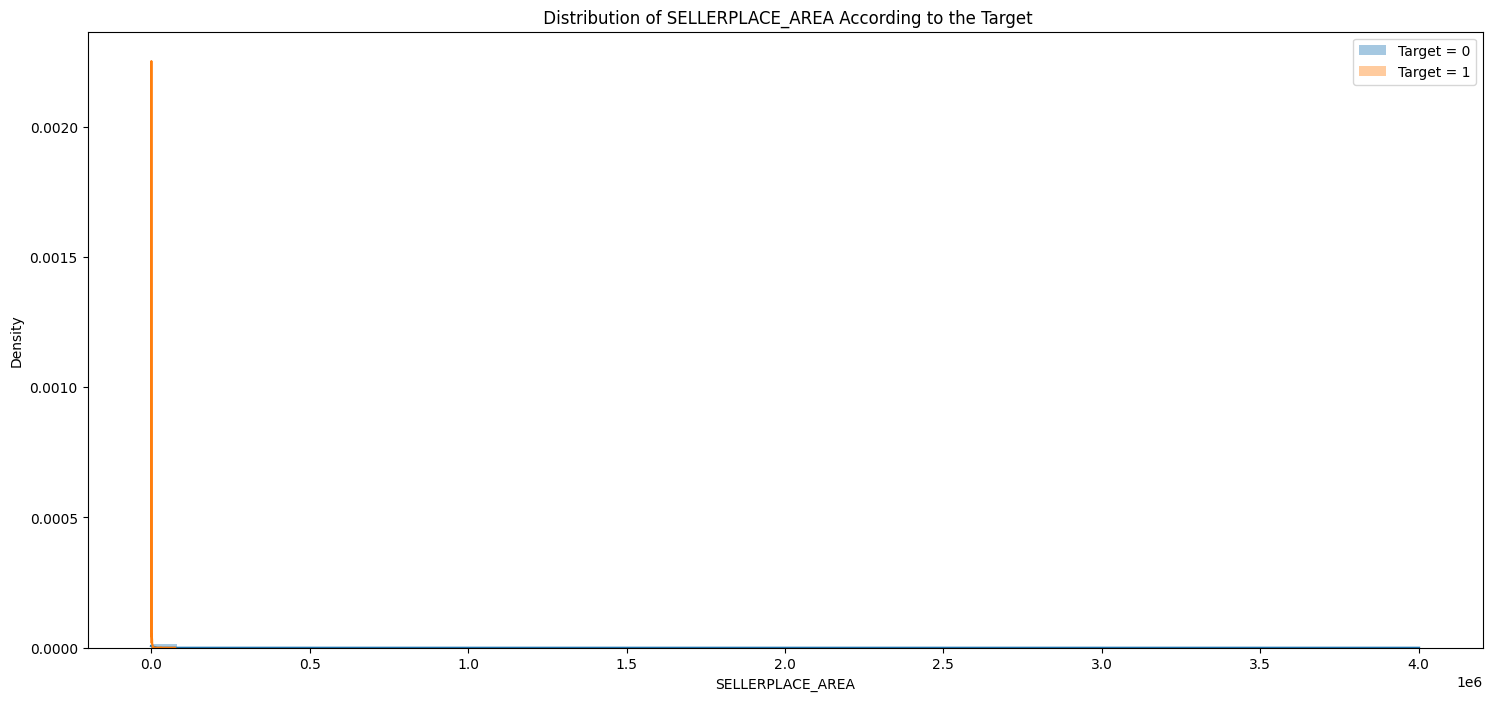

Description -> Term of previous credit at application of the previous application



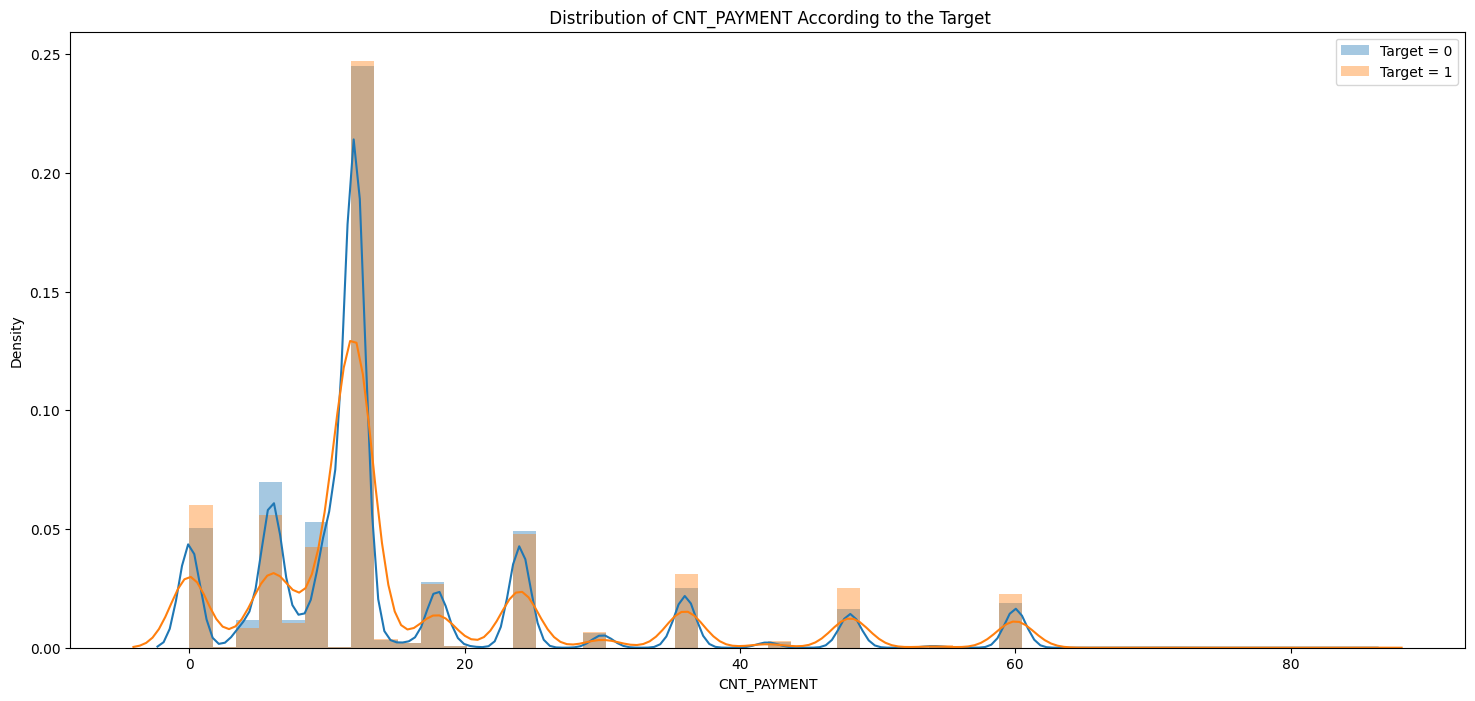

In [70]:
for i in continuous_variables:
    continuous_analysis(prevdata, i)